## Final Project Submission - Phase 4 

* Student Name: **GROUP 7**
* Members : **Joyce Muthike,Bernard Mucui, Aisha Mbarak, Felix Awino, Mariacharlote Mbiyu, Imelda Masika**
* Student pace: Part Time
* Scheduled Project review date/time: **27th August 2023**

# ANALYZING REAL ESTATE INVESTMENTS IN THE UNITED STATES OF AMERICA

![Alt Text](https://www.allbusiness.com/media-library/c-branchecarica-fotolia-com.jpg?id=32092726)


## Project Overview

## 1.0 Business Understanding 

### 1.1 Background

Real estate markets are generally perceived to experience gradual changes over time. However, there are sudden and significant shifts stemming from various factors that may affect the investment markets.

This project, undertakes an examination of the different patterns in housing prices over time to get a better understanding of what may affect investor choices.  
The findings of this project aim at providing a framework to define what is a **best investment**.

The data utilised is from Zillow Research  which is part of this submission.
The folder name is *Timeseries* and the file name is *zillow_data.csv*

### 1.2 Project Question 

The project aims to investigate : 

*What are the top 5 best zip code areas for the American Properties Corportation to invest in?*

### 1.3 Project Objectives 

In order to answer the project question and guide the research activities, we embark on the below business objectives which are specific and measurable.

* To define and identify the criteria that will be used to evaluate the "best" zip codes for investment considering different factors:
    * Return on investment 
    * Size ranking of Regions
    * Risks associated
    * property value volatility
    

* To identify key patterns, trends and relatioships in the data. i.e
  * How real estate prices have changed over time
  * Examine different locations and their ROI's
  * Identify associated risks per state and city
   
* To develop a predictive timeseries model that will forecast return on investment(ROI) of the various Zip codes.
* To evaluate and select the most appropriate model
* To provide recommendations on factors to consider in order invest in property.



### 1.4 Stakeholders

The primary party involved in this project is **American Properties Corporation (APC)**, a real estate company. APC is a newcomer to the industry and is seeking accurate information regarding the performance of the real estate market over the years.  

The subsequent groups within the organization are particularly invested in the results of the project:
 * Top_level Management
 * Real Estate Sales Managers

## 2.0 Data Understanding 

![Alt Text](https://media1.tenor.com/images/b015bd2f365053d068f9ee305b02336f/tenor.gif?itemid=15723881)

In [52]:
#Install this section on your command prompt
#!pip install pyforest
#!pip install lazypredict
# pip install pmdarima
#pip install tensorflow


In [53]:
#Import necessary libraries
from pyforest import *

import warnings
warnings.filterwarnings('ignore')
from IPython.display import display


In [54]:
#load the data and read 1st 5 lines
df= pd.read_csv('zillow_data.csv')
df.head(5)

<IPython.core.display.Javascript object>

RegionID  RegionName      City State              Metro CountyName  \
0     84654       60657   Chicago    IL            Chicago       Cook   
1     90668       75070  McKinney    TX  Dallas-Fort Worth     Collin   
2     91982       77494      Katy    TX            Houston     Harris   
3     84616       60614   Chicago    IL            Chicago       Cook   
4     93144       79936   El Paso    TX            El Paso    El Paso   

   SizeRank   1996-04   1996-05   1996-06  ...  2017-07  2017-08  2017-09  \
0         1  334200.0  335400.0  336500.0  ...  1005500  1007500  1007800   
1         2  235700.0  236900.0  236700.0  ...   308000   310000   312500   
2         3  210400.0  212200.0  212200.0  ...   321000   320600   320200   
3         4  498100.0  500900.0  503100.0  ...  1289800  1287700  1287400   
4         5   77300.0   77300.0   77300.0  ...   119100   119400   120000   

   2017-10  2017-11  2017-12  2018-01  2018-02  2018-03  2018-04  
0  1009600  1013300  1018700  1024400  1030700  1033800  1030600  
1   314100   315000   316600   318100   319600   321100   321800  
2   320400   320800   321200   321200   323000   326900   329900  
3  1291500  1296600  1299000  1302700  1306400  1308500  1307000  
4   120300   120300   120300   120300   120500   121000   121500  

[5 rows x 272 columns]

In [55]:
#read last 5 lines
df.tail()

RegionID  RegionName                 City State            Metro  \
14718     58333        1338             Ashfield    MA  Greenfield Town   
14719     59107        3293            Woodstock    NH        Claremont   
14720     75672       40404                Berea    KY         Richmond   
14721     93733       81225  Mount Crested Butte    CO              NaN   
14722     95851       89155             Mesquite    NV        Las Vegas   

      CountyName  SizeRank   1996-04   1996-05   1996-06  ...  2017-07  \
14718   Franklin     14719   94600.0   94300.0   94000.0  ...   216800   
14719    Grafton     14720   92700.0   92500.0   92400.0  ...   202100   
14720    Madison     14721   57100.0   57300.0   57500.0  ...   121800   
14721   Gunnison     14722  191100.0  192400.0  193700.0  ...   662800   
14722      Clark     14723  176400.0  176300.0  176100.0  ...   333800   

       2017-08  2017-09  2017-10  2017-11  2017-12  2018-01  2018-02  2018-03  \
14718   217700   218600   218500   218100   216400   213100   209800   209200   
14719   208400   212200   215200   214300   213100   213700   218300   222700   
14720   122800   124600   126700   128800   130600   131700   132500   133000   
14721   671200   682400   695600   695500   694700   706400   705300   681500   
14722   336400   339700   343800   346800   348900   350400   353000   356000   

       2018-04  
14718   209300  
14719   225800  
14720   133400  
14721   664400  
14722   357200  

[5 rows x 272 columns]

In [56]:
#Analyse the dataframe
def analyze_dataset(df):
    
    # confirm type of df
    print(type(df))
    print("*"*50)
    
    # Dataset shape 
    print("Shape of the dataset:", df.shape,'\n')
    print("*"*50)
    
    # Missing values
    null_counts = df.isnull().sum()
    print("Null columns only:", null_counts[null_counts > 0])
    print("*"*50)
    
    # Duplicate values
    print("Number of duplicates:", len(df.loc[df.duplicated()]),'\n')
    print("*"*50)
    
    # Number of columns 
    num_columns = len(df.columns)
    print("Number of columns:", num_columns)
    print("*"*50)

    # Unique values
    print("The unique values per column are:")
    print(df.nunique(), '\n')
    print("*"*50)

    # Dataset information
    print("Information about the dataset:")
    print(df.info())
    print("*"*50)
    
    # Distribution
    display(df.describe())
    
analyze_dataset(df)

<class 'pandas.core.frame.DataFrame'>
**************************************************
Shape of the dataset: (14723, 272) 

**************************************************
Null columns only: Metro      1043
1996-04    1039
1996-05    1039
1996-06    1039
1996-07    1039
           ... 
2014-02      56
2014-03      56
2014-04      56
2014-05      56
2014-06      56
Length: 220, dtype: int64
**************************************************
Number of duplicates: 0 

**************************************************
Number of columns: 272
**************************************************
The unique values per column are:
RegionID      14723
RegionName    14723
City           7554
State            51
Metro           701
              ...  
2017-12        5248
2018-01        5276
2018-02        5303
2018-03        5332
2018-04        5310
Length: 272, dtype: int64 

**************************************************
Information about the dataset:
<class 'pandas.core.frame.DataFrame'

RegionID    RegionName      SizeRank       1996-04       1996-05  \
count   14723.000000  14723.000000  14723.000000  1.368400e+04  1.368400e+04   
mean    81075.010052  48222.348706   7362.000000  1.182991e+05  1.184190e+05   
std     31934.118525  29359.325439   4250.308342  8.600251e+04  8.615567e+04   
min     58196.000000   1001.000000      1.000000  1.130000e+04  1.150000e+04   
25%     67174.500000  22101.500000   3681.500000  6.880000e+04  6.890000e+04   
50%     78007.000000  46106.000000   7362.000000  9.950000e+04  9.950000e+04   
75%     90920.500000  75205.500000  11042.500000  1.432000e+05  1.433000e+05   
max    753844.000000  99901.000000  14723.000000  3.676700e+06  3.704200e+06   

            1996-06       1996-07       1996-08       1996-09       1996-10  \
count  1.368400e+04  1.368400e+04  1.368400e+04  1.368400e+04  1.368400e+04   
mean   1.185374e+05  1.186531e+05  1.187803e+05  1.189275e+05  1.191205e+05   
std    8.630923e+04  8.646795e+04  8.665094e+04  8.687208e+04  8.715185e+04   
min    1.160000e+04  1.180000e+04  1.180000e+04  1.200000e+04  1.210000e+04   
25%    6.910000e+04  6.920000e+04  6.937500e+04  6.950000e+04  6.960000e+04   
50%    9.970000e+04  9.970000e+04  9.980000e+04  9.990000e+04  9.995000e+04   
75%    1.432250e+05  1.432250e+05  1.435000e+05  1.437000e+05  1.439000e+05   
max    3.729600e+06  3.754600e+06  3.781800e+06  3.813500e+06  3.849600e+06   

       ...       2017-07       2017-08       2017-09       2017-10  \
count  ...  1.472300e+04  1.472300e+04  1.472300e+04  1.472300e+04   
mean   ...  2.733354e+05  2.748658e+05  2.764646e+05  2.780332e+05   
std    ...  3.603984e+05  3.614678e+05  3.627563e+05  3.644610e+05   
min    ...  1.440000e+04  1.450000e+04  1.470000e+04  1.480000e+04   
25%    ...  1.269000e+05  1.275000e+05  1.282000e+05  1.287000e+05   
50%    ...  1.884000e+05  1.896000e+05  1.905000e+05  1.914000e+05   
75%    ...  3.050000e+05  3.066500e+05  3.085000e+05  3.098000e+05   
max    ...  1.888990e+07  1.870350e+07  1.860530e+07  1.856940e+07   

            2017-11       2017-12       2018-01       2018-02       2018-03  \
count  1.472300e+04  1.472300e+04  1.472300e+04  1.472300e+04  1.472300e+04   
mean   2.795209e+05  2.810953e+05  2.826571e+05  2.843687e+05  2.865114e+05   
std    3.656003e+05  3.670454e+05  3.695727e+05  3.717739e+05  3.724612e+05   
min    1.450000e+04  1.430000e+04  1.410000e+04  1.390000e+04  1.380000e+04   
25%    1.292500e+05  1.299000e+05  1.306000e+05  1.310500e+05  1.319500e+05   
50%    1.925000e+05  1.934000e+05  1.941000e+05  1.950000e+05  1.967000e+05   
75%    3.117000e+05  3.134000e+05  3.151000e+05  3.168500e+05  3.188500e+05   
max    1.842880e+07  1.830710e+07  1.836590e+07  1.853040e+07  1.833770e+07   

            2018-04  
count  1.472300e+04  
mean   2.880399e+05  
std    3.720544e+05  
min    1.380000e+04  
25%    1.324000e+05  
50%    1.981000e+05  
75%    3.211000e+05  
max    1.789490e+07  

[8 rows x 268 columns]

### Summary of Dataframe: df

- This dataset contains information about median housing sales values for various zip codes over a span of 22 years, from April 1996 to April 2018.


- There are 272 columns and 14723 rows indexed from 0 to 14722. This means there are 272 different variables each with 14723 records.


- The first 7 columns are named , **RegionID, RegionName, City, State, Metro, CountyName, SizeRank** while the other 265 columns are dates from **April 1996 to April 2018.**


- This dataset further provides information about different geographical locations (zip codes) and their hierarchical relationships based on size:
    - The **State** column represents the largest political and administrative divisions within the country. **There are 51 states in our dataset.**
    - The **Metro** column indicates the metropolitan area to which each zip code belongs. Metropolitan areas encompass cities and their surrounding suburbs. **There are 701 metropolitan area**
    - The **City** column specifies the city in which each zip code is located. Cities are urban areas with distinct economic and social activities. **We have 7554 cities in our data.**
    - The **RegionName** column provides the **specific ZipCodes** for each region. ZipCodes are the smallest geographical divisions used primarily to identify specific areas for mail delivery but in this case will be used for our narrowed down data analysis. **There are a total of 14723 ZipCodes in the dataset.**
    
    
- Data attributes:
    -  RegionID: A unique index for each region (zip code) ranging from 58196 to 753844.
    -  RegionName: A unique zip code for each region, ranging from 1001 to 99901.
    -  SizeRank: A numerical rank representing the size of each zip code, ranked from 1 to 14723.
    -  1996-04 to 2018-04: Median housing sales values for each month, covering a total of 265 data points for each zip code. 
   
   
- Summary Statistics:
    - The median (50th percentile) size rank is approximately 46106, indicating the middle-sized zip code in the dataset.
    - The median housing sales value across all zip codes ranges from around USD11,300 to USD 3,849,600.
    - The mean (average) housing sales value across all zip codes ranges from approximately USD 118,299 to USD 288,039.
    - The standard deviation indicates the variability in housing sales values, with values ranging from around USD 42,500
      to USD 372,054.
      
      
 - There are three main data types in our dataset:
    - 219 columns with the floating numbers data type
    - 49 columns with the integer data type.
    - 4 columns with the object data type.
    
    
- There are 220 columns with missing values. One being Metro, which is a categorical column and the numerical columns which are represented by dates.

No duplicates were identified in any of the columns.

The dataset consumes approximately 30.6 megabytes of memory.


## 3.0 Data Preparation

### 3.1 Data Cleaning 
![Alt Text](https://media1.tenor.com/images/85ba7afe92f9d4a17f1dfdc01f2ed45e/tenor.gif?itemid=4552991)

During this stage, the data undergoes cleaning and preparation to ensure its quality and reliability for subsequent analysis. The process begins by:

1. Extracting the datetimes in the columns  i.e from column 7 onwards. 
2. Removing redundant columns which are irrelevant to the analysis and modeling phases. i.e "RegionID"
3. Detecting and addressing any missing values present. i.e Metro column
4. Scrutinizing the unique identifier column for any duplicate entries and dropping it.
5. Renaming "RegionName" to "Zipcode" to make it easier to refer to. 
6. Change categorical column datatypes to string

In [57]:
#Create a copy of the dataframe
df2 = df.copy()

In [58]:
df2.head()

RegionID  RegionName      City State              Metro CountyName  \
0     84654       60657   Chicago    IL            Chicago       Cook   
1     90668       75070  McKinney    TX  Dallas-Fort Worth     Collin   
2     91982       77494      Katy    TX            Houston     Harris   
3     84616       60614   Chicago    IL            Chicago       Cook   
4     93144       79936   El Paso    TX            El Paso    El Paso   

   SizeRank   1996-04   1996-05   1996-06  ...  2017-07  2017-08  2017-09  \
0         1  334200.0  335400.0  336500.0  ...  1005500  1007500  1007800   
1         2  235700.0  236900.0  236700.0  ...   308000   310000   312500   
2         3  210400.0  212200.0  212200.0  ...   321000   320600   320200   
3         4  498100.0  500900.0  503100.0  ...  1289800  1287700  1287400   
4         5   77300.0   77300.0   77300.0  ...   119100   119400   120000   

   2017-10  2017-11  2017-12  2018-01  2018-02  2018-03  2018-04  
0  1009600  1013300  1018700  1024400  1030700  1033800  1030600  
1   314100   315000   316600   318100   319600   321100   321800  
2   320400   320800   321200   321200   323000   326900   329900  
3  1291500  1296600  1299000  1302700  1306400  1308500  1307000  
4   120300   120300   120300   120300   120500   121000   121500  

[5 rows x 272 columns]

#### 3.1.1 Converting column names to datetime

In [59]:
#Converting column names to datetime
def get_datetimes(df2):
    """
    Takes a dataframe:
    returns only those column names that can be converted into datetime objects 
    as datetime objects.
    NOTE number of returned columns may not match total number of columns in passed dataframe
    """
    
    return pd.to_datetime(df2.columns.values[7:], format='%Y-%m')

#### 3.1.2 Dealing with Null values in Metro column

After a thorough examination of the dataset, we observed that there are 220 columns containing missing values. Our primary focus is on addressing the 'Metro' column, which falls under categorical data. Out of the entire dataset comprising 14,723 rows, we found a total of 1043 missing values in the 'Metro' column.

To provide context, these missing values account for 7% of the overall dataset. Consequently, we have made the decision to remove these rows, resulting in a reduction of the total number of rows to 13,680.

Regarding the remaining 219 columns, all of which are date-related columns, we have chosen not to utilize forward or backward filling techniques in order to prevent any unintended data propagation. We might revisit this decision at a later point if there is a renewed need for such actions.

In [60]:
#confirm % of missing values 
df2['Metro'].isna().sum()/len(df2)*100

7.084154044691979

In [61]:
#Drop the missing values in Metro columns
df2.dropna(subset=['Metro'], inplace=True)

#### 3.1.3 Renaming Column 'RegionName'  & Dropping 'RegionID' 

In [62]:
#Renaming regionname to zipcode
df2= df2.rename(columns={"RegionName": "ZipCode"})

In [63]:
#RegionName
df2['ZipCode'] = df2['ZipCode'].astype('category')

In [64]:
#Drop irrelevant columns
df2.drop(['RegionID'], inplace=True,axis=1)

In [65]:
#confirm dataframe
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13680 entries, 0 to 14722
Columns: 271 entries, ZipCode to 2018-04
dtypes: category(1), float64(219), int64(47), object(4)
memory usage: 28.9+ MB


In [66]:
#recheck values of missing values 
missing_counts = df2.isnull().sum()
columns_with_missing = missing_counts[missing_counts > 0]
columns_with_missing

1996-04    785
1996-05    785
1996-06    785
1996-07    785
1996-08    785
          ... 
2014-02     50
2014-03     50
2014-04     50
2014-05     50
2014-06     50
Length: 219, dtype: int64

The resultant dataframe comprises 271 columns, with absent values present only in the columns labeled with dates. The missing data columns have decreased from 220 to 219.

The data categories have expanded from 3 to 4, with the new inclusion being the "category" type. The memory usage amounts to 28.9 megabytes.

### 3.2 Zipcode Selection 

In order to determine the best States to focus on for the real estate investment, we consider the below:

1. **Ranking of the Zipcodes using the 25% quantile using column SizeRank.**

Size Rank refers to a numerical value assigned to each state based on a specific criterion, such as population, area size, GDP, urbanisation or any other relevant measure.

As an illustration, if population is the size rank criterion, a state with a higher population would receive a lower numeric size rank. ie nearer to 1 which signifies a larger population.

2. **Calculating the Return on Investment in percentage.**
        
        ROI = (Final Value/Intial Value) - 1
        
3. **Reviewing the Risk Assessment/ Volatility.**

This helps us understand the volatility in housing prices by utilising standard deviation and mean to calculate the coefficient of variance 


#### 3.2.1 Ranking of the Zipcodes 

We identify a subset of zip codes that fall within the top 25% based on the 'SizeRank' criterion. It can be noted that the cutt off point is 3429.75 and we end up with a total of 3420 zipcodes to work with.

The lowest zipcode is 1 , while the maximum is 3429.

Keep in mind: A zipcode with a lower value closer to 1 is regarded as a superior metric, where 1 represents the topmost ranking position.

In [67]:
# Calculate the 25% cutoff value (1st quartile)
sr_25 = df2['SizeRank'].quantile(0.25)

# Filter the dataframe for top 25% zip codes and maintain all columns
zc_top25 = df2[df2['SizeRank'] < sr_25]

print(f'Size Rank 25% (1st quartile) cutoff value: {sr_25}')
print(f'Amount of zipcodes: {len(zc_top25)}')

Size Rank 25% (1st quartile) cutoff value: 3429.75
Amount of zipcodes: 3420


In [68]:
zc_top25.describe()

SizeRank       1996-04       1996-05       1996-06       1996-07  \
count  3420.000000  3.352000e+03  3.352000e+03  3.352000e+03  3.352000e+03   
mean   1716.035965  1.341766e+05  1.342876e+05  1.344017e+05  1.345176e+05   
std     989.505229  9.659336e+04  9.697595e+04  9.733910e+04  9.770240e+04   
min       1.000000  2.710000e+04  2.710000e+04  2.710000e+04  2.710000e+04   
25%     860.750000  8.550000e+04  8.567500e+04  8.587500e+04  8.600000e+04   
50%    1716.500000  1.185000e+05  1.185000e+05  1.183000e+05  1.183000e+05   
75%    2572.250000  1.593000e+05  1.593000e+05  1.590250e+05  1.587250e+05   
max    3429.000000  3.676700e+06  3.704200e+06  3.729600e+06  3.754600e+06   

            1996-08       1996-09       1996-10       1996-11       1996-12  \
count  3.352000e+03  3.352000e+03  3.352000e+03  3.352000e+03  3.352000e+03   
mean   1.346547e+05  1.348197e+05  1.350409e+05  1.353047e+05  1.356968e+05   
std    9.810229e+04  9.857567e+04  9.913697e+04  9.977054e+04  1.005014e+05   
min    2.710000e+04  2.720000e+04  2.710000e+04  2.710000e+04  2.710000e+04   
25%    8.610000e+04  8.630000e+04  8.650000e+04  8.657500e+04  8.680000e+04   
50%    1.183500e+05  1.183500e+05  1.185500e+05  1.187000e+05  1.189000e+05   
75%    1.588250e+05  1.588250e+05  1.589000e+05  1.589000e+05  1.592250e+05   
max    3.781800e+06  3.813500e+06  3.849600e+06  3.888900e+06  3.928800e+06   

       ...       2017-07       2017-08       2017-09       2017-10  \
count  ...  3.420000e+03  3.420000e+03  3.420000e+03  3.420000e+03   
mean   ...  3.577537e+05  3.599042e+05  3.622573e+05  3.646369e+05   
std    ...  5.542335e+05  5.539177e+05  5.539229e+05  5.549442e+05   
min    ...  3.270000e+04  3.350000e+04  3.440000e+04  3.520000e+04   
25%    ...  1.624000e+05  1.634500e+05  1.646750e+05  1.655500e+05   
50%    ...  2.401500e+05  2.413000e+05  2.425500e+05  2.439000e+05   
75%    ...  3.892250e+05  3.903000e+05  3.929750e+05  3.953750e+05   
max    ...  1.888990e+07  1.870350e+07  1.860530e+07  1.856940e+07   

            2017-11       2017-12       2018-01       2018-02       2018-03  \
count  3.420000e+03  3.420000e+03  3.420000e+03  3.420000e+03  3.420000e+03   
mean   3.667987e+05  3.690918e+05  3.715144e+05  3.739508e+05  3.766412e+05   
std    5.543869e+05  5.542422e+05  5.570150e+05  5.590417e+05  5.567036e+05   
min    3.600000e+04  3.730000e+04  3.880000e+04  4.000000e+04  4.090000e+04   
25%    1.668750e+05  1.678750e+05  1.691500e+05  1.699750e+05  1.709000e+05   
50%    2.452000e+05  2.467000e+05  2.479000e+05  2.495000e+05  2.515500e+05   
75%    3.971500e+05  3.978750e+05  3.993500e+05  4.022500e+05  4.070500e+05   
max    1.842880e+07  1.830710e+07  1.836590e+07  1.853040e+07  1.833770e+07   

            2018-04  
count  3.420000e+03  
mean   3.784216e+05  
std    5.529246e+05  
min    4.090000e+04  
25%    1.715000e+05  
50%    2.530500e+05  
75%    4.104750e+05  
max    1.789490e+07  

[8 rows x 266 columns]

#### 3.2.2 Calculating the Return on Investment, Standard deviation & CV

In this step, we calculate the respective ROI, std , mean and CV for our df2 and also add additional columns to the dataframe.
Each calculation analyzes real estate investment data for the different zip codes from 1996-04 to 2018-04.

* df2['ROI'] indicates the percentage increase or decrease in value of a property per each zipcode over the duration.
* df2['std'] represents the volatility or variability in property values for each zip code.
* df2 ['mean'] calculates the historical average property value for each zip code over the duration.
* df2['CV'] It assesses the risk and volatility of the investment.

In [69]:
# Assuming istorical return on investment for 'zc_top25'
zc_top25['ROI'] = (zc_top25['2018-04'] / zc_top25['1996-04']) - 1

# Calculate standard deviation of monthly values for 'zc_top25'
zc_top25['std'] = zc_top25.loc[:, '1996-04':'2018-04'].std(skipna=True, axis=1)

# Calculate historical mean value for 'zc_top25'
zc_top25['mean'] = zc_top25.loc[:, '1996-04':'2018-04'].mean(skipna=True, axis=1)

# Calculate coefficient of variance for 'zc_top25'
zc_top25['CV'] = zc_top25['std'] / zc_top25['mean']

# Show calculated values
zc_top25[['ZipCode', 'std', 'mean', 'ROI', 'CV']].head()

ZipCode            std           mean       ROI        CV
0   60657  190821.103965  743978.867925  2.083782  0.256487
1   75070   33537.101427  219655.849057  0.365295  0.152680
2   77494   37730.794353  262110.566038  0.567966  0.143950
3   60614  231225.944628  974139.245283  1.623971  0.237364
4   79936   18167.079218  101875.471698  0.571798  0.178326

In [70]:
# Descriptive statistics of coefficients of variance for 'zc_top25'.
print(zc_top25.CV.describe())

# Define upper limit of CV according to risk profile for 'zc_top25'.
upper_cv = zc_top25.CV.quantile(.4)
print(f'\nCV upper limit: {upper_cv}')

# Get the 5 zipcodes with highest ROIs within the firm's risk profile for 'zc_top25'.
zc_best5 = zc_top25[zc_top25['CV'] < upper_cv].sort_values('ROI', axis=0, ascending=False).head(5)

print('\nBest 5 Zipcodes:')
zc_best5[['ZipCode', 'ROI', 'CV']]

count    3420.000000
mean        0.245763
std         0.093069
min         0.020461
25%         0.170113
50%         0.240001
75%         0.315854
max         0.697541
Name: CV, dtype: float64

CV upper limit: 0.20997290565687943

Best 5 Zipcodes:


ZipCode       ROI        CV
3311   29611  1.753894  0.188013
1713   43065  1.736802  0.204892
2224   30033  1.699458  0.204701
1512   78414  1.666264  0.208588
779    29501  1.650823  0.193300

In [71]:
# Feature engineer a location column in the format "City, State"
zc_best5['location'] = zc_best5['City'] + ", " + zc_best5['State']

In [72]:
# Extracting the best 5 zip codes and their corresponding location names
best_5_zipcodes_with_location = zc_best5[['ZipCode','location']]
print(best_5_zipcodes_with_location)

     ZipCode            location
3311   29611      Greenville, SC
1713   43065          Powell, OH
2224   30033   North Decatur, GA
1512   78414  Corpus Christi, TX
779    29501        Florence, SC


- The "Best 5 Zipcodes" section presents the top 5 zip codes namely: **Greenville SC: 29611, Powell OH: 43065, North Decatur, GA: 30033, Corpus Christi, TX: 78414 and Florence SC: 29501.** They have been identified as the prime investment locations offering highest Return on Investment (ROI) while adhering to the risk profile's CV upper limit.


- The descriptive statistics of CV values indicate that the variability in median housing sales values across the selected zip codes is quite significant. The **average** CV is approximately **0.2458**, which suggests a moderate level of variability relative to the mean.


- The CV **upper limit** based on the risk profile is approximately **0.21**. This limit helps define a threshold for selecting zip codes with acceptable levels of risk.


- For these **top 5** zip codes, the ROIs **range from 165.08% to 175.39%**, indicating substantial growth in median housing sales values over the specified time period.


- The corresponding CV values for these zip codes are below the predefined upper limit, which suggests that the level of variability in these zip codes is within an acceptable risk range.

### 3.2.3 Assessing best_5_zipcodes' ROI over various time periods

- The goal is to assess how the investment has performed over different investment horizons for the best 5 zipcodes allowing us to assess the potential growth and trends in the median housing sales values.
- Different investment horizons will help us make informed decisions about investment strategies and timeframes.

In [73]:
## 5 year ROI
zc_best5['ROI_allyr'] = round((zc_best5['2018-04'] - zc_best5['1996-04'])/ zc_best5['1996-04'],4)
## 3 year ROI
zc_best5['ROI_20yr'] = round((zc_best5['2018-04'] - zc_best5['1998-04'])/ zc_best5['1998-04'],4)

zc_best5['ROI_10yr'] = round((zc_best5['2018-04'] - zc_best5['2008-04'])/ zc_best5['2008-04'],4)
## 5 year ROI
zc_best5['ROI_5yr'] = round((zc_best5['2018-04'] - zc_best5['2013-01'])/ zc_best5['2013-01'],4)
## 3 year ROI
zc_best5['ROI_3yr'] = round((zc_best5['2018-04'] - zc_best5['2015-01'])/ zc_best5['2015-01'],4)

In [74]:
#Print header of final data to be utilised
zc_best5.head()

ZipCode            City State           Metro  CountyName  SizeRank  \
3311   29611      Greenville    SC      Greenville  Greenville      3312   
1713   43065          Powell    OH        Columbus    Delaware      1714   
2224   30033   North Decatur    GA         Atlanta      Dekalb      2225   
1512   78414  Corpus Christi    TX  Corpus Christi      Nueces      1513   
779    29501        Florence    SC        Florence    Florence       780   

       1996-04   1996-05   1996-06   1996-07  ...       ROI           std  \
3311   32100.0   32200.0   32300.0   32300.0  ...  1.753894  10614.728217   
1713  132600.0  132200.0  132100.0  132200.0  ...  1.736802  54613.414789   
2224  129100.0  129400.0  129900.0  130400.0  ...  1.699458  47361.602304   
1512   82700.0   82700.0   82700.0   82700.0  ...  1.666264  33868.487321   
779    54700.0   54100.0   53500.0   53000.0  ...  1.650823  22923.200669   

               mean        CV            location  ROI_allyr  ROI_20yr  \
3311   56457.358491  0.188013      Greenville, SC     1.7539    0.9776   
1713  266546.792453  0.204892          Powell, OH     1.7368    0.9755   
2224  231369.433962  0.204701   North Decatur, GA     1.6995    1.2778   
1512  162370.566038  0.208588  Corpus Christi, TX     1.6663    0.8375   
779   118588.679245  0.193300        Florence, SC     1.6508    0.9054   

      ROI_10yr  ROI_5yr  ROI_3yr  
3311    0.3194   0.9601   0.6073  
1713    0.2215   0.2851   0.1891  
2224    0.3435   0.6270   0.3476  
1512    0.1951   0.2332   0.1279  
779     0.0853   0.1137   0.1120  

[5 rows x 281 columns]

In [75]:
#A summary statistic of our best 5 over periods of time
zc_best5[['ZipCode', 'location', 'ROI_allyr', 'ROI_20yr',
       'ROI_10yr', 'ROI_5yr', 'ROI_3yr']].describe()

ROI_allyr  ROI_20yr  ROI_10yr   ROI_5yr   ROI_3yr
count   5.000000  5.000000  5.000000  5.000000  5.000000
mean    1.701460  0.994760  0.232960  0.443820  0.276780
std     0.044174  0.168444  0.103753  0.345916  0.206921
min     1.650800  0.837500  0.085300  0.113700  0.112000
25%     1.666300  0.905400  0.195100  0.233200  0.127900
50%     1.699500  0.975500  0.221500  0.285100  0.189100
75%     1.736800  0.977600  0.319400  0.627000  0.347600
max     1.753900  1.277800  0.343500  0.960100  0.607300

**ROI over 3-year Period (ROI_3yr):**

- ZipCode 29611 in Greenville, SC, has an ROI of approximately 0.6073 over the last 3 years, indicating growth of around 60.73% during this period.
- ZipCode 43065 in Powell, OH, has an ROI of approximately 0.1891 over the past 3 years, signifying growth of around 18.91%.
- ZipCode 30033 in North Decatur, GA, has an ROI of approximately 0.3476 over 3 years, indicating growth of about 34.76%.
- ZipCode 78414 in Corpus Christi, TX, has an ROI of approximately 0.1279 over the last 3 years, showing growth of about 12.79%.
- ZipCode 29501 in Florence, SC, has an ROI of approximately 0.1120 over 3 years, reflecting growth of about 11.20%,

**This suggests that the  Zipcodes experienced slow but steady growth in ROI short term.**


**ROI over Entire 22-year Period (ROI_allyr):**

- For ZipCode 29611 in Greenville, SC, the ROI over the entire 22-year period is approximately 1.7539, indicating a growth of about 175.39%. 
- For ZipCode 43065 in Powell, OH, the ROI over the same period is approximately 1.7368, reflecting a growth of about 173.68%. 
- For ZipCode 30033 in North Decatur, GA, the ROI is approximately 1.6995, signifying a growth of around 169.95%. This indicates substantial growth in the median housing sales value over the entire 22 years.
- For ZipCode 78414 in Corpus Christi, TX, the ROI is approximately 1.6663, reflecting a growth of about 166.63%. 
- For ZipCode 29501 in Florence, SC, the ROI is approximately 1.6508, indicating a growth of around 165.08%.

**This suggests that the Zipcodes experienced over 100% growth rate in ROI long term.**

## 4.0  Exploratory Data Analysis

![Alt Text](https://media.tenor.com/images/e20af1f912338d7f2bb14bb59a1aae54/tenor.gif)

Exploratory Data Analysis (EDA) permits us to scrutinize the data and outline its fundamental attributes. We employ statistical graphs and various techniques for visualizing the data we are working with. EDA serves to unveil insights from the data that extends beyond the structured modeling procedures.

### 4.1 Univariate Analysis

### 4.1.1 State Distribution

The analysis conducted using the Zc_best5 dataframe involved the inclusion of the following states:
- SC: South Carolina
- OH: Ohio
- GA: Georgia
- TX: Texas

It is noticeable that a higher volume of data originates from South Carolina.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

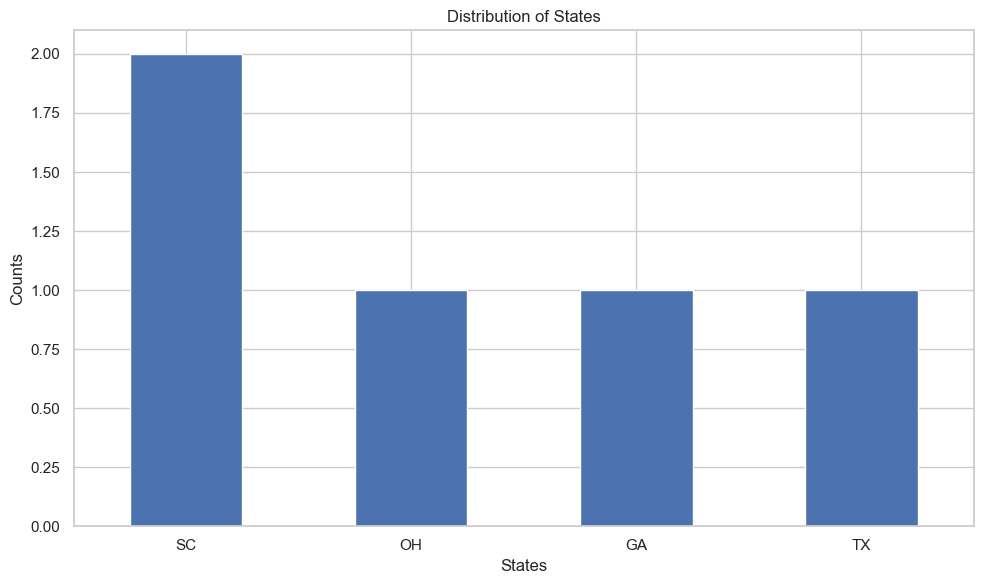

In [76]:
#Display Distribution of States.
state_counts = zc_best5['State'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
state_counts.plot(kind='bar')
plt.xlabel('States')
plt.ylabel('Counts')
plt.title('Distribution of States')
plt.xticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()

### 4.1.2 Current Average Median Houseprice by State 

In terms of average median property prices, Ohio emerges with the highest value, standing at around USD 350,000, closely trailed by Georgia. <br> South Carolina exhibits the lowest average median property price at USD 120,000. Texas slightly surpasses the USD 230,000 mark and secures the third position among the four states.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

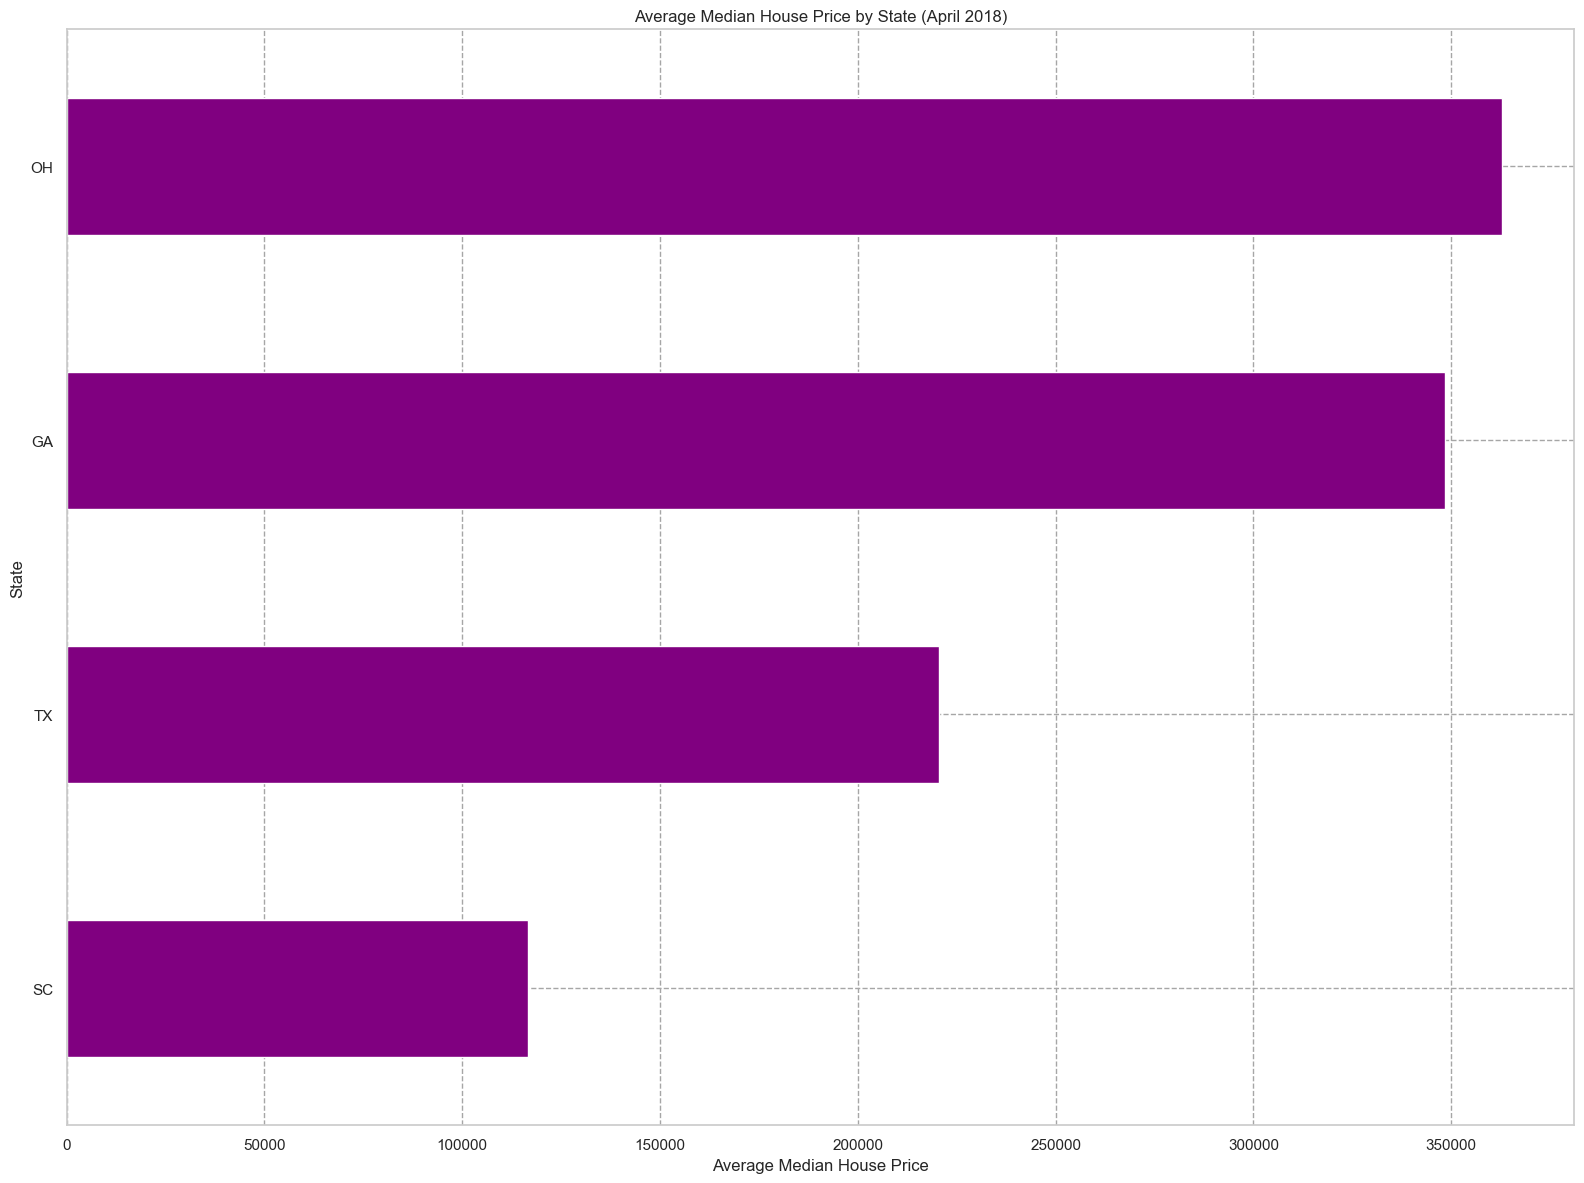

In [77]:
# Calculating the average median house price for each state in April 2018
statewise_prices = zc_best5.groupby('State')['2018-04'].mean().sort_values()

# Plotting the average median house price by state for April 2018
plt.figure(figsize=(16, 12))
statewise_prices.plot(kind='barh', color='purple')
plt.title('Average Median House Price by State (April 2018)')
plt.xlabel('Average Median House Price')
plt.ylabel('State')
plt.grid(True, which="both", ls="--", c='0.65')
plt.tight_layout()
plt.show()

### 4.2 Bivariate Analysis

### 4.2.1 City distribution per state

In the visual representation of the distribution of unique cities per state, Georgia, Ohio, and Texas each exhibit one distinct city. In contrast, South Carolina stands out with a representation of two cities.

This trend was previously observed during the zipcode selection process: South Carolina encompasses the cities of Greenville and Florence, while Ohio is exemplified by Powell, Georgia by North Decatur, and Texas by Corpus Christi

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

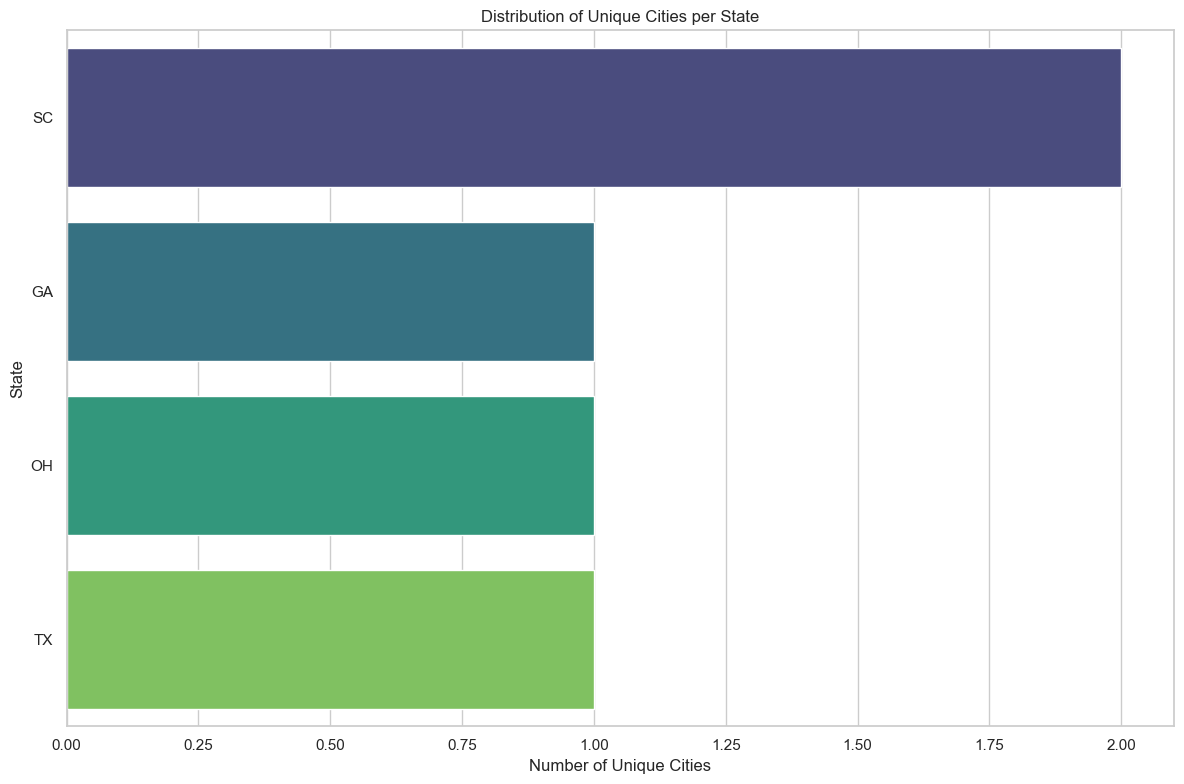

In [78]:

# Group by state and count unique cities
cities_per_state = zc_best5.groupby('State')['City'].nunique().sort_values(ascending=False)

# Plot the results using Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(y=cities_per_state.index, x=cities_per_state.values, palette='viridis')
plt.xlabel('Number of Unique Cities')
plt.ylabel('State')
plt.title('Distribution of Unique Cities per State')
plt.tight_layout()
plt.show()

### 4.2.2 Average Median House Prices vs Time 

Between 1996 and 2008, the average median house price demonstrated a largely ascending pattern, although a decline in property values occurred from 2009. <br> Subsequently, a revival in value was observed towards the end of 2012, followed by a gradual and continuous rise over the subsequent years. The peak of this upward trend was attained in 2018.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

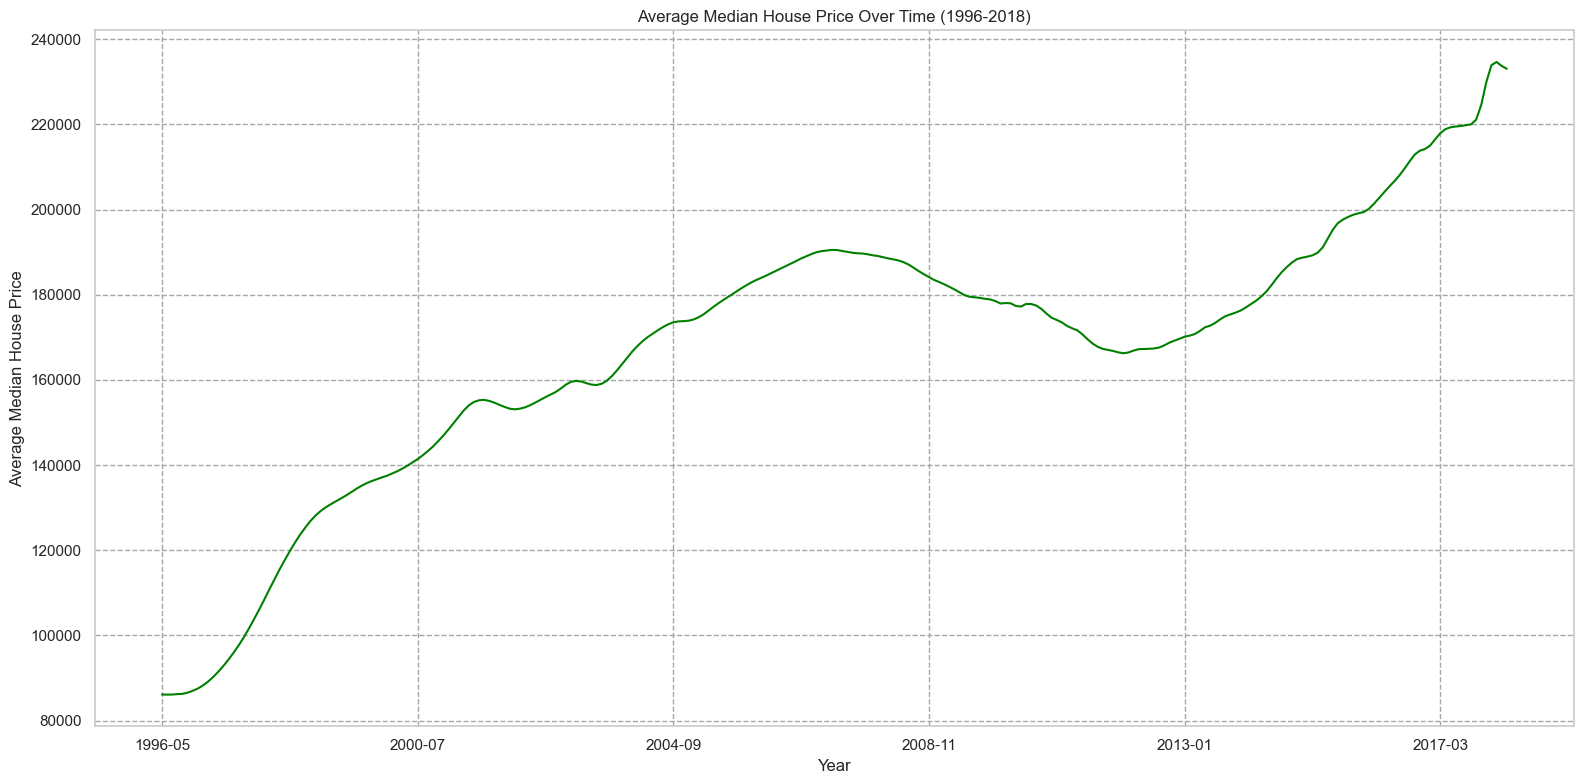

In [79]:
# Extracting all the monthly columns
monthly_columns = zc_best5.columns[7:271]

# Calculating the average median house price for each month
average_monthly_prices = zc_best5[monthly_columns].mean()

# Plotting the average median house price over time
plt.figure(figsize=(16, 8))
average_monthly_prices.plot(color='green')
plt.title('Average Median House Price Over Time (1996-2018)')
plt.xlabel('Year')
plt.ylabel('Average Median House Price')
plt.grid(True, which="both", ls="--", c='0.65')
plt.tight_layout()
plt.show()

### 4.2.3 Return on Investment vs City

Comparing Return on Investment across the cities within the dataset, the ROI figures among the five cities range quite closely, spanning from 1.65 to 1.75. <br>Leading the list with the highest ROI is Greenville, closely pursued by Powell with an ROI of 1.75 and North Decatur at 1.699. <br>Corpus Christi and Florence have ROI's of 1.666 and 1.65 respectively.

It's worth highlighting that despite Greenville and Florence been in the same state, their ROIs are situated at opposite ends of the spectrum.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

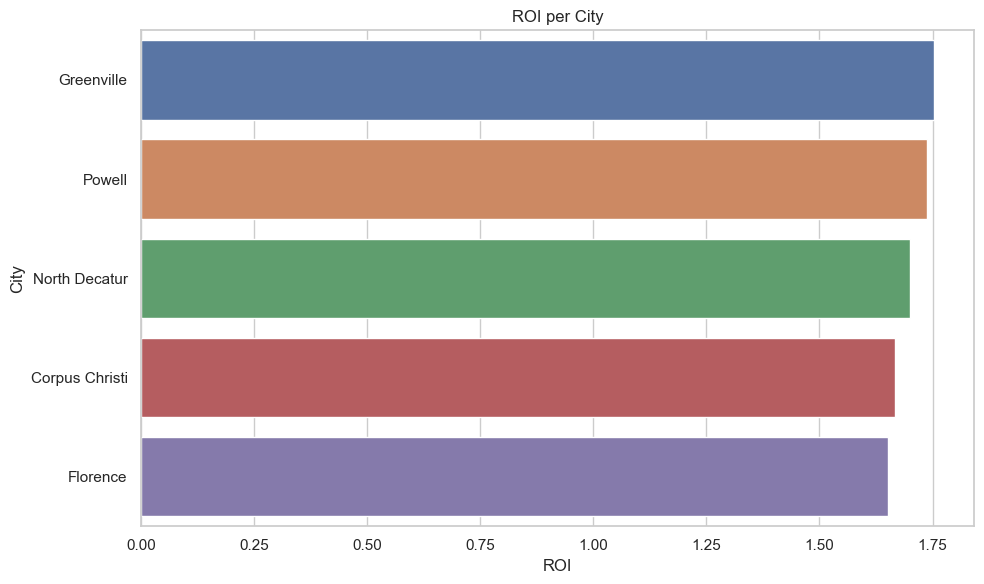

In [80]:
#Display ROI per City 
sns.set(style="whitegrid")

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='ROI', y='City', data=zc_best5)
plt.xlabel('ROI')
plt.ylabel('City')
plt.title('ROI per City')
plt.tight_layout()
plt.show()

### 4.2.4 Return on Investment in Different Timeframes per City

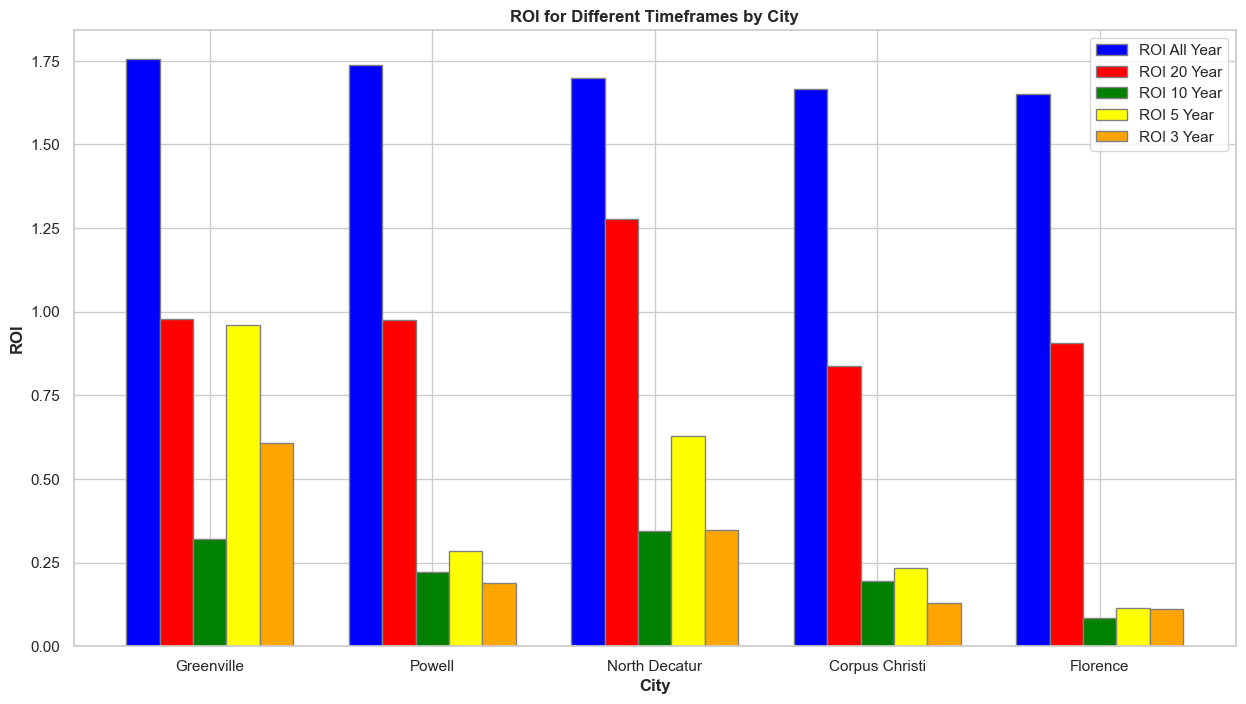

In [81]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(zc_best5)
# Set up the position of bars on x axis
r = range(len(df))
barWidth = 0.15

# Create bars
plt.figure(figsize=(15, 8))

# Bars for ROI All Year
plt.bar(r, df['ROI_allyr'], color='blue', width=barWidth, edgecolor='grey', label='ROI All Year')

# Bars for ROI 20 Year
plt.bar([x + barWidth for x in r], df['ROI_20yr'], color='red', width=barWidth, edgecolor='grey', label='ROI 20 Year')

# Bars for ROI 10 Year
plt.bar([x + barWidth*2 for x in r], df['ROI_10yr'], color='green', width=barWidth, edgecolor='grey', label='ROI 10 Year')

# Bars for ROI 5 Year
plt.bar([x + barWidth*3 for x in r], df['ROI_5yr'], color='yellow', width=barWidth, edgecolor='grey', label='ROI 5 Year')

# Bars for ROI 3 Year
plt.bar([x + barWidth*4 for x in r], df['ROI_3yr'], color='orange', width=barWidth, edgecolor='grey', label='ROI 3 Year')

# Title & Subtitle
plt.title('ROI for Different Timeframes by City', fontweight='bold')
plt.xlabel('City', fontweight='bold')
plt.ylabel('ROI', fontweight='bold')

# X axis
plt.xticks([r + barWidth*2 for r in range(len(df))], df['City'])

# Create legend & Show graphic
plt.legend()
plt.show()

### 4.2.5 Coefficient of Variance vs City

Corpus Christi has the highest CV at 0.208 while, Greenville city has the lowest CV at 0.188 .<br> Both Powell and North Decatur are averaging at a CV of 0.204. Florence city follows closely behind with a CV of approximately 0.1933.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

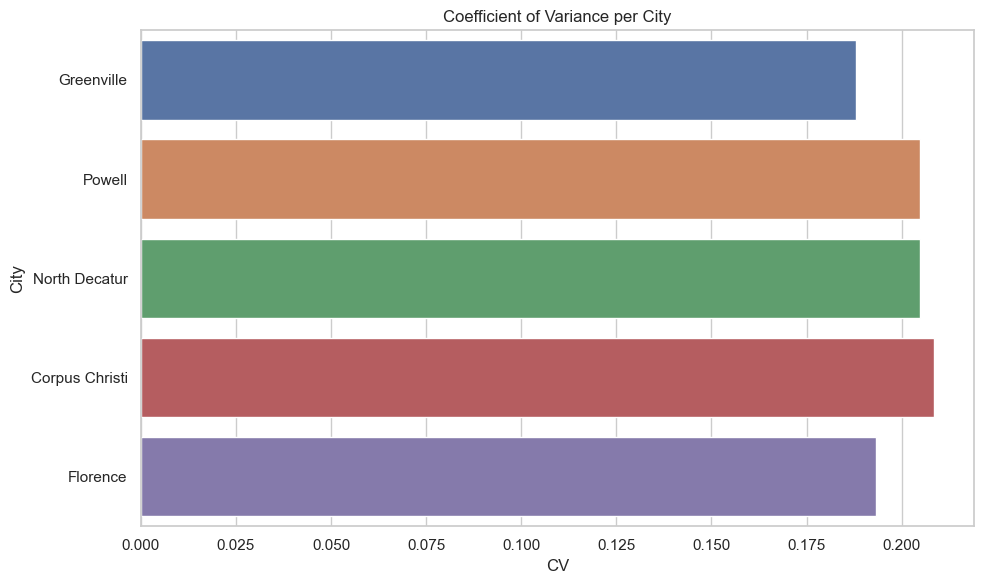

In [82]:
#Display CV per City 
sns.set(style="whitegrid")

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='CV', y='City', data=zc_best5)
plt.xlabel('CV')
plt.ylabel('City')
plt.title('Coefficient of Variance per City')
plt.tight_layout()
plt.show()

### 4.2.6 Value Property Standard Deviation vs State

Among the states, Ohio exhibits the highest standard deviation in value property, exceeding 50,000. <br>Georgia and Texas follow with standard deviations of 48,000 and 32,000 respectively, while the state of South Carolina displays the lowest standard deviation at approximately 18,000.

<IPython.core.display.Javascript object>

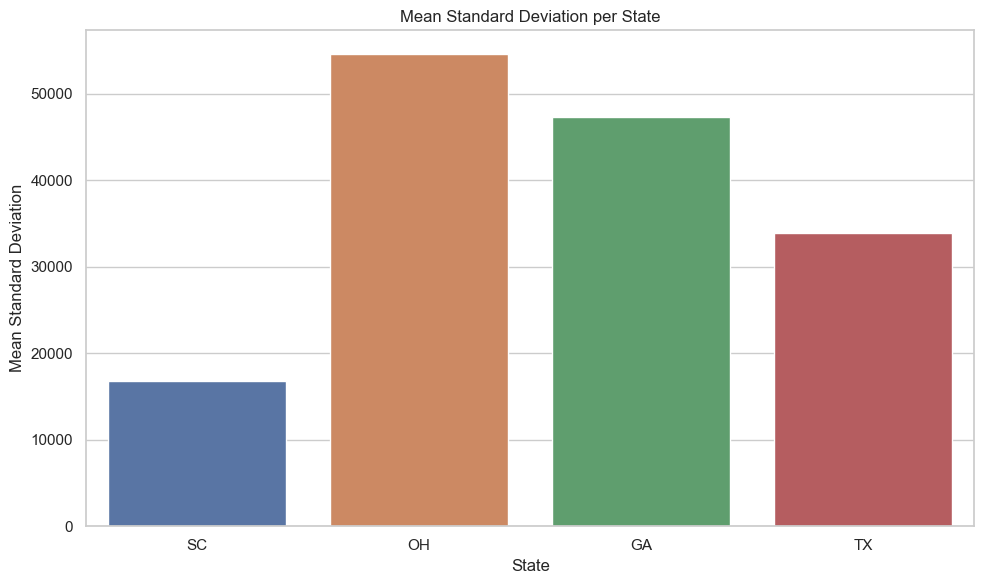

In [83]:
# Get a list of unique states
unique_states = zc_best5['State'].unique()
std_values = []

for state in unique_states:
    state_data = zc_best5[zc_best5['State'] == state]
    std_mean = state_data['std'].mean()
    std_values.append(std_mean)

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=unique_states, y=std_values)
plt.xlabel('State')
plt.ylabel('Mean Standard Deviation')
plt.title('Mean Standard Deviation per State')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

###  4.2.7 Mean CV and ROI per Zipcode/ City

The **range of ROI figures** among the five cities is relatively narrow, spanning from **1.65 to 1.75**. Leading this list with the most robust ROI is Greenville, closely followed by Powell with an ROI of 1.75 and North Decatur at 1.699. Meanwhile, Corpus Christi and Florence present ROI values of 1.666 and 1.65, respectively.

Additionally, it's noteworthy that Corpus Christi holds the highest CV at 0.208, indicating a relatively higher level of investment risk. In contrast, Greenville has the **lowest CV** at **0.188**, suggesting a more stable investment environment. Both Powell and North Decatur maintain a consistent CV average of 0.204. Florence city follows closely behind with a CV of approximately 0.1933, positioning it among the cities with moderate investment risk. 


<IPython.core.display.Javascript object>

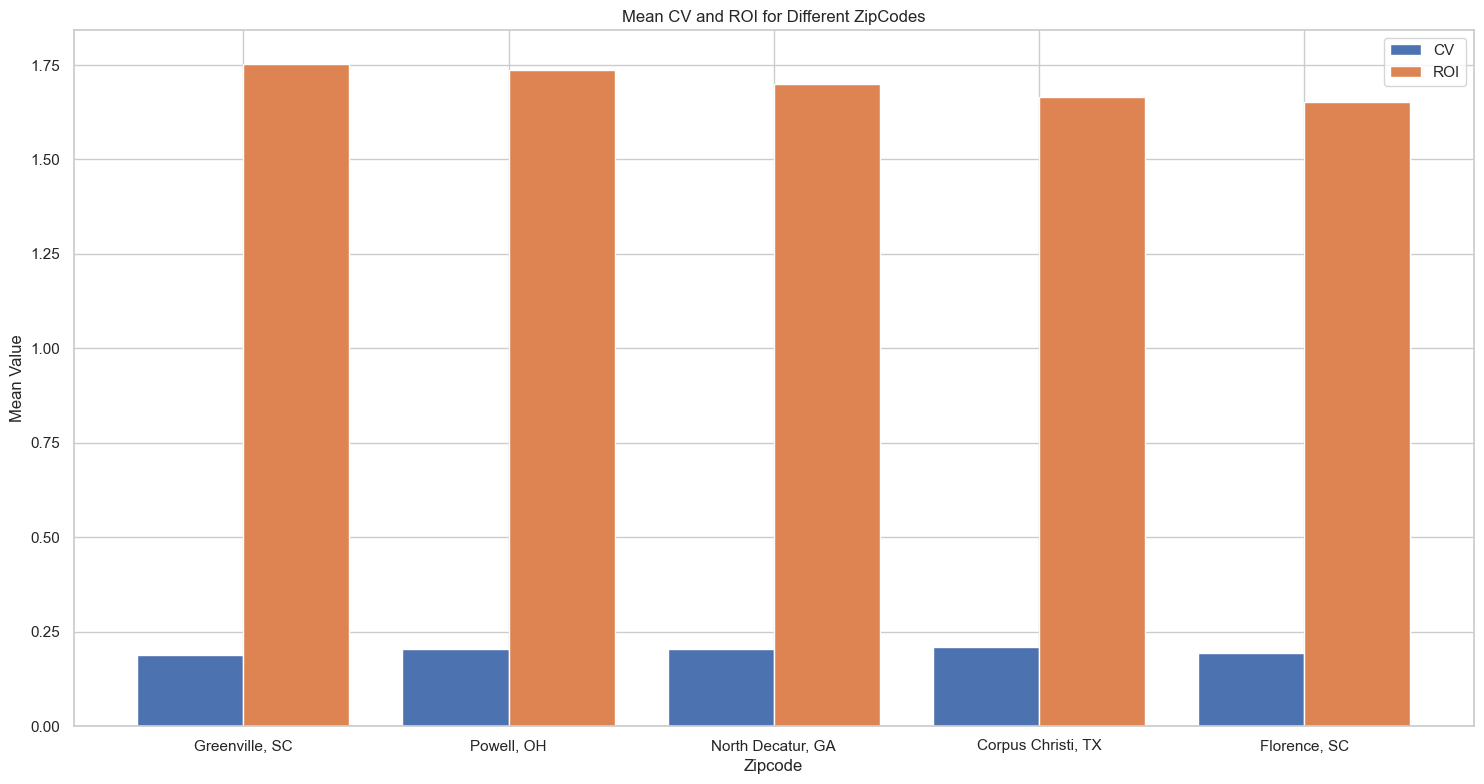

In [84]:
# To visualize ROI Per Zipcode
# Extract unique ZipCodes
unique_zipcodes = zc_best5['location'].unique()

# Prepare data for bar graph
cv_values_zip = []
roi_values_zip = []

for zipcode in unique_zipcodes:
    zipcode_data = zc_best5[zc_best5['location'] == zipcode]
    cv_mean_zip = zipcode_data['CV'].mean()
    roi_mean_zip = zipcode_data['ROI'].mean()
    cv_values_zip.append(cv_mean_zip)
    roi_values_zip.append(roi_mean_zip)

# Set up positions for the bars
x_zip = np.arange(len(unique_zipcodes))
width_zip = 0.4

# Create the bar graph for ZipCode
plt.figure(figsize=(15, 8))
plt.bar(x_zip - width_zip/2, cv_values_zip, width_zip, label='CV')
plt.bar(x_zip + width_zip/2, roi_values_zip, width_zip, label='ROI')
plt.xlabel('Zipcode')
plt.ylabel('Mean Value')
plt.title('Mean CV and ROI for Different ZipCodes')
plt.xticks(x_zip, unique_zipcodes, rotation=0)
plt.legend()
plt.tight_layout()
plt.show()


In summary, the EDA on the housing dataset showed varying trends across different zip codes.<br> While some zip codes exhibited a steady increase in median housing prices, others showed fluctuations or even a decline in certain periods. <br>Seasonality and certain cyclical patterns were observed in the data, which is typical for housing markets.

## 5.0 Reshaping the data  

In this step, we reshape the dataset (zc_best5) from a wide format and transform it into a long form datetime dataframe. <br> This restructure facilitates time based analysis.

In [85]:
# Drop unnecessary columns
columns_to_drop = ['ROI_allyr', 'ROI_20yr', 'ROI_10yr', 'ROI_5yr', 'ROI_3yr']
zc_best5.drop(columns=columns_to_drop, inplace=True)
zc_best5.head()

ZipCode            City State           Metro  CountyName  SizeRank  \
3311   29611      Greenville    SC      Greenville  Greenville      3312   
1713   43065          Powell    OH        Columbus    Delaware      1714   
2224   30033   North Decatur    GA         Atlanta      Dekalb      2225   
1512   78414  Corpus Christi    TX  Corpus Christi      Nueces      1513   
779    29501        Florence    SC        Florence    Florence       780   

       1996-04   1996-05   1996-06   1996-07  ...  2017-12  2018-01  2018-02  \
3311   32100.0   32200.0   32300.0   32300.0  ...    80400    81500    83000   
1713  132600.0  132200.0  132100.0  132200.0  ...   375600   390200   388100   
2224  129100.0  129400.0  129900.0  130400.0  ...   334200   336800   339700   
1512   82700.0   82700.0   82700.0   82700.0  ...   214200   215000   216100   
779    54700.0   54100.0   53500.0   53000.0  ...   145200   146000   146400   

      2018-03  2018-04       ROI           std           mean        CV  \
3311    85900    88400  1.753894  10614.728217   56457.358491  0.188013   
1713   374000   362900  1.736802  54613.414789  266546.792453  0.204892   
2224   344300   348500  1.699458  47361.602304  231369.433962  0.204701   
1512   218500   220500  1.666264  33868.487321  162370.566038  0.208588   
779    146000   145000  1.650823  22923.200669  118588.679245  0.193300   

                location  
3311      Greenville, SC  
1713          Powell, OH  
2224   North Decatur, GA  
1512  Corpus Christi, TX  
779         Florence, SC  

[5 rows x 276 columns]

In [86]:
#Transform from wide to long format
def melt_data(zc_best5):
    """
    Takes the zillow_data dataset in wide form or a subset of the zillow_dataset.
    Returns a long-form datetime dataframe
    with the datetime column names as the index and the values as the 'values' column.
    If more than one row is passed in the wide-form dataset, the values column
    will be the mean of the values from the datetime columns in all of the rows.
    """
    melted = pd.melt(zc_best5,
                     id_vars=['ZipCode','SizeRank', 'City',
                              'State', 'Metro', 'CountyName', 'ROI', 'std', 'mean', 'CV','location'],
                     var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['SizeRank'])
    melted.set_index('time', inplace=True)
    return melted

    

In [87]:
#Assigning Melted data to df_melted
df_melted = melt_data(zc_best5)
df_melted.head()

ZipCode  SizeRank            City State           Metro  \
time                                                                 
1996-04-01   29611      3312      Greenville    SC      Greenville   
1996-04-01   43065      1714          Powell    OH        Columbus   
1996-04-01   30033      2225   North Decatur    GA         Atlanta   
1996-04-01   78414      1513  Corpus Christi    TX  Corpus Christi   
1996-04-01   29501       780        Florence    SC        Florence   

            CountyName       ROI           std           mean        CV  \
time                                                                      
1996-04-01  Greenville  1.753894  10614.728217   56457.358491  0.188013   
1996-04-01    Delaware  1.736802  54613.414789  266546.792453  0.204892   
1996-04-01      Dekalb  1.699458  47361.602304  231369.433962  0.204701   
1996-04-01      Nueces  1.666264  33868.487321  162370.566038  0.208588   
1996-04-01    Florence  1.650823  22923.200669  118588.679245  0.193300   

                      location     value  
time                                      
1996-04-01      Greenville, SC   32100.0  
1996-04-01          Powell, OH  132600.0  
1996-04-01   North Decatur, GA  129100.0  
1996-04-01  Corpus Christi, TX   82700.0  
1996-04-01        Florence, SC   54700.0

In [88]:
#Summary of melted data
df_melted.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1325 entries, 1996-04-01 to 2018-04-01
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   ZipCode     1325 non-null   category
 1   SizeRank    1325 non-null   int64   
 2   City        1325 non-null   object  
 3   State       1325 non-null   object  
 4   Metro       1325 non-null   object  
 5   CountyName  1325 non-null   object  
 6   ROI         1325 non-null   float64 
 7   std         1325 non-null   float64 
 8   mean        1325 non-null   float64 
 9   CV          1325 non-null   float64 
 10  location    1325 non-null   object  
 11  value       1325 non-null   float64 
dtypes: category(1), float64(5), int64(1), object(5)
memory usage: 749.7+ KB


### Summary of dataframe : df_melted

- The DataFrame has 1325 rows that range from April 1, 1996, to April 1, 2018.
- There are 12 columns in total, Namely : Zipcode, SizeRank, City, State, Metro, CountryName, ROI, std, mean, CV, Location and value. 
- There are no missing values in the data.
- The data types in the dataframe are int64, category, object and float64.
- The estimated memory usage for this DataFrame is around 873.7 kilobytes.


### 5.1 Property Value Across Different States

Ohio State stands out with higher property values, typically falling within the range of 24,000 to 30,000 USD.<br> On the other hand, South Carolina displays the lowest property values, spanning from approximately 6,000 to 13,000 USD. <br> Georgia and Texas fall into the category of moderately valued properties. Georgia's property values closely shadow Ohio's, ranging roughly from 22,000 to 26,000 USD. Meanwhile, Texas properties are valued between 14,000 to 18,000 USD.

<IPython.core.display.Javascript object>

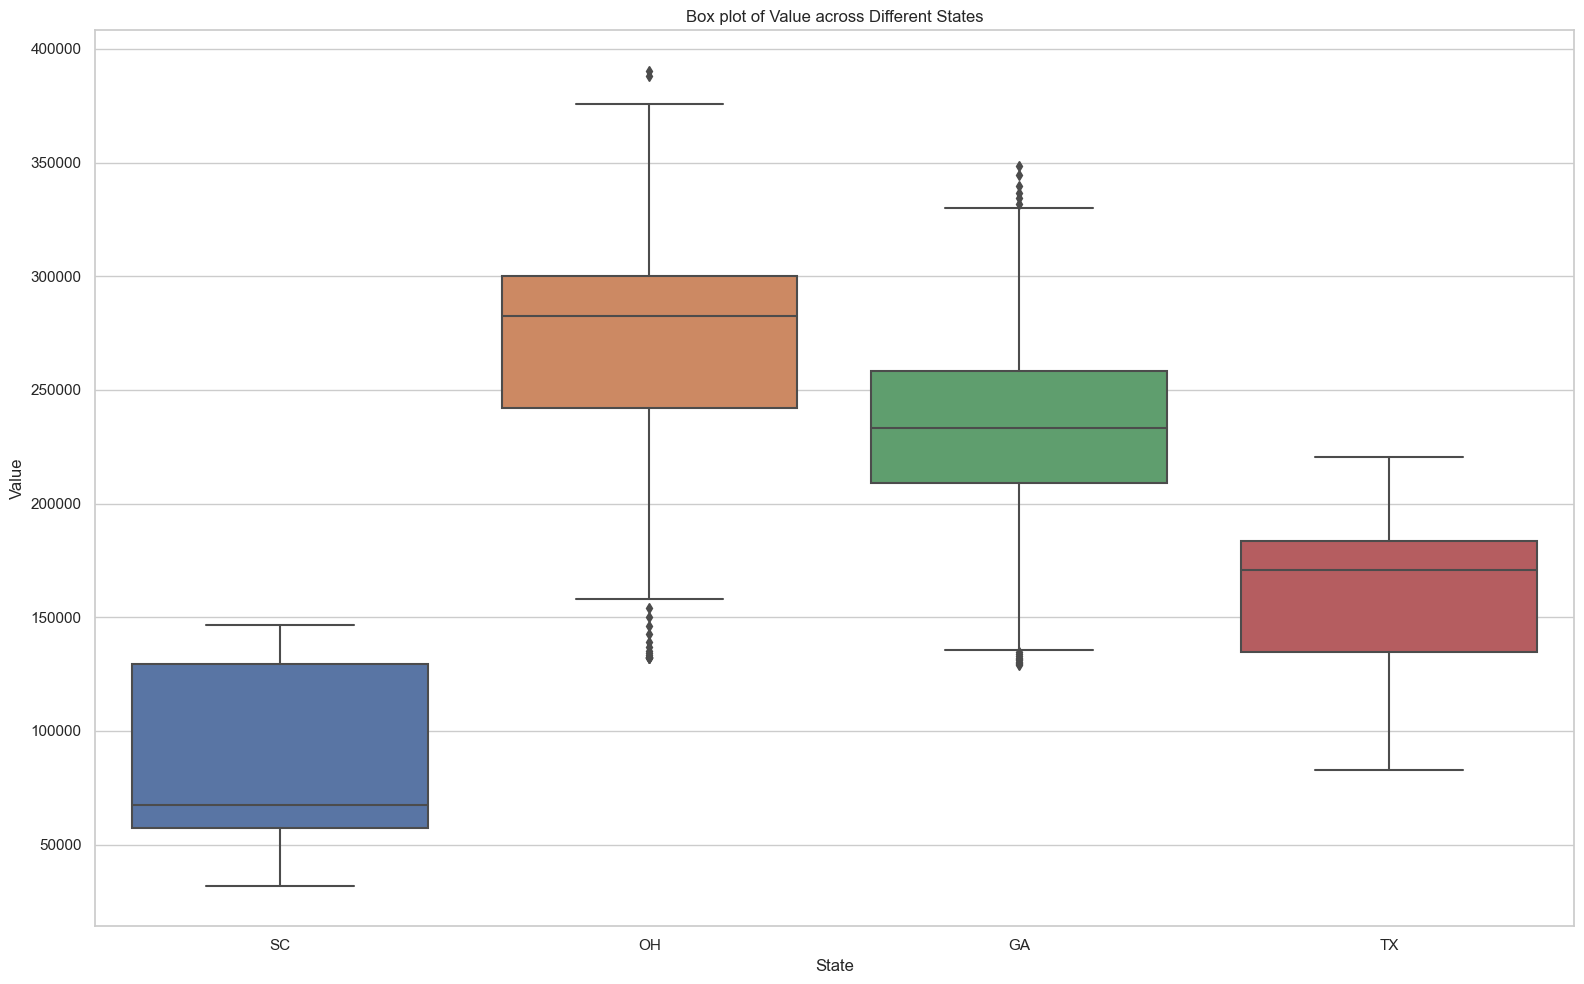

In [89]:
# Assuming df_melted is available and contains the mentioned columns

# Create a box plot for value across different States
plt.figure(figsize=(16, 10))
sns.boxplot(x=df_melted['State'], y=df_melted['value'])
plt.title('Box plot of Value across Different States')
plt.xlabel('State')
plt.ylabel('Value')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### 5.2 Distribution of Property Prices 

Property prices exhibit a span from 25,000 to roughly 380,000 USD within the dataset, with the bulk of homes falling within the 12,000 to 300,000 USD range. Notably, there is a pronounced peak in frequency of properties around 5000 to 6000 USD and 12,000 and 14,000 USD. <br>
A small majority of properties is seen to be present beyond the 350,000 value Mark.<br>

<IPython.core.display.Javascript object>

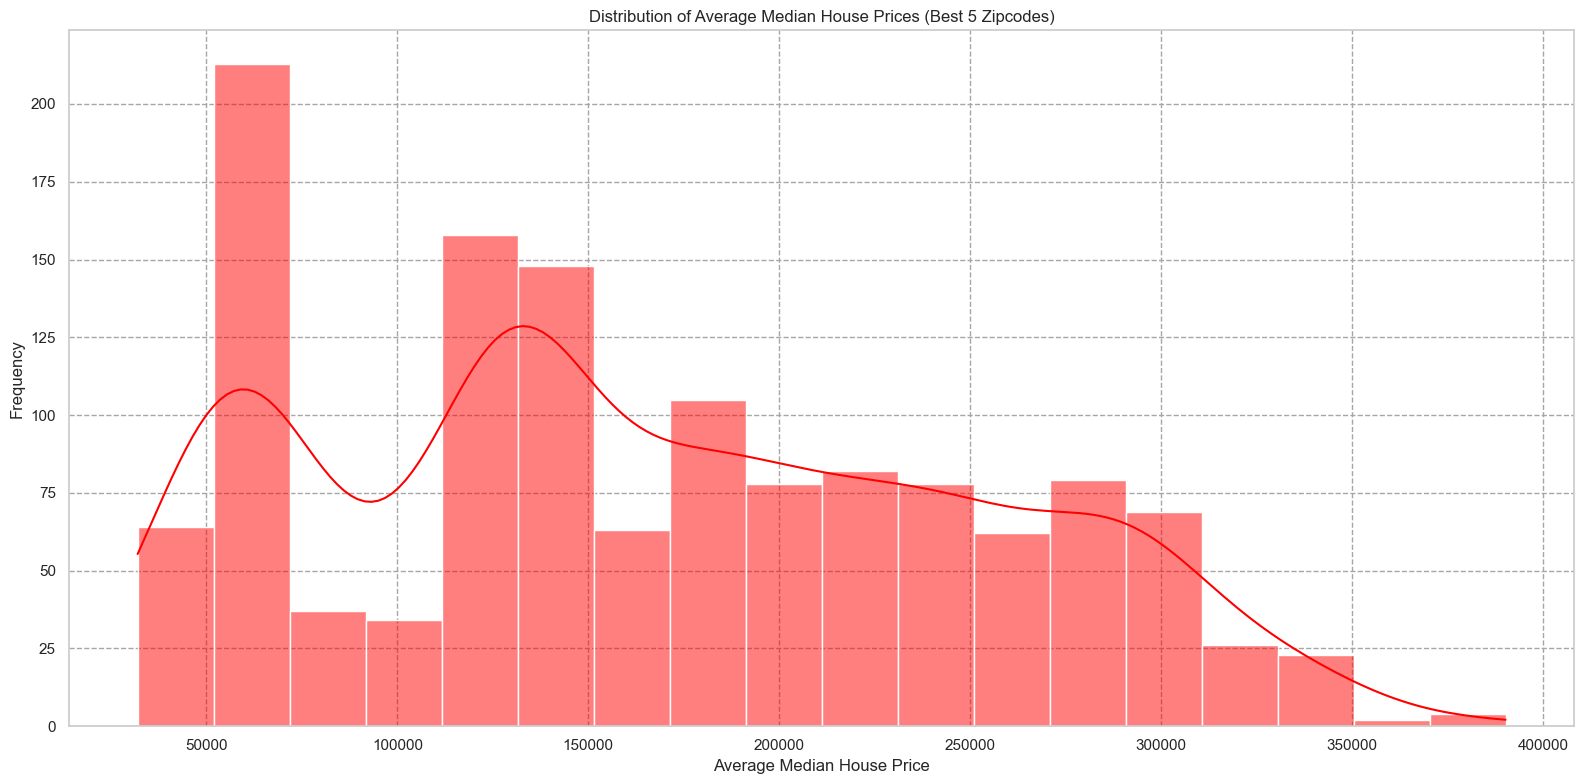

In [90]:
# Plotting the distribution of median house prices from the sample data
plt.figure(figsize=(16, 8))
sns.histplot(df_melted['value'], bins=18, kde=True, color='red')
plt.title('Distribution of Average Median House Prices (Best 5 Zipcodes)')
plt.xlabel('Average Median House Price')
plt.ylabel('Frequency')
plt.grid(True, which="both", ls="--", c='0.65')
plt.tight_layout()
plt.show()

## 6.0 Time series Modelling

![Alt Text](https://www.memecreator.org/static/images/memes/5232399.jpg)

![Alt Text](https://game-ace.com/wp-content/uploads/2019/09/process-of-creating-3D-model.png)



In [91]:
#Reconfirm columns in our dataframe
df_melted.columns

Index(['ZipCode', 'SizeRank', 'City', 'State', 'Metro', 'CountyName', 'ROI',
       'std', 'mean', 'CV', 'location', 'value'],
      dtype='object')

### 6.1 Property value per each Zip code over time

A clear distinct upward trend is observed across all cities.<br> Greenville, Corpus Christi, and Florence display relatively consistent and gradual growth patterns, with minimal occurrences of negative fluctuations.

Powell is marked by abrupt and unstable cyclic movements that move between negative and positive shifts over the years. Similarly, North Decatur experiences an abrupt decline in property values in the year 2011.

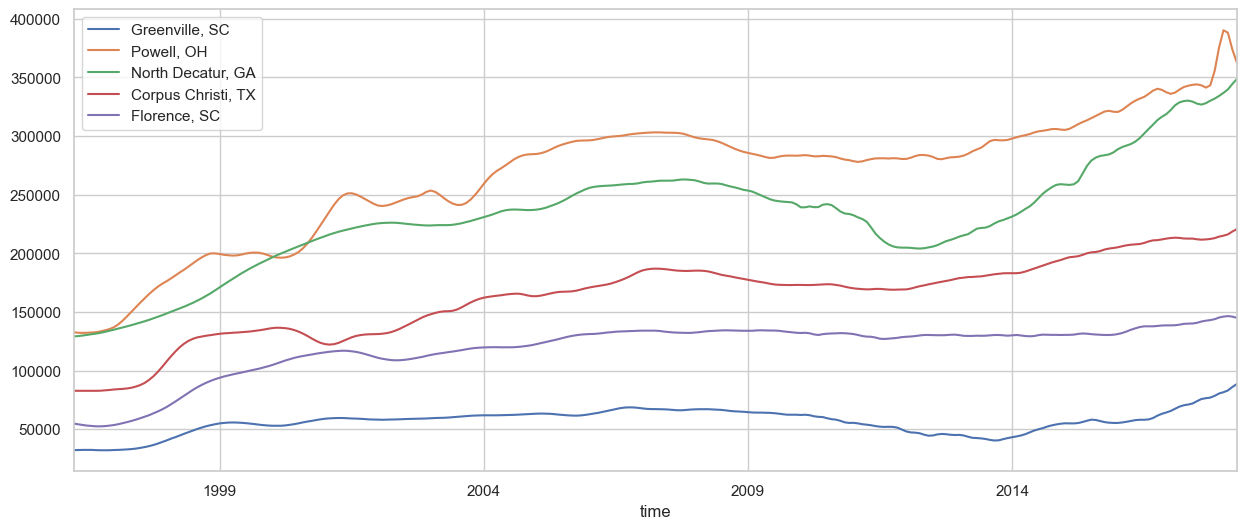

In [92]:
import matplotlib.pyplot as plt
# Unique zip codes from df_melted
unique_zipcodes = df_melted['location'].unique()
# Plotting for the first 5 unique zip codes
for zipcode in unique_zipcodes[:5]:
    subset = df_melted[df_melted['location'] == zipcode]
    subset['value'].plot(label=zipcode, figsize=(15, 6))
    plt.legend()

### 6.1.1 Decomposition

Using time series decomposition, we breakdown the timeseries dataset into its underlying components inorder to understand and analyse the trends and seasonal variations within the data.<br> The time series is decomposed using an additive model, and a seasonal period of 12.<br>
The **"Observed" component** shows an increase in the median housing prices(the "value" column ) over time.<br>
The **"Trend" component** captures the long-term upward movement in our data, indicating that housing prices are generally increasing.<br>
The **"Seasonal" component** reveals regular patterns in housing prices repeating over specific time intervals, an indication of the presence of seasonal variations in our dataset<br>.
The **"Residual" component** is also interesting and shows the unexplained fluctuations in housing prices that are not accounted for by the trend or seasonal patterns. This is an indication of high variability in the early and later years of the series.<br>


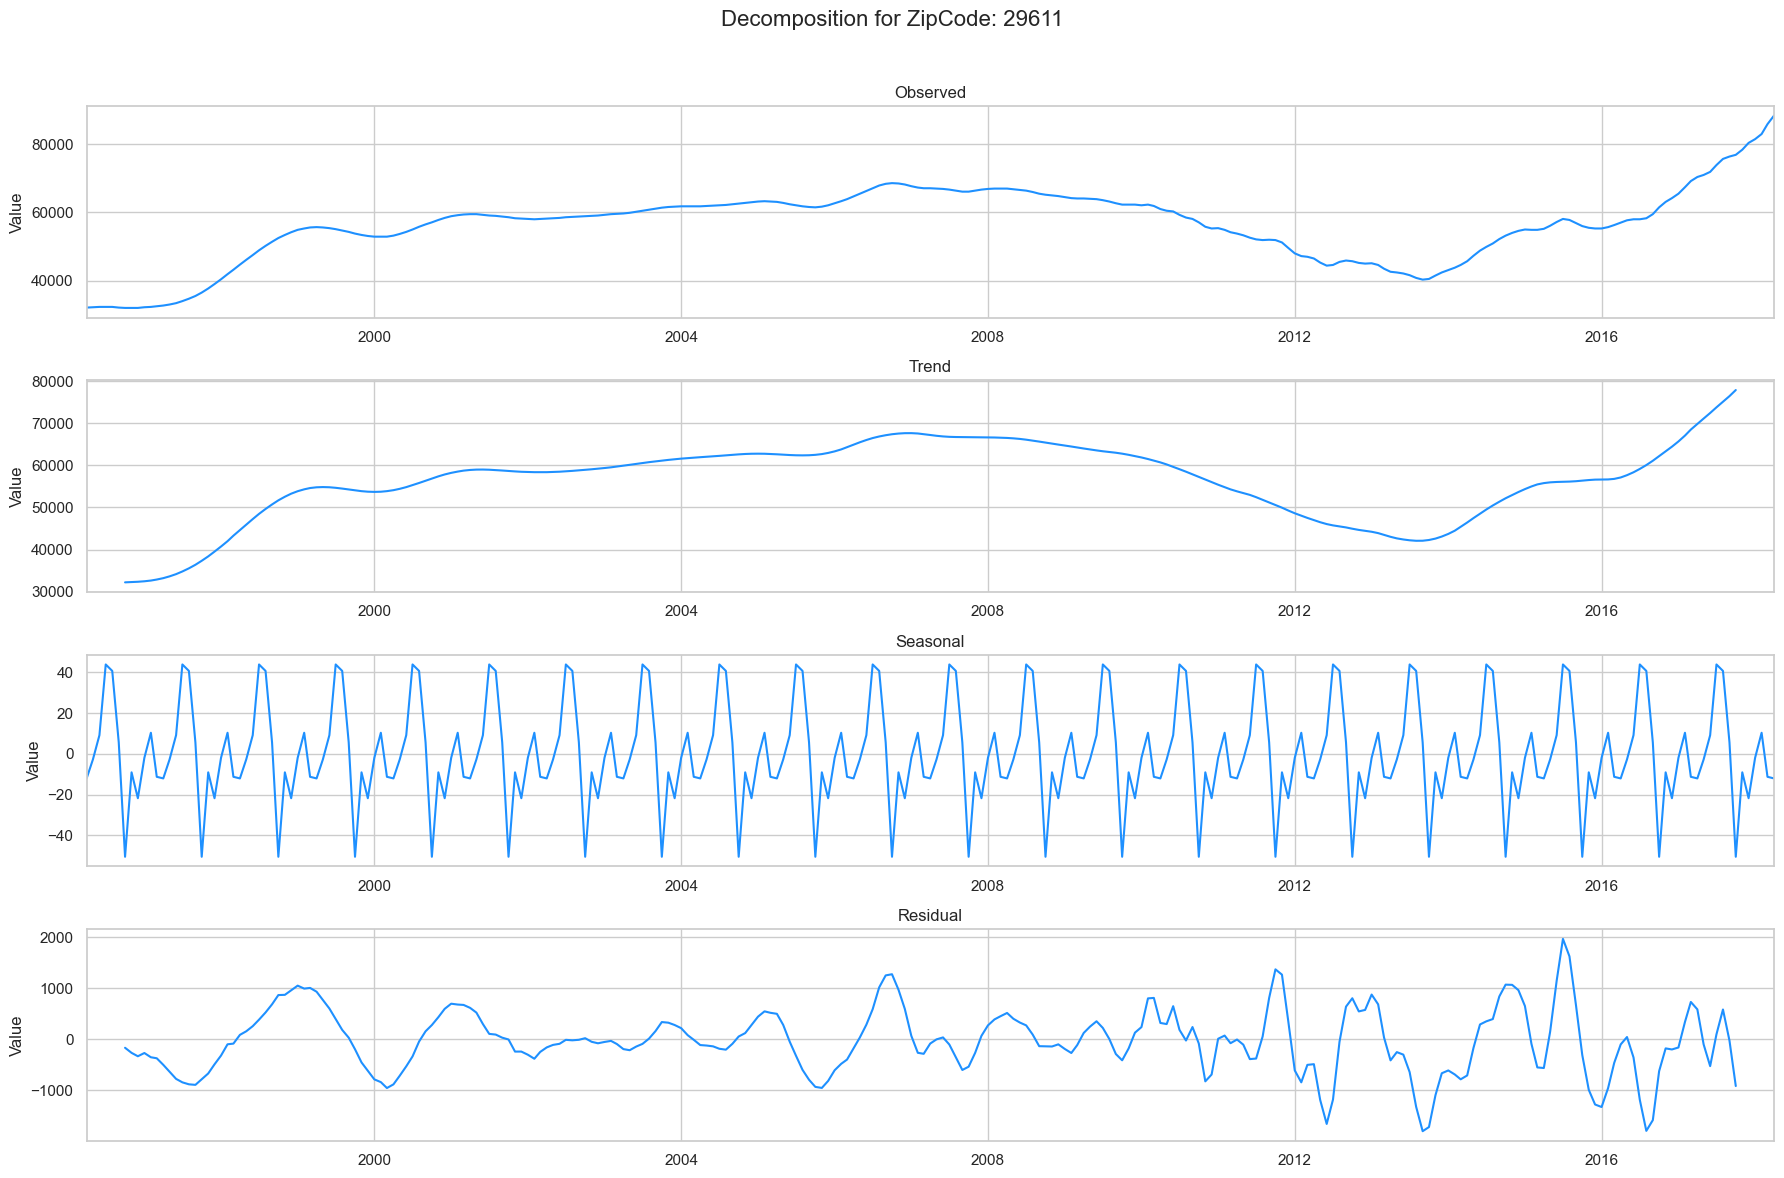

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


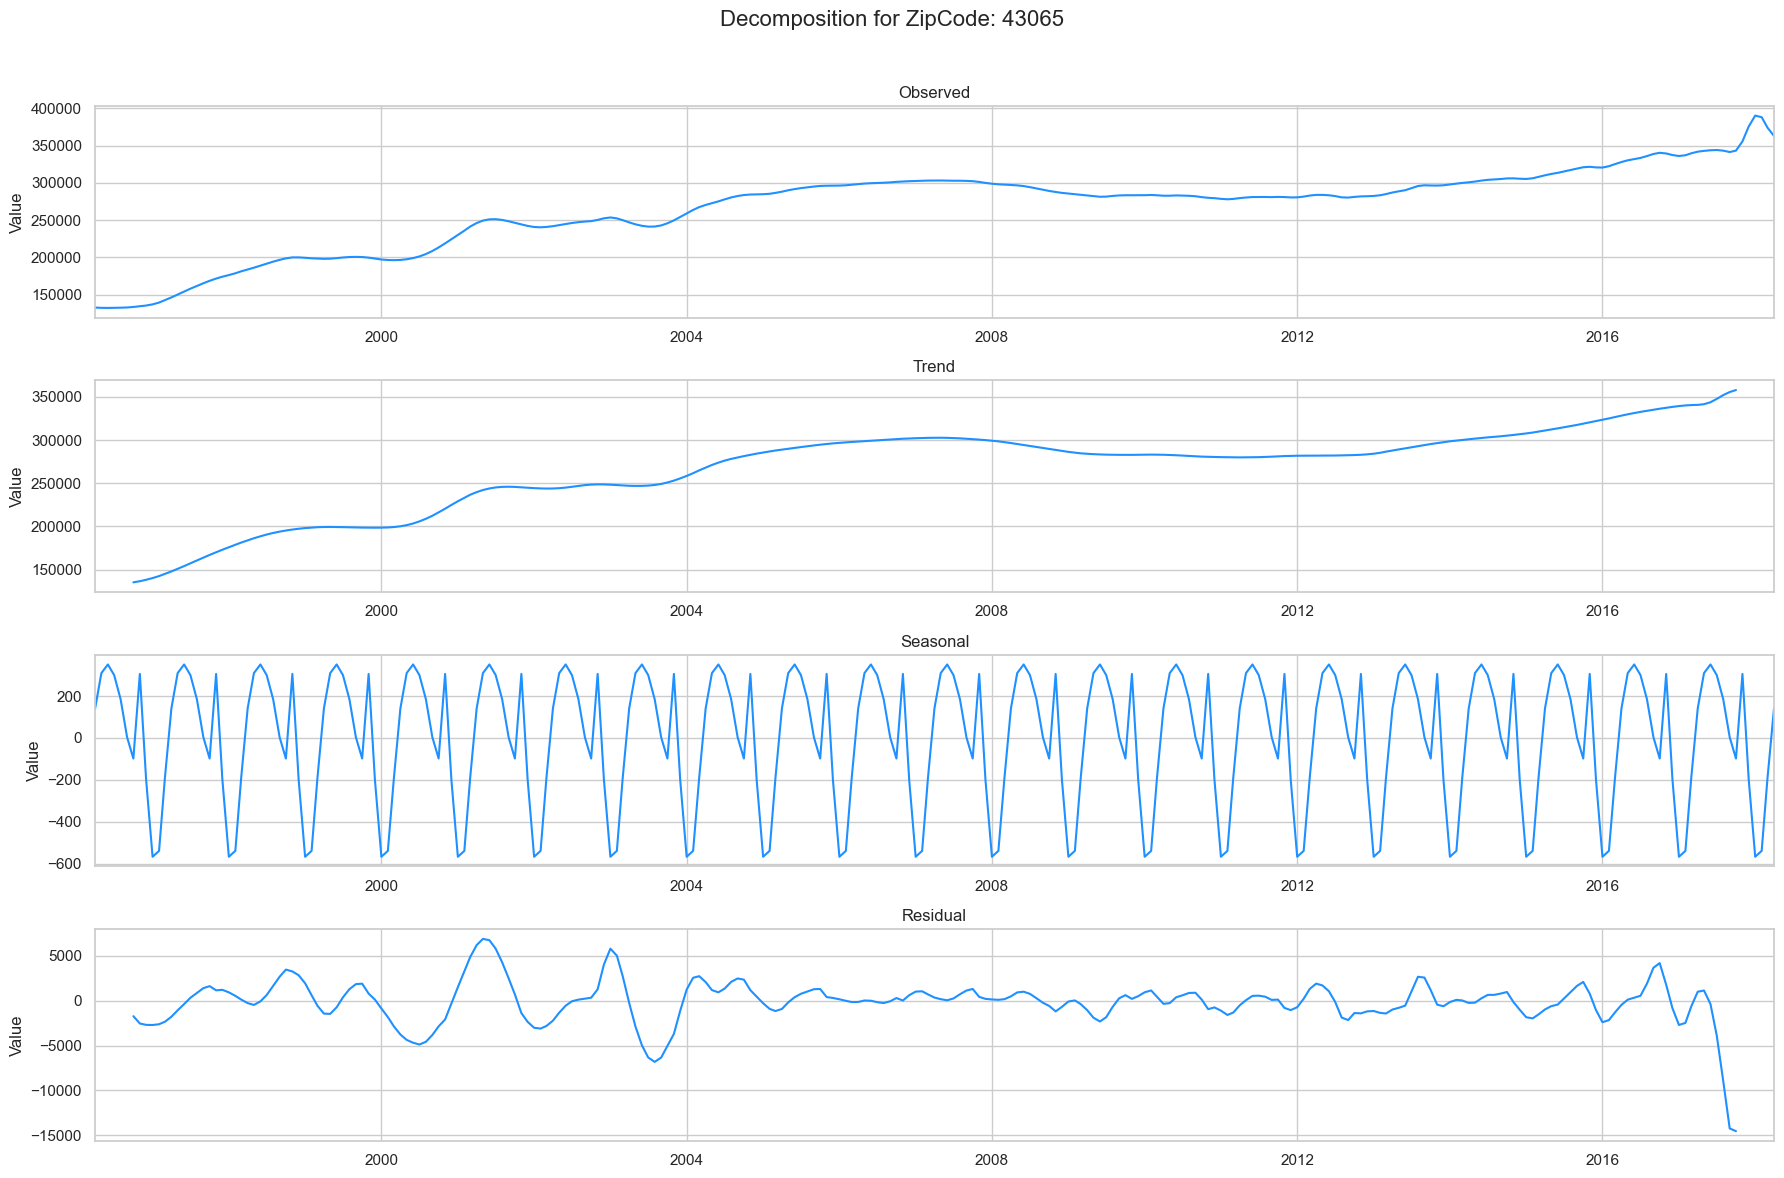

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


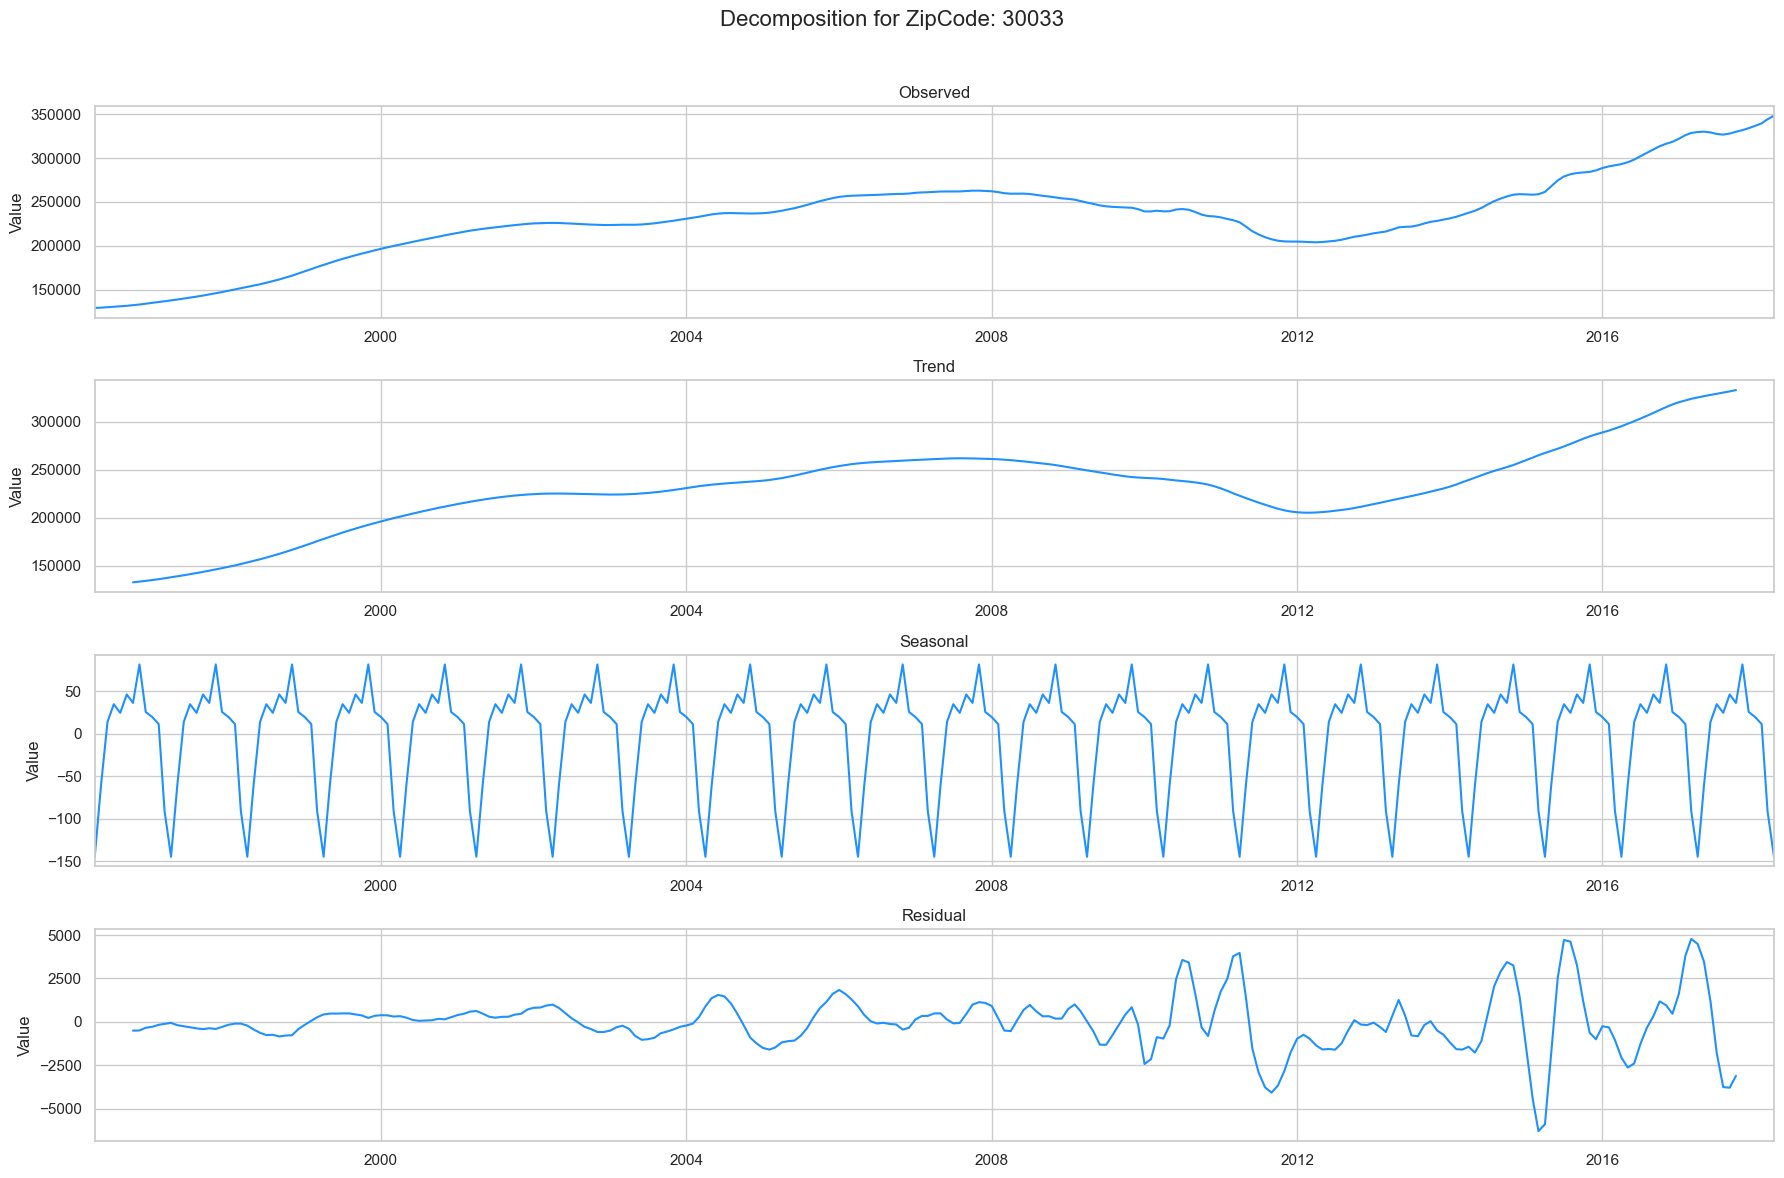

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


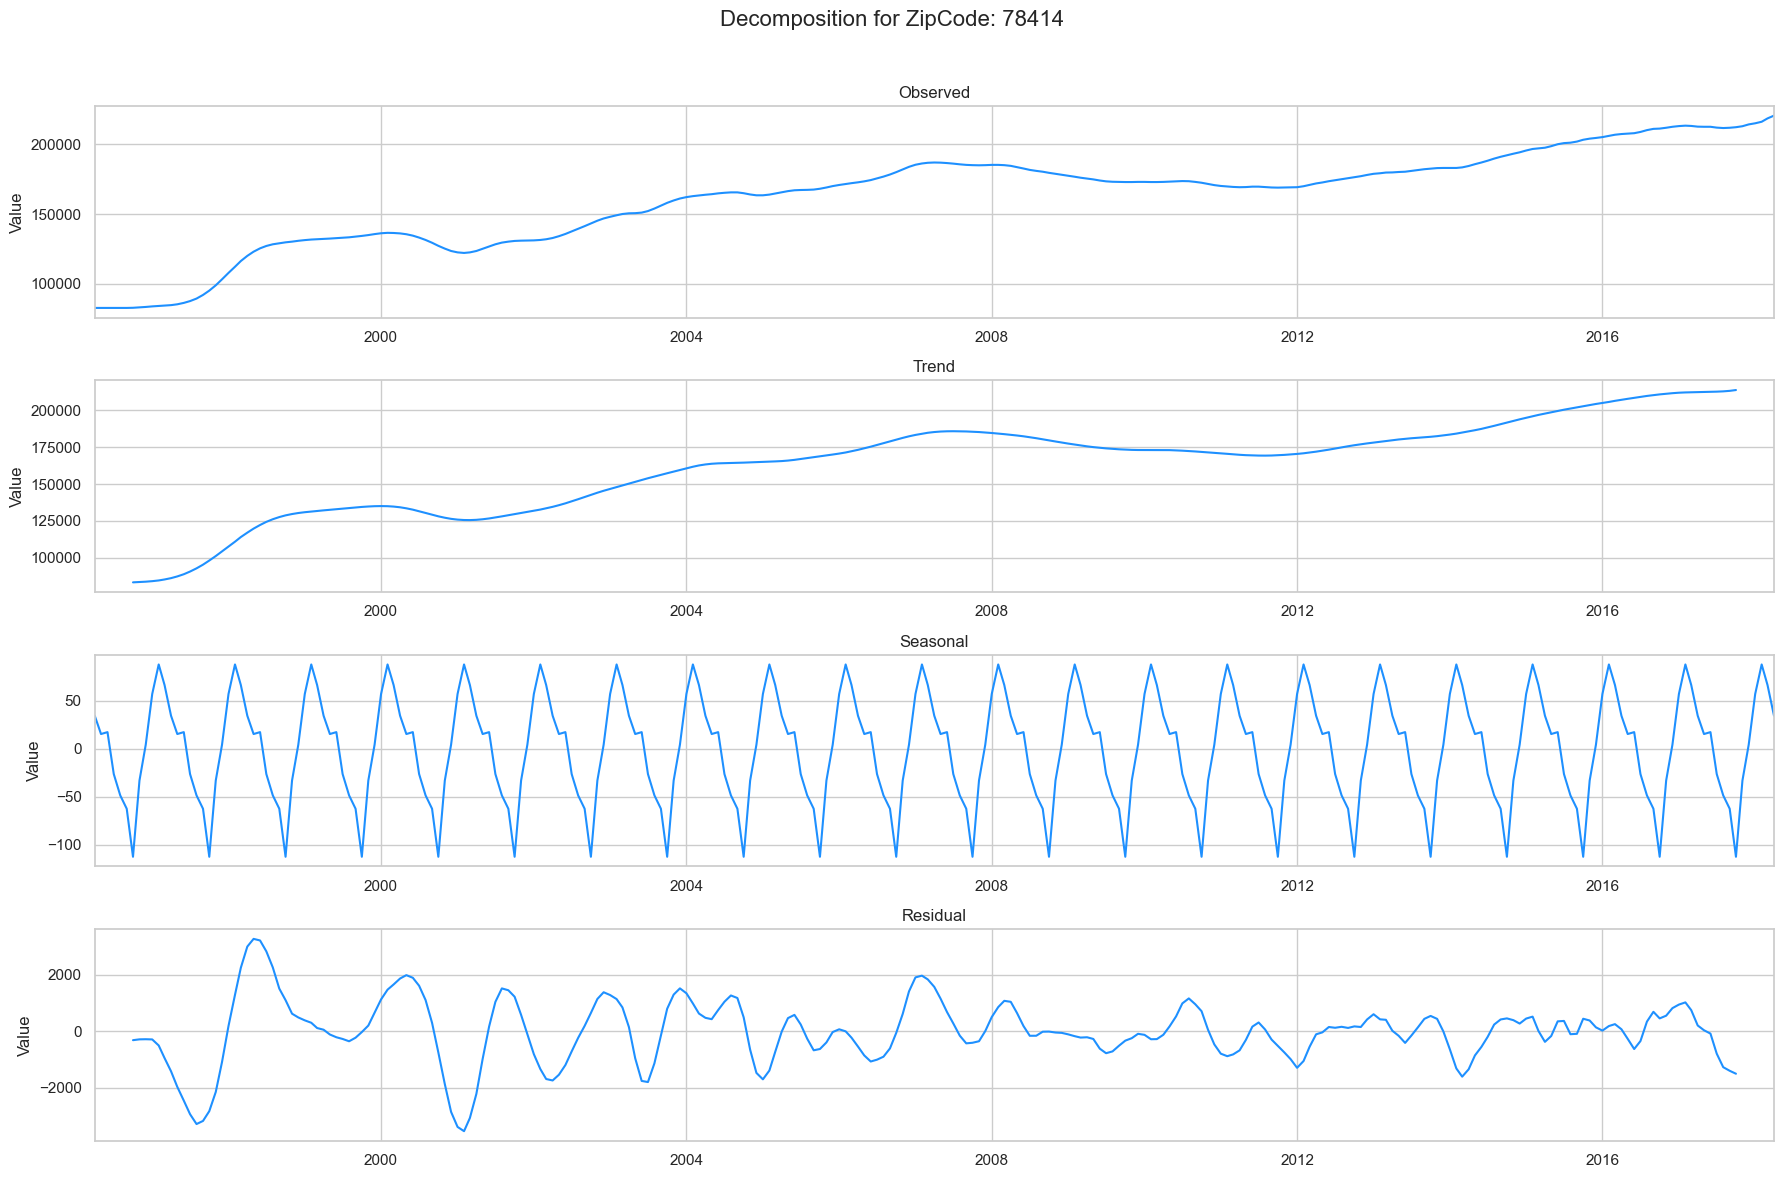

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


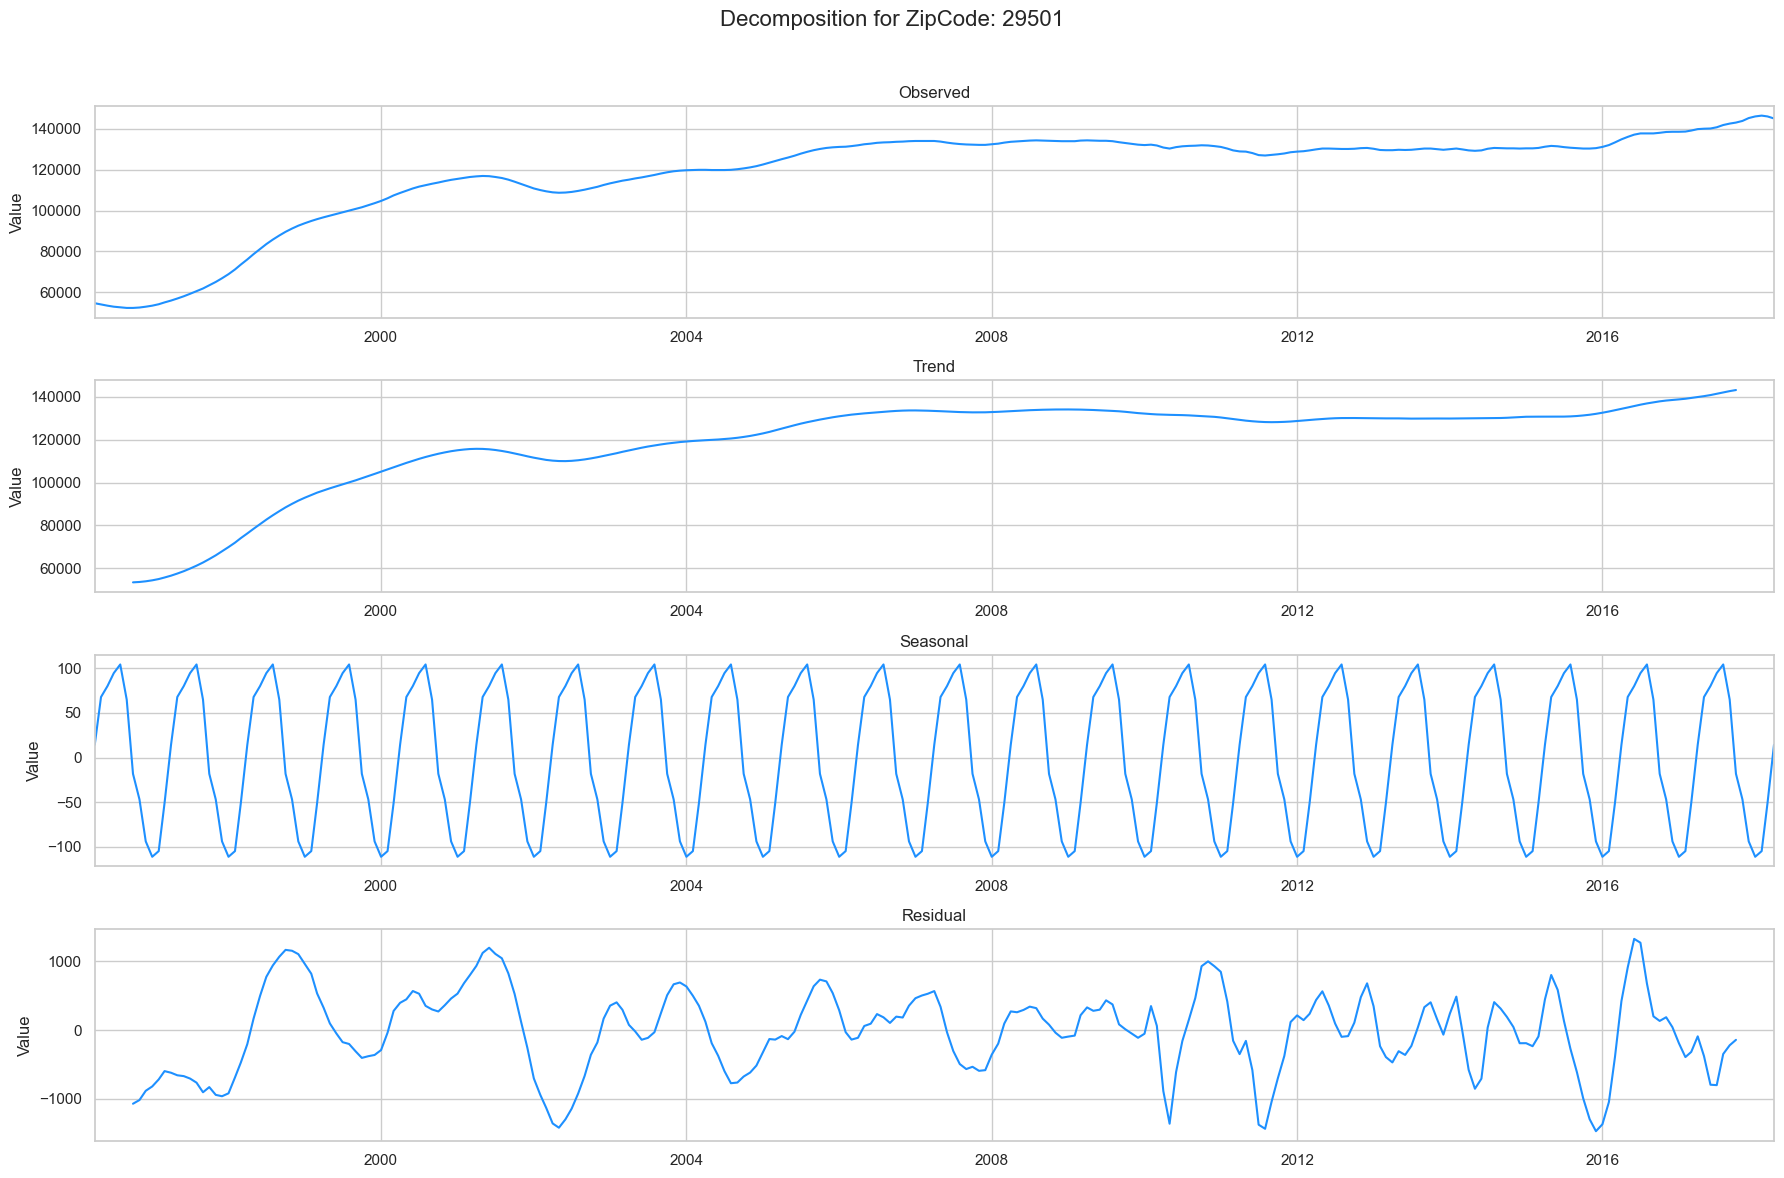

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


In [93]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import seaborn as sns
# Set Seaborn style
sns.set_style("whitegrid")
# Loop through each unique zipcode
for zipcode in df_melted['ZipCode'].unique():
    # Filter the dataframe for the current zipcode
    zipcode_data = df_melted[df_melted['ZipCode'] == zipcode]['value']
    # Decompose the time series for the current zipcode
    decomposition = seasonal_decompose(zipcode_data, model='additive', period=12)
    # Plot the decomposed time series components
    fig, axes = plt.subplots(ncols=1, nrows=4, figsize=(18, 12))
    fig.suptitle(f"Decomposition for ZipCode: {zipcode}", fontsize=16)
    # Original Time Series
    axes[0].plot(decomposition.observed, color='dodgerblue')
    axes[0].set_title('Observed')
    axes[0].set_ylabel('Value')
    axes[0].set_xlim([decomposition.observed.index.min(), decomposition.observed.index.max()])
    # Trend component
    axes[1].plot(decomposition.trend, color='dodgerblue')
    axes[1].set_title('Trend')
    axes[1].set_ylabel('Value')
    axes[1].set_xlim([decomposition.trend.index.min(), decomposition.trend.index.max()])
    # Seasonal component
    axes[2].plot(decomposition.seasonal, color='dodgerblue')
    axes[2].set_title('Seasonal')
    axes[2].set_ylabel('Value')
    axes[2].set_xlim([decomposition.seasonal.index.min(), decomposition.seasonal.index.max()])
    # Residual component
    axes[3].plot(decomposition.resid, color='dodgerblue')
    axes[3].set_title('Residual')
    axes[3].set_ylabel('Value')
    axes[3].set_xlim([decomposition.resid.index.min(), decomposition.resid.index.max()])
    plt.tight_layout()
    plt.subplots_adjust(top=0.90)  # Adjust title position
    plt.show()
    # Add a dotted line to separate decompositions
    print("-" * 300)

### 6.1.2 Calculation of property returns
We are interested in identifying relative changes and growth patterns thus we create a returns column for our times series.
Monthly returns are calculated for each unique zipcode based on the property values and added to the df_melted dataframe under column "ret".<br>
The formula utilised is 

        (next_month_value / current_month_value) - 1

In this calculation, NAN's are introduced to the column "ret".<br> This is because the calculation involves referencing the previous month's property value. For the first month of each zip code subset, there is no previous month's value to reference, leading to a division by zero and resulting in a NaN value for that specific row's return calculation.

The number of NANs introduced are 5 which We handle be dropping them. <br>
The resulting dataframe has 13 columns and 1325 rows.

In [94]:
# Unique zip codes from df_melted
unique_zipcodes = df_melted['location'].unique()
# Add a new 'ret' column to df_melted to store monthly returns
df_melted['ret'] = np.nan
# Calculate monthly returns for each unique zip code
for zipcode in unique_zipcodes:
    subset = df_melted[df_melted['location'] == zipcode].copy()
    for i in range(len(subset) - 1):
        subset['ret'].iloc[i + 1] = (subset['value'].iloc[i + 1] / subset['value'].iloc[i]) - 1
    df_melted.loc[df_melted['location'] == zipcode, 'ret'] = subset['ret']

<IPython.core.display.Javascript object>

In [95]:
df_melted.head(5)

ZipCode  SizeRank            City State           Metro  \
time                                                                 
1996-04-01   29611      3312      Greenville    SC      Greenville   
1996-04-01   43065      1714          Powell    OH        Columbus   
1996-04-01   30033      2225   North Decatur    GA         Atlanta   
1996-04-01   78414      1513  Corpus Christi    TX  Corpus Christi   
1996-04-01   29501       780        Florence    SC        Florence   

            CountyName       ROI           std           mean        CV  \
time                                                                      
1996-04-01  Greenville  1.753894  10614.728217   56457.358491  0.188013   
1996-04-01    Delaware  1.736802  54613.414789  266546.792453  0.204892   
1996-04-01      Dekalb  1.699458  47361.602304  231369.433962  0.204701   
1996-04-01      Nueces  1.666264  33868.487321  162370.566038  0.208588   
1996-04-01    Florence  1.650823  22923.200669  118588.679245  0.193300   

                      location     value  ret  
time                                           
1996-04-01      Greenville, SC   32100.0  NaN  
1996-04-01          Powell, OH  132600.0  NaN  
1996-04-01   North Decatur, GA  129100.0  NaN  
1996-04-01  Corpus Christi, TX   82700.0  NaN  
1996-04-01        Florence, SC   54700.0  NaN

In [96]:
df_melted["ret"].isna().sum()

5

In [97]:
df_melted.shape

(1325, 13)

In [98]:
df_melted.dropna(inplace=True)

### 6.2 Checking for Stationarity

### 6.2.1 Adfuller Test

A time series is considered **Stationary** if its statistical properties remain constant over time. 
In this case the properties in question would be **mean and standard deviation/ variance.**

In order to identify trends and variability in the column "ret", we visualise each zipcode over the time duration of our dataset, calculate its rolling mean and standard deviation and plot it.

We also utilise the **Augumented Dickey-Fuller (ADF)** test to calculate the P_values of each of the "ret" zipcodes and come up with the below conclusion :

       ADFuller test for zipcode: 30033 (Location: North Decatur, GA)<br>
       p-value: 0.1346654053328356. The series is non-stationary. 
    
The P-values of the other 4 zipcodes fall **under the 0.05** significance level meaning they are **stationary**.

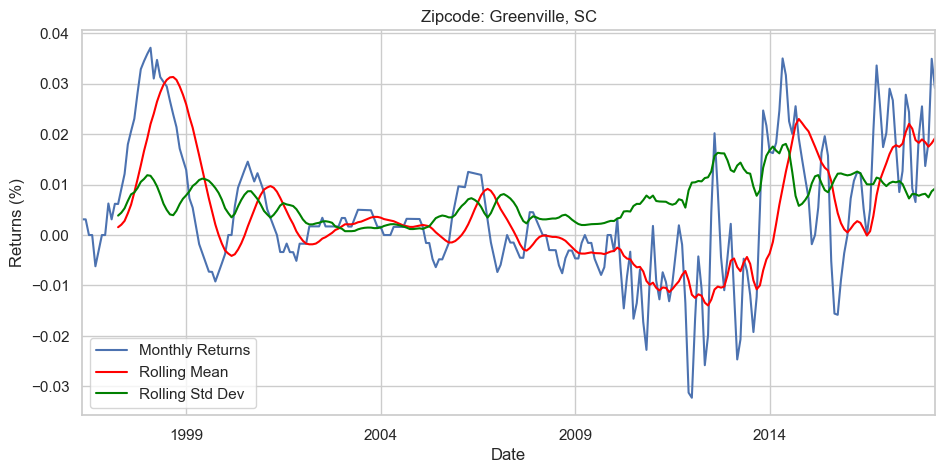

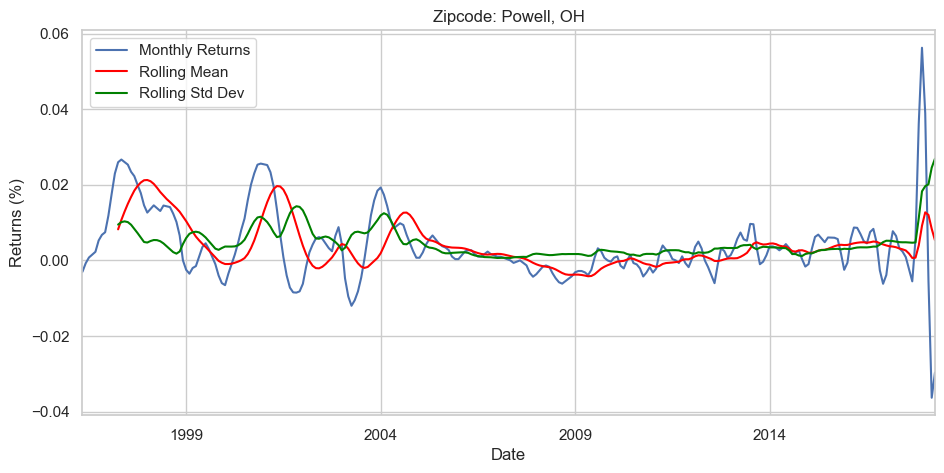

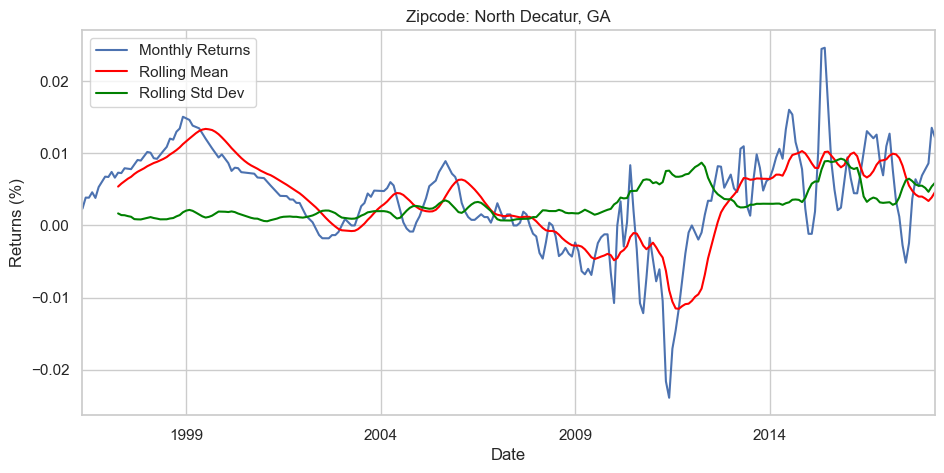

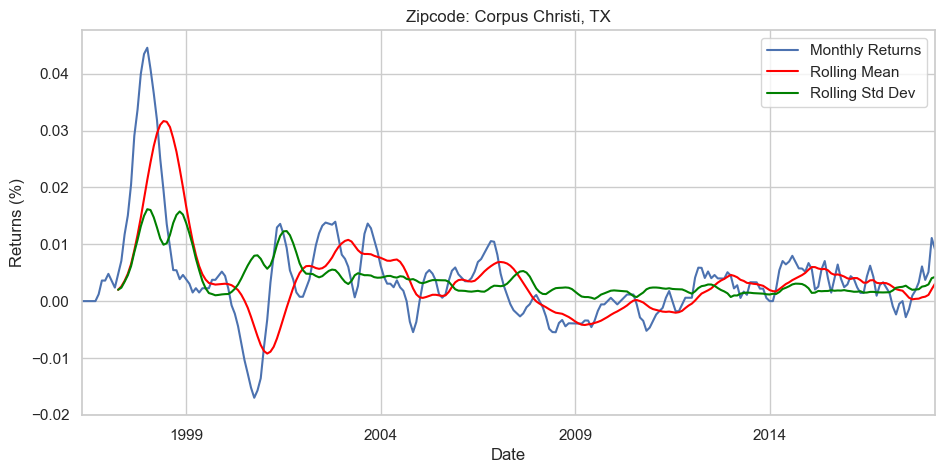

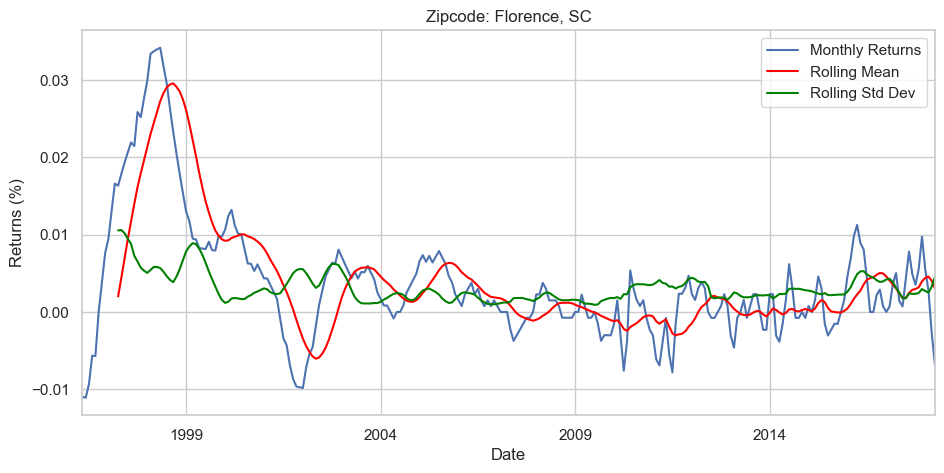

In [99]:
# Plotting the monthly returns along with rolling mean and std for each unique zip code
for zipcode in unique_zipcodes:
    subset = df_melted[df_melted['location'] == zipcode]
    
    # Calculate rolling mean and rolling standard deviation
    rolling_mean = subset['ret'].rolling(window=12).mean()
    rolling_std = subset['ret'].rolling(window=12).std()
    
    plt.figure(figsize=(11,5))
    subset['ret'].plot(color='b', label='Monthly Returns')
    rolling_mean.plot(color='red', label='Rolling Mean')
    rolling_std.plot(color='green', label='Rolling Std Dev')
    
    plt.title(f'Zipcode: {zipcode}')
    plt.xlabel('Date')
    plt.ylabel('Returns (%)')
    plt.legend(loc='best')
    plt.show()

In [100]:
#Determine Stationarity
from statsmodels.tsa.stattools import adfuller

# Extracting unique zip codes
unique_zipcodes = df_melted['ZipCode'].unique()

# Loop through each unique zip code and perform Dickey-Fuller test on their 'ret' values
for zipcode in unique_zipcodes:
    subset = df_melted[df_melted['ZipCode'] == zipcode]
    
    print(f"Results of Dickey-Fuller Test for Zipcode: {zipcode}\n")
    
    dftest = adfuller(subset['ret'].dropna())
    
    # Extract and display test results in a user-friendly manner
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput[f'Critical Value ({key})'] = value
    print(dfoutput)
    print('-' * 50)


Results of Dickey-Fuller Test for Zipcode: 29611

Test Statistic                  -3.472670
p-value                          0.008717
#Lags Used                       9.000000
Number of Observations Used    254.000000
Critical Value (1%)             -3.456360
Critical Value (5%)             -2.872987
Critical Value (10%)            -2.572870
dtype: float64
--------------------------------------------------
Results of Dickey-Fuller Test for Zipcode: 43065

Test Statistic                  -3.620900
p-value                          0.005374
#Lags Used                      10.000000
Number of Observations Used    253.000000
Critical Value (1%)             -3.456464
Critical Value (5%)             -2.873033
Critical Value (10%)            -2.572895
dtype: float64
--------------------------------------------------
Results of Dickey-Fuller Test for Zipcode: 30033

Test Statistic                  -1.851924
p-value                          0.355004
#Lags Used                      14.000000
Numb

In [101]:
for zipcode in unique_zipcodes[:5]:
    subset = df_melted[df_melted['ZipCode'] == zipcode]
    
    try:
        results = adfuller(subset['ret'].dropna(), maxlag=12)  # setting maxlag to 12
        location = subset['location'].iloc[0]  # getting the location value for the current zipcode
        print(f'ADFuller test for zipcode: {zipcode} (Location: {location})')
        
        # Testing the null hypothesis
        if results[1] <= 0.05:
            print(f"p-value: {results[1]}. The series is stationary.")
        else:
            print(f"p-value: {results[1]}. The series is non-stationary.")
    except ValueError as e:
        print(f'Error with zipcode {zipcode}: {e}')
    
    print('-' * 50)

ADFuller test for zipcode: 29611 (Location: Greenville, SC)
p-value: 0.008717365094370986. The series is stationary.
--------------------------------------------------
ADFuller test for zipcode: 43065 (Location: Powell, OH)
p-value: 0.0053738162506615055. The series is stationary.
--------------------------------------------------
ADFuller test for zipcode: 30033 (Location: North Decatur, GA)
p-value: 0.13466540533283494. The series is non-stationary.
--------------------------------------------------
ADFuller test for zipcode: 78414 (Location: Corpus Christi, TX)
p-value: 0.03424621791514006. The series is stationary.
--------------------------------------------------
ADFuller test for zipcode: 29501 (Location: Florence, SC)
p-value: 0.009627314661586096. The series is stationary.
--------------------------------------------------


### 6.2.2 Extracting the 'ret' column & Removal of  seasonality

This step filters and extracts "ret"column and creates subsets of dataset per each zipcode while ensuring all rows with NAN values are dropped.
It also allows us to remove the  influence of seasonality from the non-stationary zipcode 30033. 

In [102]:
# Filtering data for each zipcode and extracting the 'ret' column
df_29611 = df_melted[df_melted['ZipCode'] == 29611]['ret'].dropna()
df_43065 = df_melted[df_melted['ZipCode'] == 43065]['ret'].dropna()
df_30033 = df_melted[df_melted['ZipCode'] == 30033]['ret'].dropna()
df_30033_d = df_30033.diff().dropna()
df_78414 = df_melted[df_melted['ZipCode'] == 78414]['ret'].dropna()
df_29501 = df_melted[df_melted['ZipCode'] == 29501]['ret'].dropna()

df_29611, df_43065, df_30033, df_30033_d, df_78414, df_29501

(time
 1996-05-01    0.003115
 1996-06-01    0.003106
 1996-07-01    0.000000
 1996-08-01    0.000000
 1996-09-01   -0.006192
                 ...   
 2017-12-01    0.025510
 2018-01-01    0.013682
 2018-02-01    0.018405
 2018-03-01    0.034940
 2018-04-01    0.029104
 Name: ret, Length: 264, dtype: float64,
 time
 1996-05-01   -0.003017
 1996-06-01   -0.000756
 1996-07-01    0.000757
 1996-08-01    0.001513
 1996-09-01    0.002266
                 ...   
 2017-12-01    0.056243
 2018-01-01    0.038871
 2018-02-01   -0.005382
 2018-03-01   -0.036331
 2018-04-01   -0.029679
 Name: ret, Length: 264, dtype: float64,
 time
 1996-05-01    0.002324
 1996-06-01    0.003864
 1996-07-01    0.003849
 1996-08-01    0.004601
 1996-09-01    0.003817
                 ...   
 2017-12-01    0.006930
 2018-01-01    0.007780
 2018-02-01    0.008610
 2018-03-01    0.013541
 2018-04-01    0.012199
 Name: ret, Length: 264, dtype: float64,
 time
 1996-06-01    0.001540
 1996-07-01   -0.000015
 1996-08-01  

### 6.2.3 Splitting data into Train &  Test  datasets

The  extracted data is then subdivided into train and test datasets per each zipcode with a test size of 0.2 <br> This means the Training set will be equal to 80% of the available data for modelling.<br>

The data is split preserving the temporal nature of the data because in time series data, there are dependancies between consecutive observations. <br>
In our case, the training data starts from 1996-04 and ends in 2013-04 while the test data uses the rest of the data.<br>

- train_29611 contains 204 rows while test_29611 contains 61rows. 
- train_43065 has 204 rows and test_43065 has 61 rows.
- train_30033_d contains 203 rows while, test_30033_d has 61 rows.
- train_78414 has 204 rows while, test_78414 contains 61 rows.
- train_29501 contains 204 rows while, test_29501 has 61 rows.

We have 203 rows in train_30033_d because of the diferencing in the previous step. 

The data will be utilised as follows:<br>
**Model Training**: The training set is used to train the time series model. The model learns patterns, relationships, and features from this data to make predictions or classifications.

**Model Evaluation**: The testing (or validation) set is used to evaluate the model's performance. Since the model has never seen this data during training, its performance on the testing set provides a more realistic measure of how well the model will generalize to new, unseen data.

**Preventing Overfitting**: Overfitting occurs when a model learns the training data too well and captures noise and fluctuations instead of true patterns. A separate testing set helps in assessing if the model is overfitting by evaluating its performance on unseen data.

**Hyperparameter Tuning**: The testing set is also used for tuning hyperparameters (parameters that are set before training) to improve the model's performance.

In [103]:
# Splitting each zipcode dataset into training and testing sets based on the specified time range using a different approach

# Function to split data based on the date range
def split_data_by_date_v2(data, end_date='2013-04'):
    return data.loc[:end_date], data.loc[end_date:]

train_29611, test_29611 = split_data_by_date_v2(df_29611)
train_43065, test_43065 = split_data_by_date_v2(df_43065)
train_30033_d, test_30033_d = split_data_by_date_v2(df_30033_d)
train_78414, test_78414 = split_data_by_date_v2(df_78414)
train_29501, test_29501 = split_data_by_date_v2(df_29501)

train_29611.shape, test_29611.shape, train_43065.shape, test_43065.shape,train_30033_d.shape, test_30033_d.shape, train_78414.shape, test_78414.shape, train_29501.shape, test_29501.shape

((204,), (61,), (204,), (61,), (203,), (61,), (204,), (61,), (204,), (61,))

In [104]:
# Capturing all the training datasets in a dictionary
training_datasets = {
    '29611': train_29611,
    '43065': train_43065,
    '30033_d': train_30033_d,
    '78414': train_78414,
    '29501': train_29501
}

training_datasets.keys()  # Display the keys (zipcodes) of the dictionary

dict_keys(['29611', '43065', '30033_d', '78414', '29501'])

In [105]:
# Capturing all the testing datasets in a dictionary
testing_datasets = {
    '29611': test_29611,
    '43065': test_43065,
    '30033_d': test_30033_d,
    '78414': test_78414,
    '29501': test_29501
}

testing_datasets.keys()  # Display the keys (zipcodes) of the dictionary

dict_keys(['29611', '43065', '30033_d', '78414', '29501'])

### 6.2.4 ACF & PACF plots per Zipcode 

Through plotting the ACF and PACF plots, we identify potential patterns, trends, and the order of autoregressive (AR) and moving average (MA) components in our time series data.<br>
The figures we get from this plots can be utilised in the order parameter of our **ARIMA model**. <br>
**ACF** measures the correlation between a time series and its lagged values.<br> It shows how each observation in the series is correlated with its previous observations at various lags.<br>

- If the ACF plot shows a sharp drop after a certain lag, it indicates that the values beyond that lag are not significantly correlated with the current value. <br>
- If the ACF plot shows a slow decay, it suggests a high degree of autocorrelation and indicates the presence of a possible autoregressive (AR) component.<br>

**PACF** measures the correlation between a time series and its lagged values after removing the effects of intervening lags.<br> It gives the direct relationship between an observation and its lagged values without the influence of the intermediate observations.<br>

- If the PACF plot shows a sharp drop after a certain lag, it indicates that there is no significant correlation beyond that lag.<br> 
- If the PACF plot shows a slow decay, it suggests a high degree of partial autocorrelation and indicates the presence of a possible moving average (MA) component.<br>

**Interpreting ACF & PACF plots**:

To determine the order of the AR component **p**, we look at where the PACF plot cuts off (lags with significant correlation) after a sharp drop before entering inside the shaded area
To determine the order of the MA component **q**, we look at where the ACF plot cuts off (lags with significant correlation) after a sharp drop before entering inside the shaded area.

The **q** and **p** of Zipcode 29611 is 3 and 3 respectively.
The **q** and **p** of Zipcode 30033_d is 1 and 1 respectively just to mention a few.

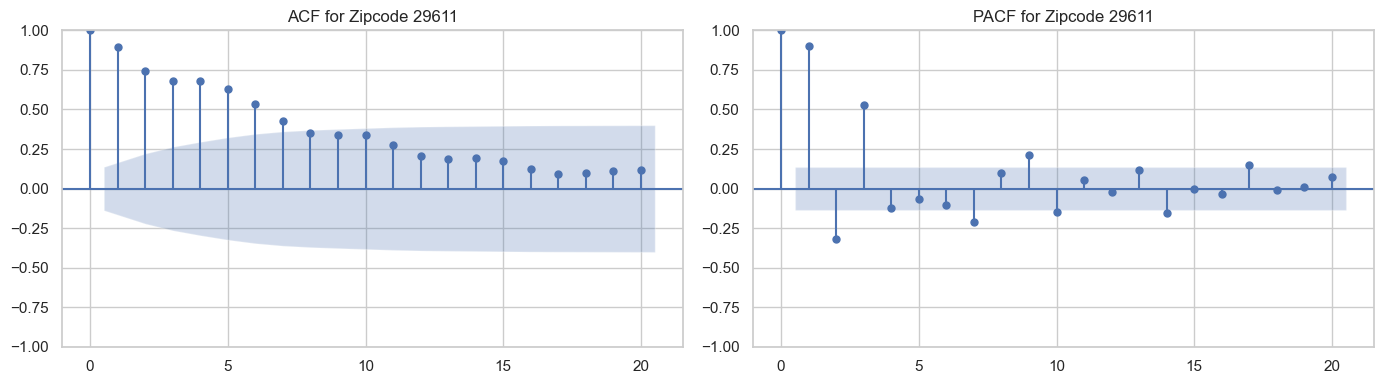

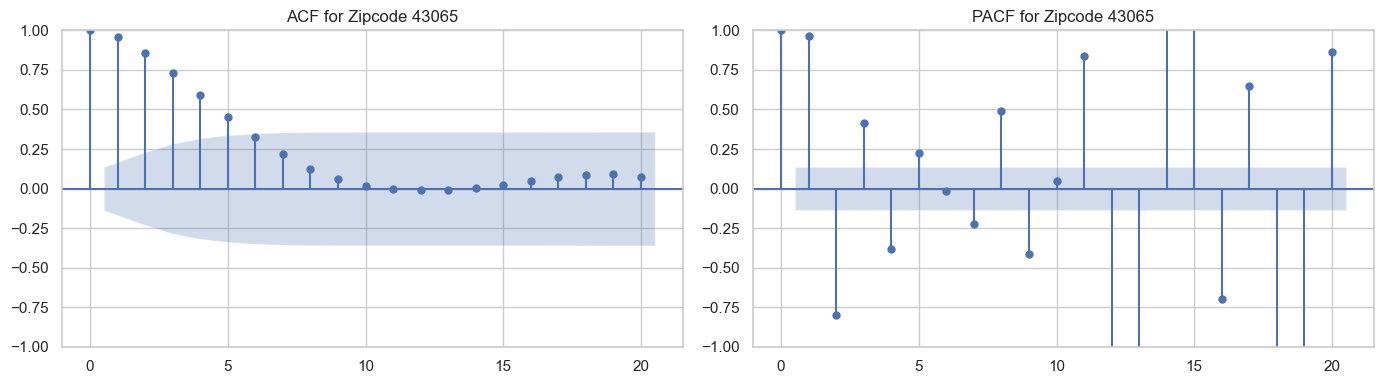

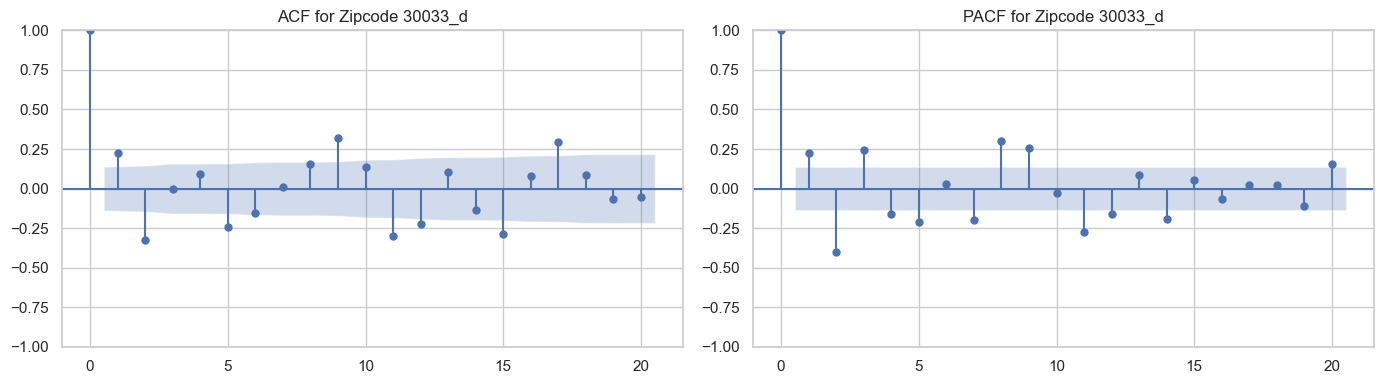

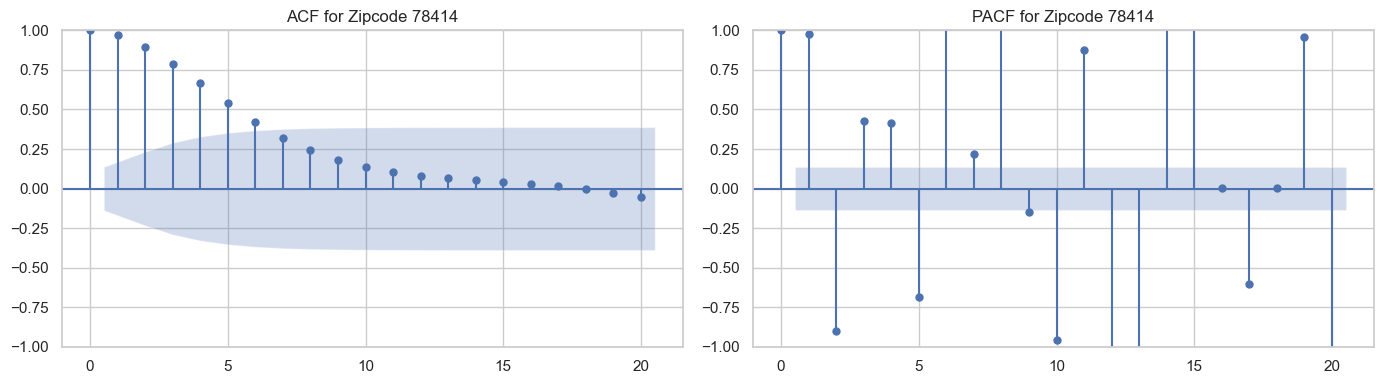

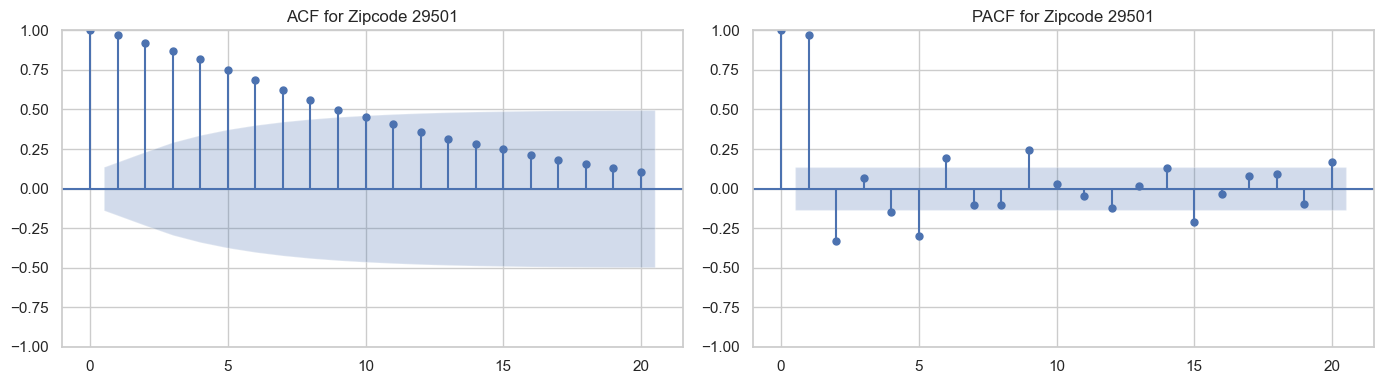

In [106]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Loop through each dataset in the training_datasets dictionary and plot ACF and PACF with adjusted lags
for label, data in training_datasets.items():
    fig, ax = plt.subplots(1, 2, figsize=(14, 4))
    
    max_lags_acf = min(20, len(data)-1)  # Adjust lags for ACF based on data length
    max_lags_pacf = min(max_lags_acf, len(data)//2 - 1)  # Adjust lags for PACF
    
    # Plot ACF
    plot_acf(data, ax=ax[0], lags=max_lags_acf)
    ax[0].set_title(f'ACF for Zipcode {label}')
    
    # Plot PACF
    if max_lags_pacf > 0:  # Ensure we have at least one lag for PACF
        plot_pacf(data, ax=ax[1], lags=max_lags_pacf)
        ax[1].set_title(f'PACF for Zipcode {label}')
    else:
        ax[1].set_title(f'PACF for Zipcode {label} (Not enough data for PACF)')
    
    plt.tight_layout()
    plt.show()

### 6.3 Model 1: Baseline ARIMA Model

![Alt Text](https://www.projectguru.in/wp-content/uploads/2020/09/1-1.jpg)

### 6.3.1 Baseline ARIMA Model Evaluation on Training data

As part of our starting point we create an **Arima baseline model** with the below order Parameters (**p, d, q**) for each of our Zip codes.

    - '29611': (7, 0, 2),
    - '43065': (5, 0, 2),
    - '30033_d': (1, 1, 2),
    - '78414': (6, 0, 2),
    - '29501': (9, 0, 1)

The Model is fitted to the training data with the retrieved parameters per each Zip code. 
A forecast is generated for the entire duration of the training data.
We conclude this step by calculating the Mean squared Error between the training data and the forecast.

We utilise this baseline model to benchmark and get an intial understanding of our data before deep diving further into a more complex model. 



In [107]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

Processing ARIMA for Zipcode: 29611
----------------------------------------
Using parameters for Zipcode 29611: (7, 0, 2)
Mean Squared Error for Zipcode 29611: 0.00000949



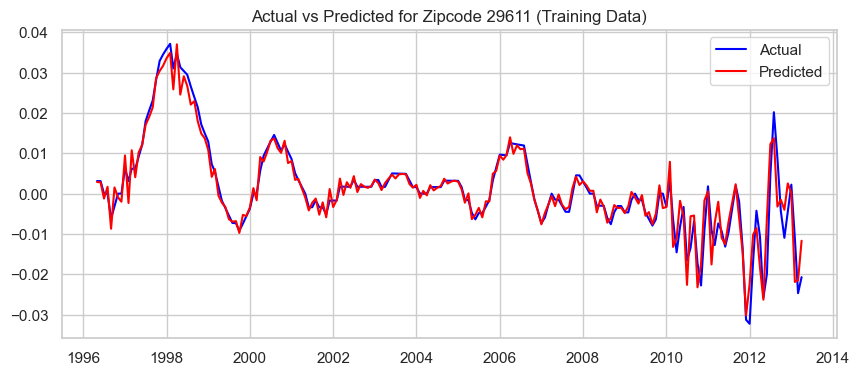




Processing ARIMA for Zipcode: 43065
----------------------------------------
Using parameters for Zipcode 43065: (5, 0, 2)
Mean Squared Error for Zipcode 43065: 0.00000353



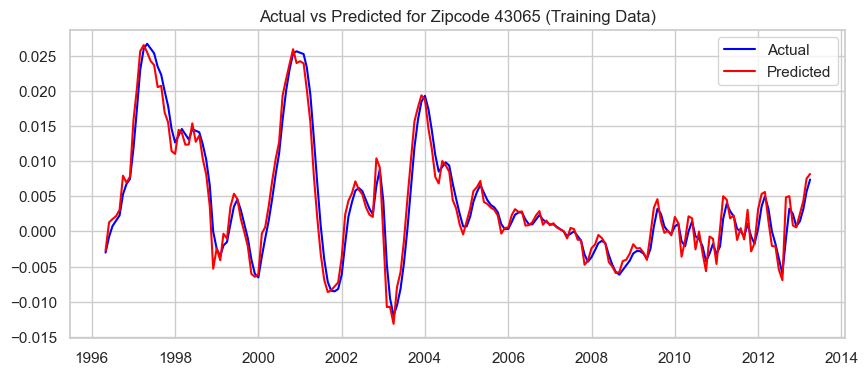




Processing ARIMA for Zipcode: 30033_d
----------------------------------------
Using parameters for Zipcode 30033_d: (1, 1, 2)
Mean Squared Error for Zipcode 30033_d: 0.00000195



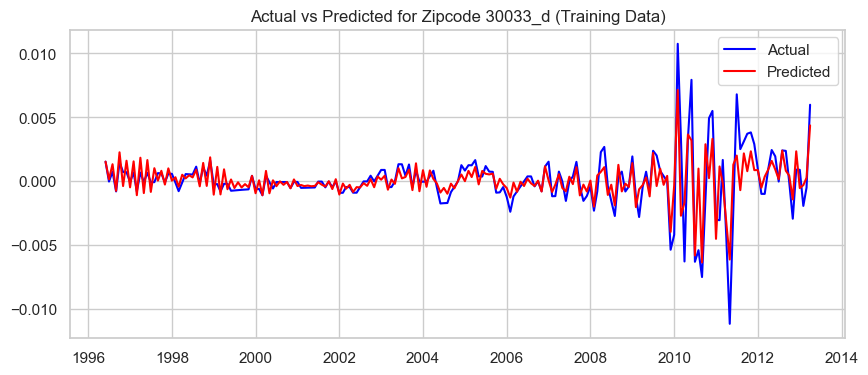




Processing ARIMA for Zipcode: 78414
----------------------------------------
Using parameters for Zipcode 78414: (6, 0, 2)
Mean Squared Error for Zipcode 78414: 0.00000315



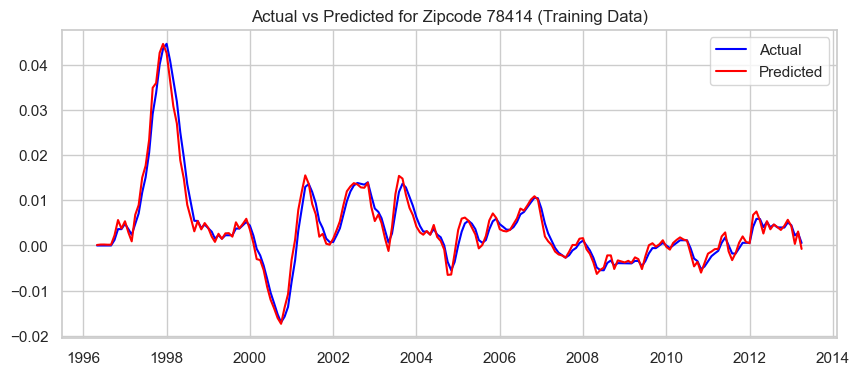




Processing ARIMA for Zipcode: 29501
----------------------------------------
Using parameters for Zipcode 29501: (9, 0, 1)
Mean Squared Error for Zipcode 29501: 0.00000101



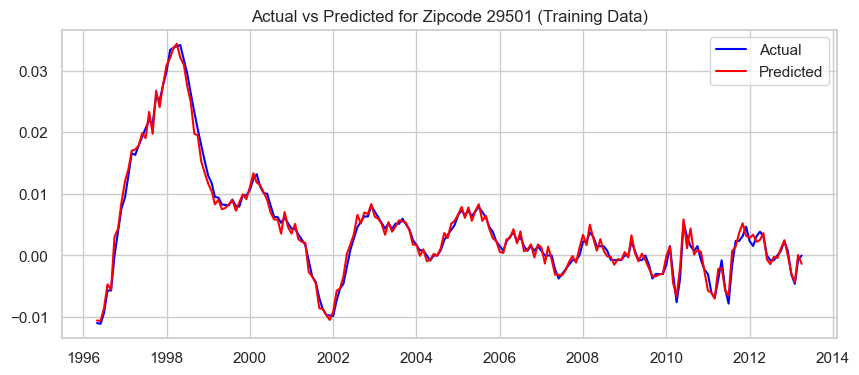




Mean Squared Errors:
{'29611': 9.494060252740786e-06, '43065': 3.525550148406829e-06, '30033_d': 1.9542378091584728e-06, '78414': 3.1524191729538567e-06, '29501': 1.014507512938603e-06}


In [108]:
# Define the dictionary of parameters for each zipcode
zipcode_params = {
    '29611': (7, 0, 2),
    '43065': (5, 0, 2),
    '30033_d': (1, 1, 2),
    '78414': (6, 0, 2),
    '29501': (9, 0, 1)
}
# Create dictionaries to store training predictions and MSE for the training data
training_predictions = {}
training_mse = {}
# Loop through each zipcode's training dataset
for label, train_data in training_datasets.items():
    print(f"Processing ARIMA for Zipcode: {label}\n{'-'*40}")
    if label not in zipcode_params:
        print(f"No parameters found for Zipcode {label}\n")
        continue
    best_params = zipcode_params[label]
    print(f"Using parameters for Zipcode {label}: {best_params}")
    try:
        # Fit ARIMA model to the training data with the specific parameters
        model = ARIMA(train_data, order=best_params)
        baseline_model = model.fit()
        # Forecast the entire duration of the training data
        forecast = baseline_model.predict(start=1, end=len(train_data), typ='levels')
        # Calculate the MSE for the training data
        mse = mean_squared_error(train_data, forecast)
        print(f"Mean Squared Error for Zipcode {label}: {mse:.8f}\n")
        # Store the forecasted data and MSE for the training dataset
        training_predictions[label] = forecast
        training_mse[label] = mse
        # Plot the actual vs. forecasted data for the training dataset
        plt.figure(figsize=(10, 4))
        plt.plot(train_data.index, train_data, label='Actual', color='blue')
        plt.plot(train_data.index, forecast, label='Predicted', color='red')
        plt.title(f"Actual vs Predicted for Zipcode {label} (Training Data)")
        plt.legend()
        plt.show()
        print("\n\n")
    except:
        print(f"Error processing Zipcode {label}\n")
# Display the best MSE for each zipcode's training data
print("Mean Squared Errors:")
print(training_mse)

### Results of Baseline ARIMA Model on Training data<br>

Our Arima baseline model provides the below **mean Squared Errors** per each Zipcode: 
{'29611': 9.494060192659257e-06, '43065': 3.5255501484068144e-06, '30033_d': 1.954237809234515e-06, '78414': 3.152419172953834e-06, '29501': 1.01450751294852e-06}

It's important to highlight that the model's predictions align closely with the actual values, indicating a **strong predictive performance**.<br> This is evident across all five zip codes, where the **mean squared error** is **exceptionally low**, measured in the order of negative six exponent. 

This alignment between predictions and actual data is visually evident in the line graphs we've plotted. <br> In these graphs, the lines representing the actual and predicted values are virtually overlapping, demonstrating their proximity.

### 6.3.2 Baseline ARIMA Model Evaluation on Test data

In order to understand the predictive performance of our Arima Models on unseen data, we introduce our test datasets. <br>
We repeat the process we did on our training datasets. We generate forecasts, calculate MSE, and visually compares the forecasted and actual values for each zip code's test data. <br>



Performing Evaluation for Zipcode: 29611
----------------------------------------
Mean Squared Error for Zipcode 29611: 0.00034087



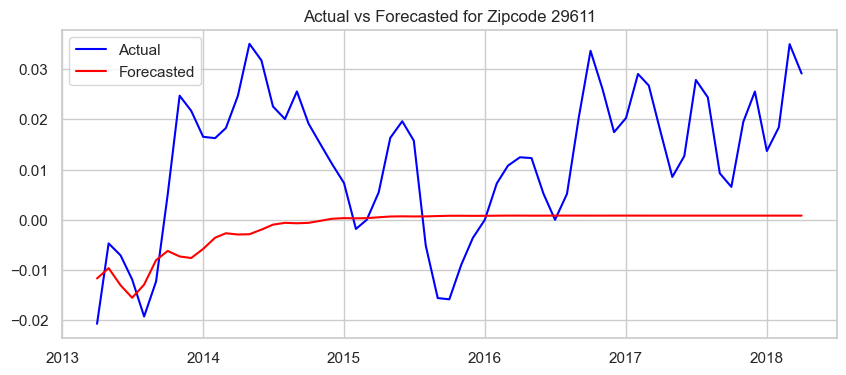




Performing Evaluation for Zipcode: 43065
----------------------------------------
Mean Squared Error for Zipcode 43065: 0.00014105



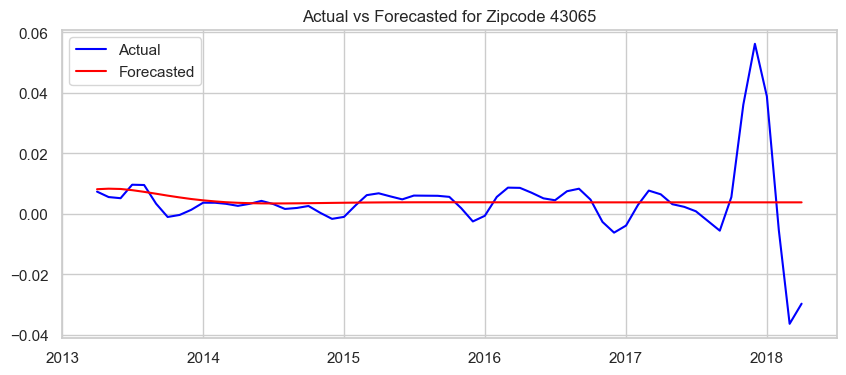




Performing Evaluation for Zipcode: 30033_d
----------------------------------------
Mean Squared Error for Zipcode 30033_d: 0.00001604



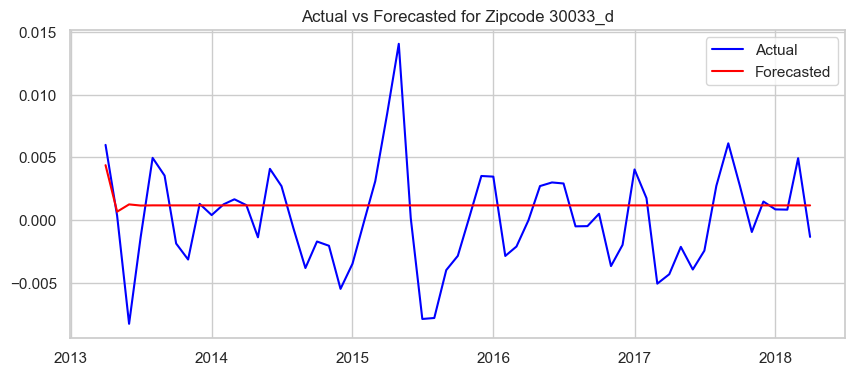




Performing Evaluation for Zipcode: 78414
----------------------------------------
Mean Squared Error for Zipcode 78414: 0.00000894



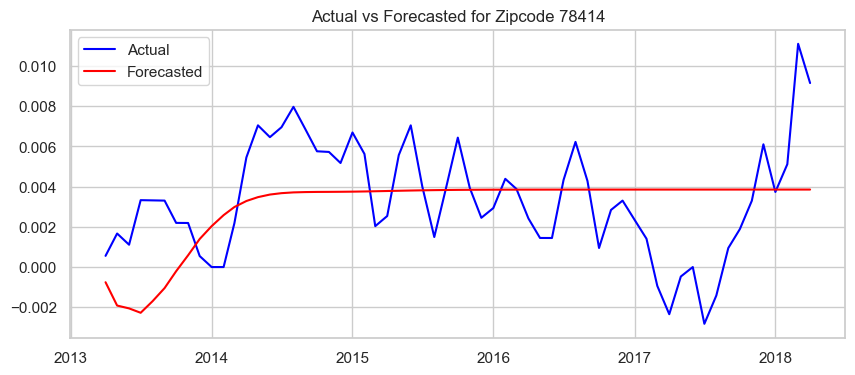




Performing Evaluation for Zipcode: 29501
----------------------------------------
Mean Squared Error for Zipcode 29501: 0.00001239



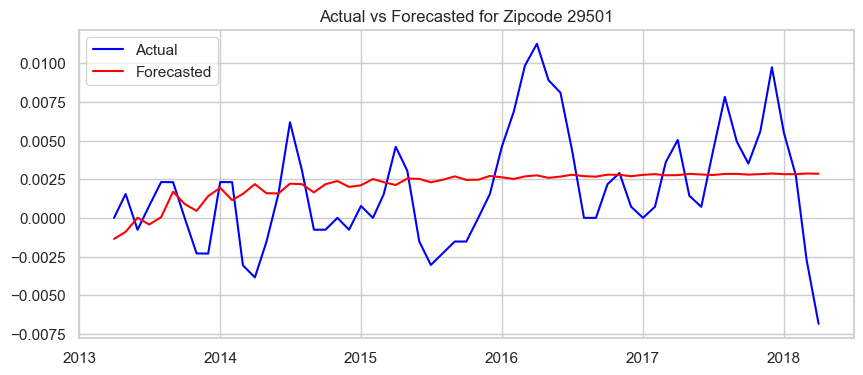

{'29611': 0.00034086871583861774,
 '43065': 0.0001410528629283197,
 '30033_d': 1.6042136252641646e-05,
 '78414': 8.944778977683574e-06,
 '29501': 1.2385984314109816e-05}

In [109]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Create dictionaries to store evaluation results and evaluation plots
evaluation_forecasts = {}
evaluation_mse = {}

# Loop through each zipcode's test dataset
for label, test_data in testing_datasets.items():
    print(f"Performing Evaluation for Zipcode: {label}\n{'-'*40}")
    
    # Extract the training data for the current zipcode
    train_data = training_datasets[label]
    
    # Get the ARIMA order for the current zipcode from the dictionary
    order = zipcode_params.get(label, (1, 1, 1))  # default to (1,1,1) if not found
    
    # Instantiate and fit ARIMA model using the provided parameters to the training data
    model = ARIMA(train_data, order=order)
    model_fit = model.fit()
    
    # Predict on the test data
    start_index = len(train_data)
    end_index = start_index + len(test_data) - 1
    forecast = model_fit.predict(start=start_index, end=end_index, typ='levels')
    
    # Store the forecasted data
    evaluation_forecasts[label] = forecast
    
    # Calculate and store the MSE
    mse = mean_squared_error(test_data, forecast)
    evaluation_mse[label] = mse
    print(f"Mean Squared Error for Zipcode {label}: {mse:.8f}\n")
    
    # Plot the actual vs. forecasted data
    plt.figure(figsize=(10, 4))
    plt.plot(test_data.index, test_data, label='Actual', color='blue')
    plt.plot(test_data.index, forecast, label='Forecasted', color='red')
    plt.title(f"Actual vs Forecasted for Zipcode {label}")
    plt.legend()
    plt.show()
    print("\n\n")

evaluation_mse  # Displaying the evaluation MSE for each zipcode

### Results of Baseline ARIMA Model on Test Data<br>

The **MSE for the test data** per Zipcode are as follows {'29611': 0.00034086869776976534, '43065': 0.00014105286292831983, '30033_d': 1.6042136252641222e-05, '78414': 8.44778977683447e-06, '29501': 1.2385984312966755e-05}<br>
The MSE's are also quite small and thus the models are considered as having a good predictive performance<br>

The Mean Squared Error (MSE) values for the test datasets suggest that the ARIMA models are performing well on the unseen test data for each zip code. <br> 

However, across all zipcodes, the baseline models' **train MSE values** are significantly **lower** than their corresponding **test MSE values**. <br>This suggests that the baseline models show signs of **potentially overfitting**, as they perform notably better on the training data compared to the test data.

### 6.4 Model Tuning (Finding the best Params p,d,q)

We utilise the 'auto_arima' function from pmdarina library to automatically determine the optimal parameters for our Arima models for each training dataset.
The auto_arima selects the best combination of ARIMA hyperparameters based on our configuration and the fed training data. 
This process avoids us from manually tunning the  hyperparameters.

In [110]:
import pmdarima as pm

#### Identification of Best Params

In [111]:
# List of training datasets and their labels (zipcodes)
training_data_list = [train_29611, train_43065, train_30033_d, train_78414, train_29501]
zipcodes = ["29611", "43065", "30033_d", "78414", "29501"]

# Store the models for future reference
auto_models = {}

# Loop through each training dataset and apply auto_arima
for data, zipcode in zip(training_data_list, zipcodes):
    print(f"Processing for Zipcode: {zipcode}")
    auto_model = pm.auto_arima(data, start_p=0, start_q=0,
                               test='adf',
                               max_p=5, max_q=5,
                               m=1,
                               d=0,
                               seasonal=True,
                               start_P=0, start_Q=0,
                               D=0,
                               trace=True,
                               error_action='ignore',
                               suppress_warnings=True,
                               stepwise=True, with_intercept=False)
    
    # Save the model to our dictionary
    auto_models[zipcode] = auto_model
    
    print("-" * 50)  # separator for clarity
auto_models  # Return the dictionary of models for potential future use

Processing for Zipcode: 29611
Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-1243.616, Time=0.14 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-1589.585, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-1467.287, Time=0.08 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-1607.236, Time=0.04 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=-1662.831, Time=0.11 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=-1663.284, Time=0.06 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=-1662.235, Time=0.07 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=-1659.670, Time=0.28 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=-1661.533, Time=0.20 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=-1659.018, Time=0.23 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=-1661.305, Time=0.16 sec

Best model:  ARIMA(4,0,0)(0,0,0)[0]          
Total fit time: 1.406 seconds
--------------------------------------------------
Processing for Zipcode: 43065
Performing stepwise search to mi

{'29611': ARIMA(order=(4, 0, 0), scoring_args={}, suppress_warnings=True,
       with_intercept=False),
 '43065': ARIMA(order=(4, 0, 0), scoring_args={}, suppress_warnings=True),
 '30033_d': ARIMA(order=(2, 0, 2), scoring_args={}, suppress_warnings=True),
 '78414': ARIMA(order=(2, 0, 0), scoring_args={}, suppress_warnings=True),
 '29501': ARIMA(order=(1, 0, 1), scoring_args={}, suppress_warnings=True,
       with_intercept=False)}

In [112]:
# Dictionary to store the best parameters for each zipcode
best_parameters = {}

# Loop through the auto_models dictionary to retrieve the best parameters
for zipcode, model in auto_models.items():
    best_parameters[zipcode] = model.order

best_parameters


{'29611': (4, 0, 0),
 '43065': (4, 0, 0),
 '30033_d': (2, 0, 2),
 '78414': (2, 0, 0),
 '29501': (1, 0, 1)}

The **best parameters** for each zipcode are **{'29611': (4, 0, 0), '43065': (4, 0, 0), '30033_d': (2, 0, 2), '78414': (2, 0, 0), '29501': (1, 0, 1)}**. We will utilise this to improve our model.

### 6.5 Model 2 : Tuned ARIMA Model<br>
### 6.5.1 Tuned ARIMA Model on Training Dataset

In this models we utilize the best parameters provided by the auto-arima function on the training set. 

Processing ARIMA for Zipcode: 29611
----------------------------------------


                               SARIMAX Results                                
Dep. Variable:                    ret   No. Observations:                  204
Model:                 ARIMA(4, 0, 0)   Log Likelihood                 836.650
Date:                Tue, 29 Aug 2023   AIC                          -1661.299
Time:                        21:19:07   BIC                          -1641.391
Sample:                    05-01-1996   HQIC                         -1653.246
                         - 04-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.004      0.087      0.930      -0.008       0.009
ar.L1          1.4001      0.054     25.929      0.000       1.294       1.506
ar.L2         -1.0137      0.078    -12.918      0.0

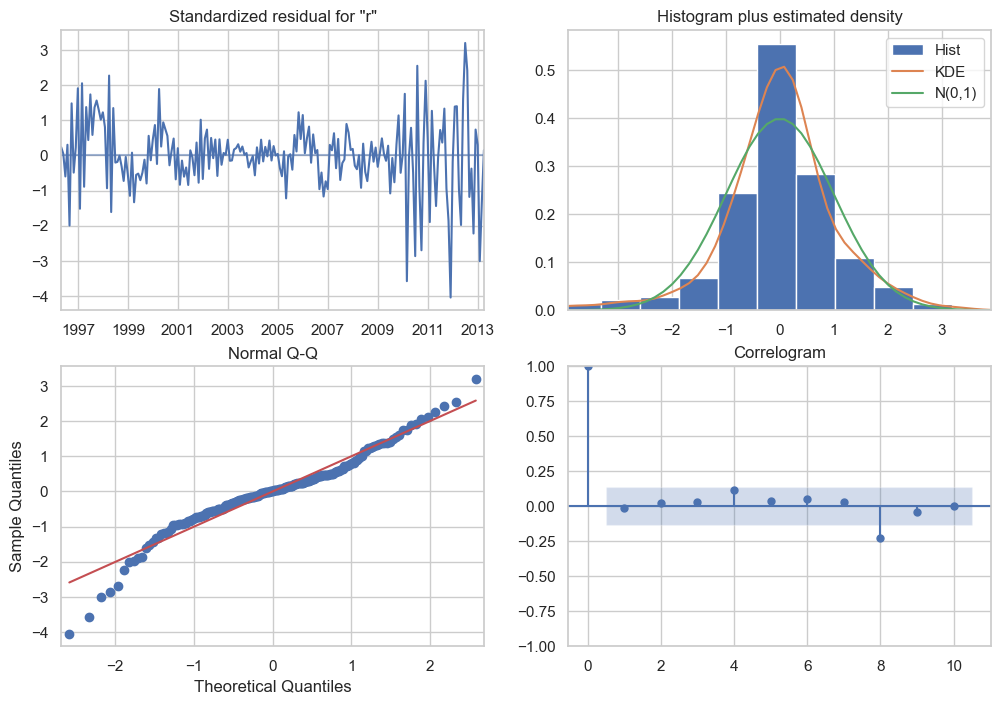

Mean Squared Error for Zipcode 29611: 0.00



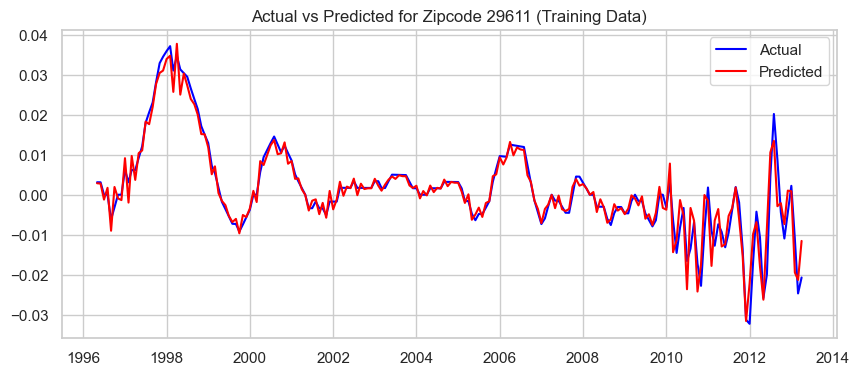




Processing ARIMA for Zipcode: 43065
----------------------------------------
                               SARIMAX Results                                
Dep. Variable:                    ret   No. Observations:                  204
Model:                 ARIMA(4, 0, 0)   Log Likelihood                1041.793
Date:                Tue, 29 Aug 2023   AIC                          -2071.586
Time:                        21:19:08   BIC                          -2051.677
Sample:                    05-01-1996   HQIC                         -2063.532
                         - 04-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0038      0.002      2.257      0.024       0.001       0.007
ar.L1          1.9372      0.056     34.445      0.

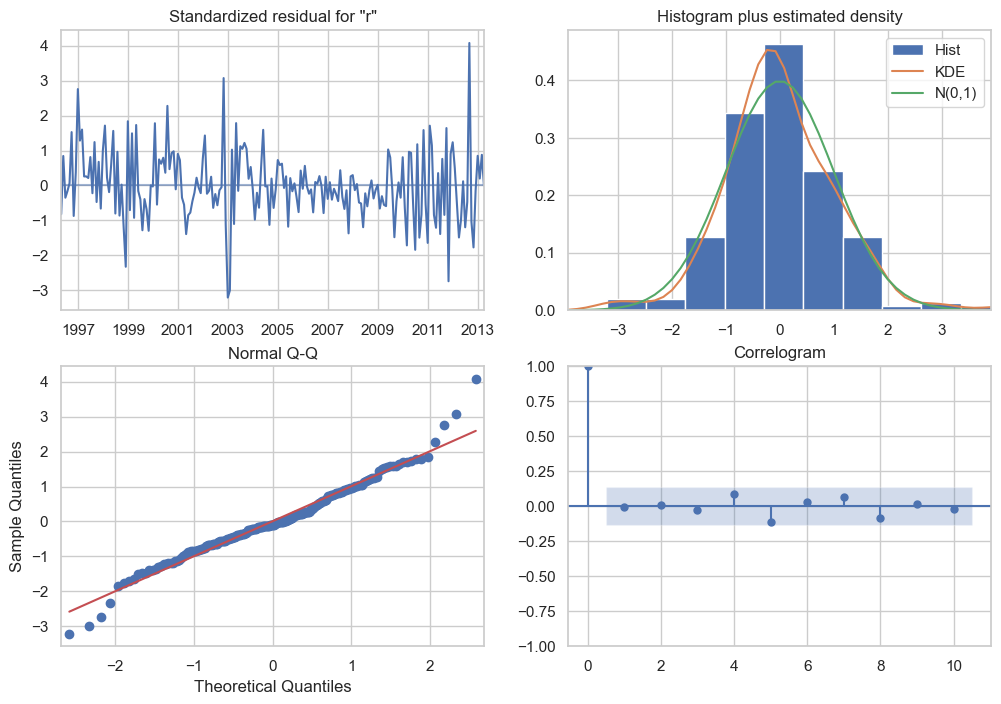

Mean Squared Error for Zipcode 43065: 0.00



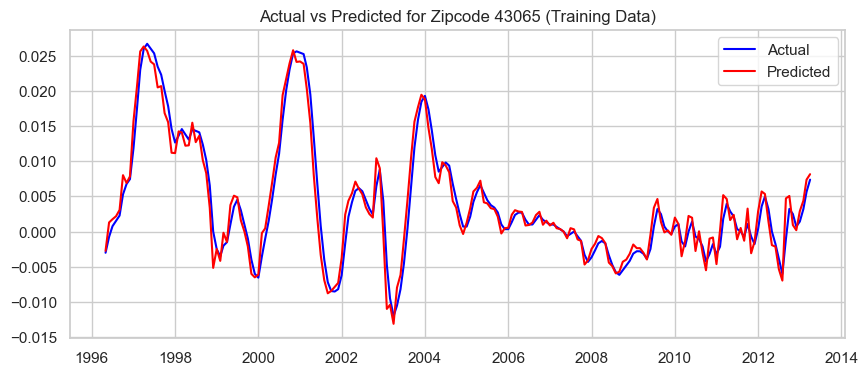




Processing ARIMA for Zipcode: 30033_d
----------------------------------------
                               SARIMAX Results                                
Dep. Variable:                    ret   No. Observations:                  203
Model:                 ARIMA(2, 0, 2)   Log Likelihood                 993.195
Date:                Tue, 29 Aug 2023   AIC                          -1974.390
Time:                        21:19:09   BIC                          -1954.510
Sample:                    06-01-1996   HQIC                         -1966.347
                         - 04-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.086e-05      0.000      0.245      0.806      -0.000       0.000
ar.L1         -0.3539      0.099     -3.559      

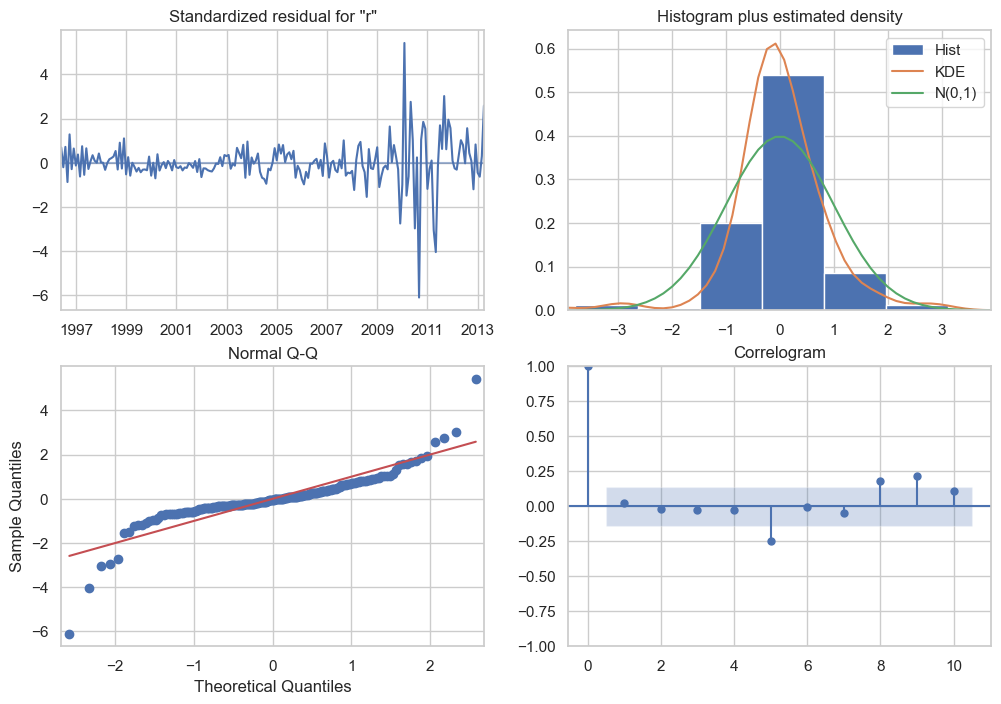

Mean Squared Error for Zipcode 30033_d: 0.00



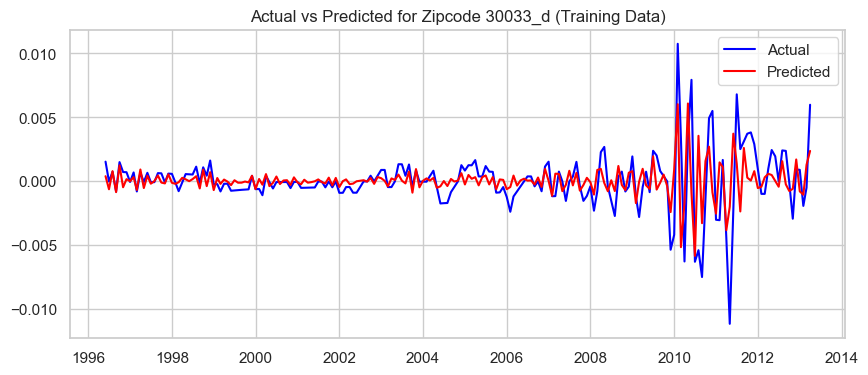




Processing ARIMA for Zipcode: 78414
----------------------------------------
                               SARIMAX Results                                
Dep. Variable:                    ret   No. Observations:                  204
Model:                 ARIMA(2, 0, 0)   Log Likelihood                1052.118
Date:                Tue, 29 Aug 2023   AIC                          -2096.236
Time:                        21:19:10   BIC                          -2082.964
Sample:                    05-01-1996   HQIC                         -2090.867
                         - 04-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0039      0.002      1.934      0.053   -5.07e-05       0.008
ar.L1          1.7313      0.038     44.988      0.

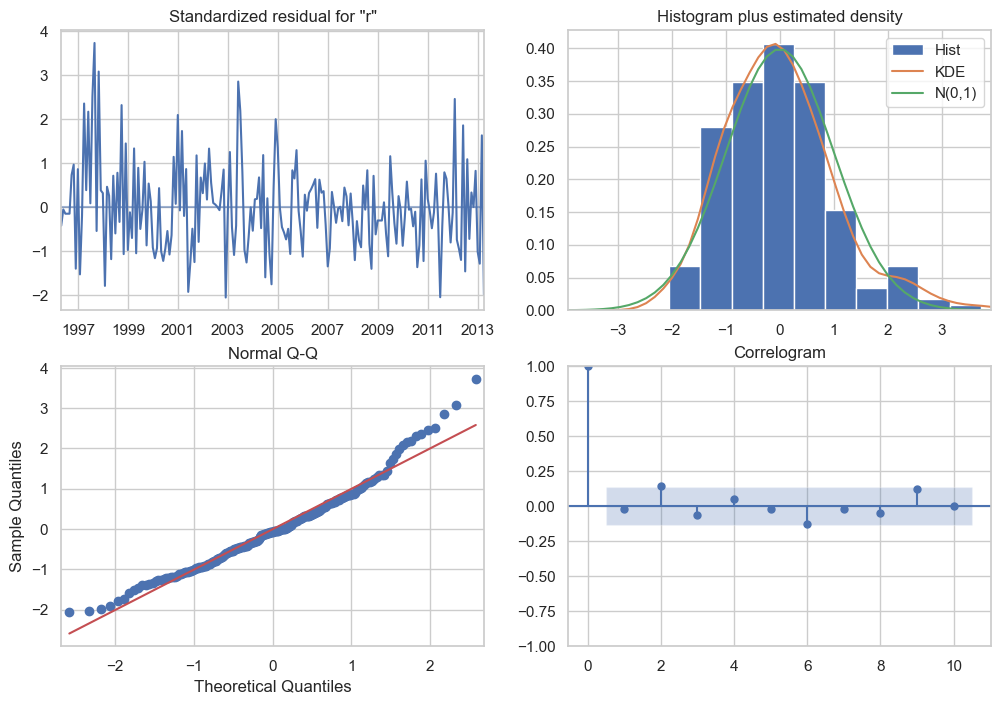

Mean Squared Error for Zipcode 78414: 0.00



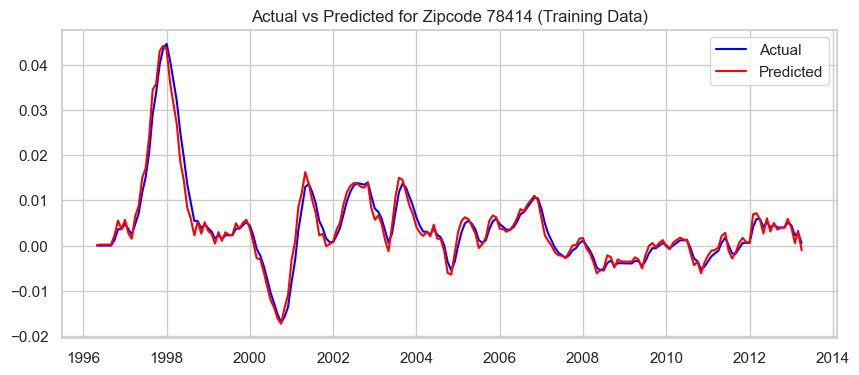




Processing ARIMA for Zipcode: 29501
----------------------------------------
                               SARIMAX Results                                
Dep. Variable:                    ret   No. Observations:                  204
Model:                 ARIMA(1, 0, 1)   Log Likelihood                1001.857
Date:                Tue, 29 Aug 2023   AIC                          -1995.714
Time:                        21:19:11   BIC                          -1982.441
Sample:                    05-01-1996   HQIC                         -1990.345
                         - 04-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0043      0.003      1.410      0.158      -0.002       0.010
ar.L1          0.9539      0.016     59.421      0.

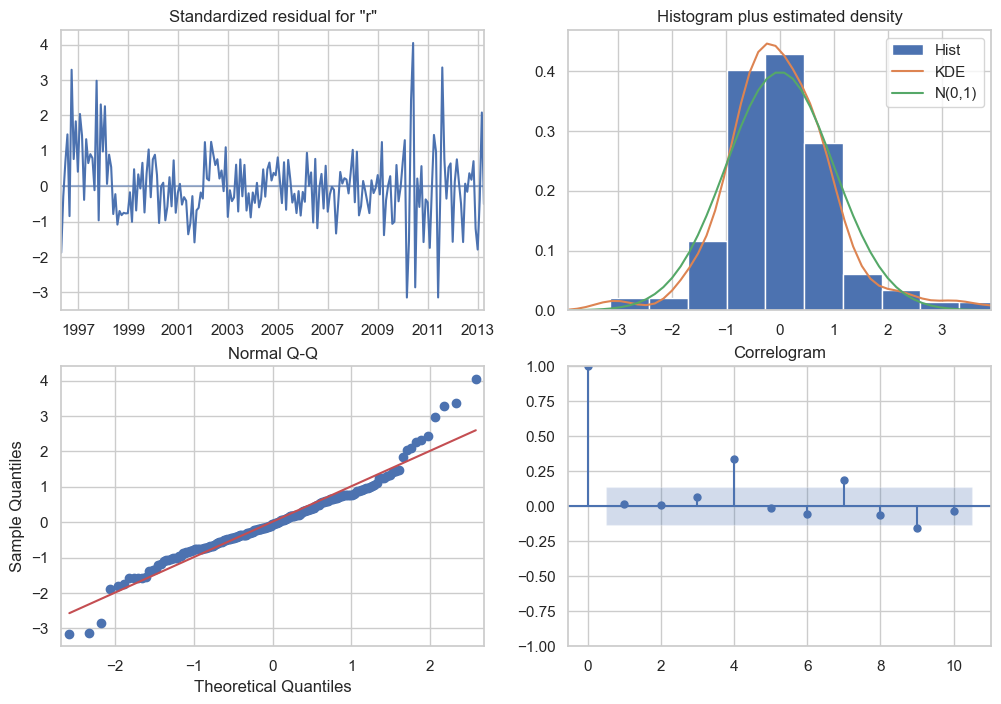

Mean Squared Error for Zipcode 29501: 0.00



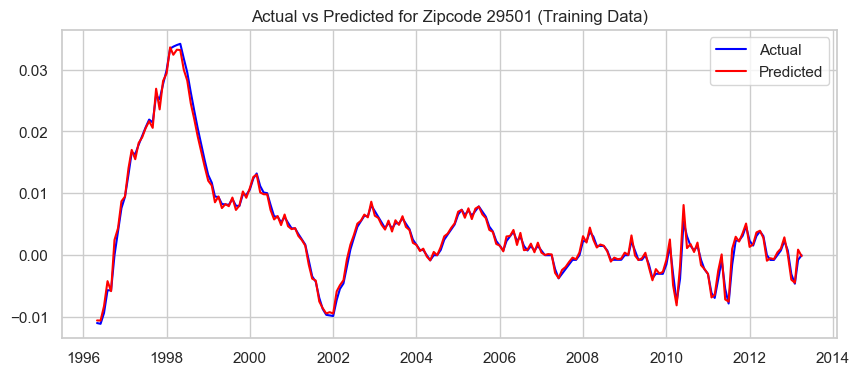

{'29611': 9.071103799535217e-06,
 '43065': 3.545522135175567e-06,
 '30033_d': 3.764647829945985e-06,
 '78414': 3.0824149706533074e-06,
 '29501': 5.172572117800192e-07}

In [113]:
# Dictionary to store training predictions and MSE for the training data
training_predictions_adjusted = {}
training_mse_adjusted = {}

# Loop through each zipcode's training dataset
for label, train_data in training_datasets.items():
    print(f"Processing ARIMA for Zipcode: {label}\n{'-'*40}")
    
    # Fetch the best ARIMA order for the current zipcode
    best_order = best_parameters[label]
    
    # Fit ARIMA model using the best order to the training data
    model = ARIMA(train_data, order=best_order)
    tuned_model = model.fit()
    
    # Print Model Summary
    print(tuned_model.summary())
    
    # Display diagnostic plots
    tuned_model.plot_diagnostics(figsize=(12, 8))
    plt.show()
    
    # Forecast the entire duration of the training data
    forecast = tuned_model.predict(start=1, end=len(train_data), typ='levels')
    
    # Store the forecasted data for the training dataset
    training_predictions_adjusted[label] = forecast
    
    # Calculate and store the MSE for the training data
    mse = mean_squared_error(train_data, forecast)
    training_mse_adjusted[label] = mse
    print(f"Mean Squared Error for Zipcode {label}: {mse:.2f}\n")
    
    # Plot the actual vs. forecasted data for the training dataset
    plt.figure(figsize=(10, 4))
    plt.plot(train_data.index, train_data, label='Actual', color='blue')
    plt.plot(train_data.index, forecast, label='Predicted', color='red')
    plt.title(f"Actual vs Predicted for Zipcode {label} (Training Data)")
    plt.legend()
    plt.show()
    print("\n\n")

training_mse_adjusted  # Displaying the MSE for each zipcode's training data

### Summary of Tuned ARIMA Model on Training Dataset
A summary statistics has been provided for each tuned Zipcode model 

**Sarimax Results**: 
* **Zipcode 29611** , the pvalue for the constant and coefficient  ar.L4  are above the 0.05 mark meaning they not statistically significant . This suggests that the constant term and ar,L4 might not be making a meaningful contribution to explaining the variation in the data, and it might be okay to consider removing it from the model.<br>

* **Zipcode: 43065**: Both the constant and coefficients in this model exhibit significance below the 0.05 threshold, indicating their capability to account for the data's variability. The model was optimized using a parameter combination of (4, 0, 0). Notably, the model's low AIC and BIC values reflect a balanced trade-off between a well-fitting model and its complexity.<br>

* **Zipcode: 30033_d**: The constant term in this model has a p-value exceeding the significance level of 0.05, measuring at 0.806. Consequently, it is deemed as lacking statistical significance. However, the remaining autoregressive coefficients in this model exhibit strong statistical significance, each registering a p-value of 0.00. The model's best parameter configuration utilized was (2, 0, 2).<br>

* **Zipcode: 78414**: Within this model, the p-value associated with the constant term slightly exceeds the 0.05 significance level, measuring at 0.053. Consequently, the constant term lacks statistical significance. However, the other autoregressive coefficients in this model exhibit clear statistical significance, each having a p-value of 0.00. The model's parameter configuration of (2, 0, 0) was identified as optimal during the optimization process.

* **Zipcode: 29501**: Both the constant and coefficients in this model exhibit significance levels below 0.05, suggesting their ability to account for the variability within the data.

**Sigma2**: All the models per Zipcode have a sigma2 of Zero. Sigma 2 mainly shows the variance of the model's errors<br>

**log likelihood**: quantifies the goodness of fit of the models to the data. A larger value suggests a more favorable fit. It's worth highlighting that the log likelihoods are notably high, exceeding 1000 for all models except for Zipcode 30033_d with 993 and Zipcode 29611 with 836.

**AIC and BIC**: The values lie in the negative range, indicating that they are low across all five models. This signifies an improved model fit, considering the balance between model accuracy and complexity.

**Mean Squared Errors** for the tuned ARIMA models are as follows: {'29611': 9.071103799551154e-06, '43065': 3.5455221351755668e-06, '30033_d': 3.764647829945987e-06, '78414': 3.08241497065331e-06, '29501': 5.172572117800198e-07}. These figures collectively indicate a robust predictive performance for all five zipcodes. The forecasts closely align with the actual values against which they were trained.<br>

**Plot**: This can be seen in actual vs predicted  plot of the 5 Zipcodes where the line overlap closely. 




### 6.5.2 Tuned ARIMA Model on Test Dataset

We use our tuned Arima model on the test dataset to evaluate its predictive performance on unseen data.

Performing Evaluation for Zipcode: 29611
----------------------------------------
Mean Squared Error for Zipcode 29611: 0.00041026



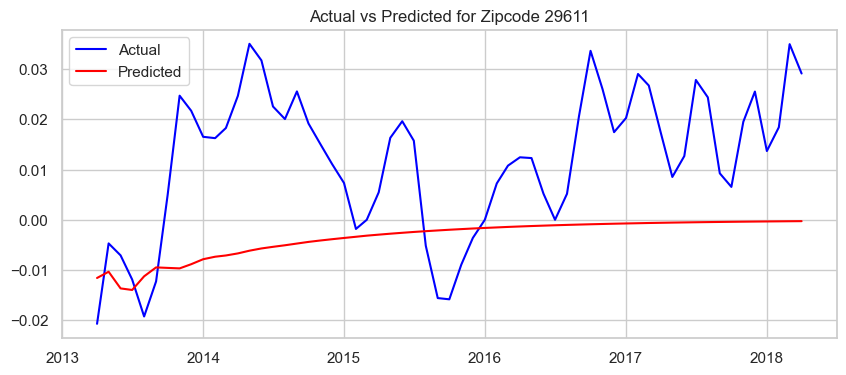




Performing Evaluation for Zipcode: 43065
----------------------------------------
Mean Squared Error for Zipcode 43065: 0.00014106



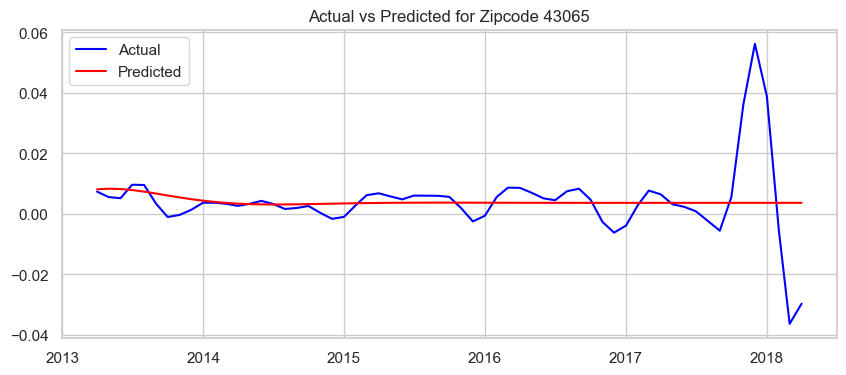




Performing Evaluation for Zipcode: 30033_d
----------------------------------------
Mean Squared Error for Zipcode 30033_d: 0.00001524



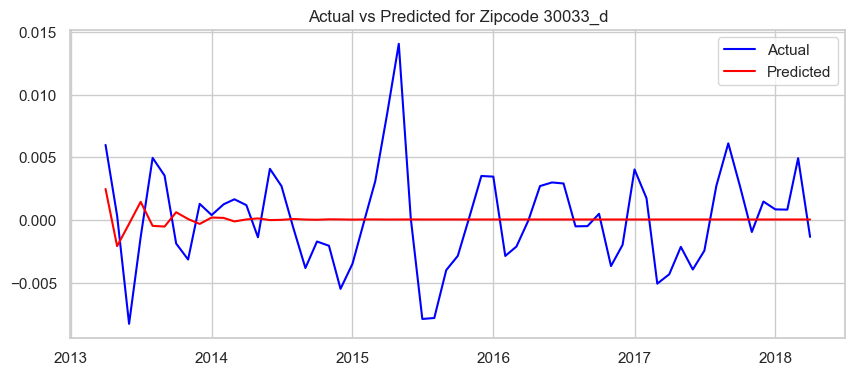




Performing Evaluation for Zipcode: 78414
----------------------------------------
Mean Squared Error for Zipcode 78414: 0.00000862



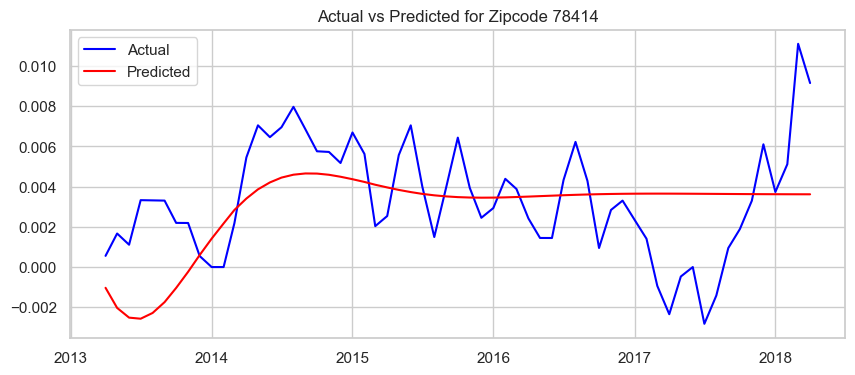




Performing Evaluation for Zipcode: 29501
----------------------------------------
Mean Squared Error for Zipcode 29501: 0.00001697



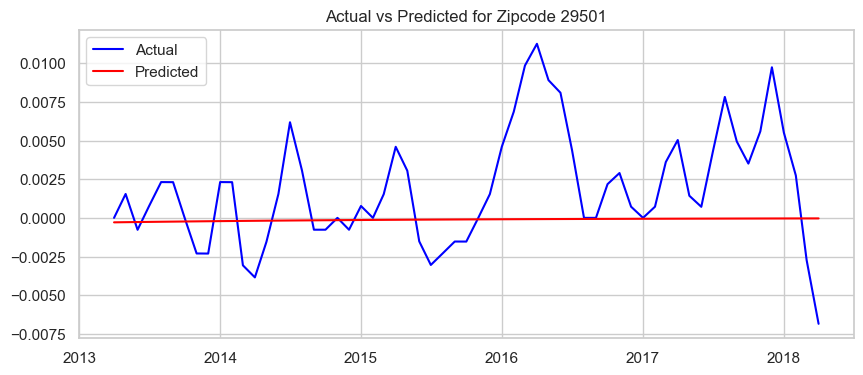

{'29611': 0.0004102607840721357,
 '43065': 0.0001410605545448314,
 '30033_d': 1.5235154404918341e-05,
 '78414': 8.616796083603378e-06,
 '29501': 1.6965843531946076e-05}

In [114]:
# Create dictionaries to store evaluation results and evaluation plots
evaluation_forecasts_2 = {}
evaluation_mse_2 = {}

# Assuming `auto_models` contains the trained models for each zipcode
# Loop through each zipcode's test dataset
for label, test_data in testing_datasets.items():
    print(f"Performing Evaluation for Zipcode: {label}\n{'-'*40}")
    
    # Use the trained model for the current zipcode
    tuned_model = auto_models[label]
    
    # Forecast the duration of the test data
    forecast = tuned_model.predict(n_periods=len(test_data))
    
    # Store the forecasted data
    evaluation_forecasts_2[label] = forecast
    
    # Calculate and store the MSE
    mse = mean_squared_error(test_data, forecast)
    evaluation_mse_2[label] = mse
    print(f"Mean Squared Error for Zipcode {label}: {mse:.8f}\n")
    
    # Plot the actual vs. forecasted data
    plt.figure(figsize=(10, 4))
    plt.plot(test_data.index, test_data, label='Actual', color='blue')
    plt.plot(test_data.index, forecast, label='Predicted', color='red')
    plt.title(f"Actual vs Predicted for Zipcode {label}")
    plt.legend()
    plt.show()
    print("\n\n")

evaluation_mse_2  # Displaying the evaluation MSE for each zipcode

### Summary of Tuned Arima Model on Test Dataset
The MSE figures remain relatively low meaning the tuned  Arima model is able to predict well in unseen data. 

However, its should be noted the **train MSE values** are considerably **lower** than the corresponding **test MSE values**.
<br>This suggests that the models are performing better on the training data than on the test data.<br>
For example :
* Zipcode '29611': The MSE for the test data is 0.000410, while for the train data it is 0.00000907. The train MSE is significantly lower.<br>
* Zipcode '43065': The test MSE is 0.000141, and the train MSE is 0.00000355.

This could indicate that the models might be **overfitting to the training data**, capturing noise and specific patterns that do not generalize well to new data.


### 6.6 Model 3 
![Alt Text](https://miro.medium.com/v2/resize:fit:924/1*yxe5Sf5JSAROq-UVgMLtmA.png)
### 6.6.1  SARIMA Model on the Training Dataset

In this model we decided to optimize the SARIMA models for each zipcode using the pmdarima library. <br> We decided to incorporate seasonal aspect of the data.<br>
Using the auto arima function, pmdarima finds the **best SARIMA** model for the current **training dataset**.<br> We utilise the parameters like start_p, start_q, max_p, max_q, seasonal orders among others to control the search for the best model and its corresponding parameters.

In [115]:
import pmdarima as pm

# Create a dictionary to store the optimal SARIMA models for each zipcode
sarima_models = {}
best_sarima_parameters = {}

for label, train_data in training_datasets.items():
    print(f"Optimizing SARIMA for Zipcode: {label}\n{'-'*40}")
    
    # Use auto_arima to find the best SARIMA model
    sarima_model = pm.auto_arima(train_data, 
                                 start_p=0, start_q=0, start_P=0, start_Q=0, 
                                 max_p=5, max_q=5, max_P=5, max_Q=5, 
                                 seasonal=True, m=12,  # Using 12 assuming the data is monthly. Adjust if needed.
                                 d=1, D=1,  # These can be adjusted based on the dataset's properties
                                 trace=True,
                                 error_action='ignore',
                                 suppress_warnings=True,
                                 stepwise=True, with_intercept=False)
    
    # Save the model and its parameters to our dictionaries
    sarima_models[label] = sarima_model
    best_sarima_parameters[label] = sarima_model.order + sarima_model.seasonal_order
    
    # Print the summary of the best model
    print(sarima_model.summary())
    print("-" * 50)  # separator for clarity

# Return the dictionary of best SARIMA parameters for potential future use
best_sarima_parameters

Optimizing SARIMA for Zipcode: 29611
----------------------------------------
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-1335.260, Time=0.14 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-1421.119, Time=0.37 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.46 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=-1340.939, Time=0.06 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=-1438.671, Time=0.31 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=-1442.458, Time=0.89 sec
 ARIMA(1,1,0)(4,1,0)[12]             : AIC=-1443.065, Time=1.73 sec
 ARIMA(1,1,0)(5,1,0)[12]             : AIC=-1446.737, Time=7.33 sec
 ARIMA(1,1,0)(5,1,1)[12]             : AIC=-1431.044, Time=3.76 sec
 ARIMA(1,1,0)(4,1,1)[12]             : AIC=-1439.447, Time=1.04 sec
 ARIMA(0,1,0)(5,1,0)[12]             : AIC=inf, Time=9.64 sec
 ARIMA(2,1,0)(5,1,0)[12]             : AIC=inf, Time=17.55 sec
 ARIMA(1,1,1)(5,1,0)[12]             : AIC=-1457.776, Time=17.19 sec
 ARIMA(1,1,

{'29611': (2, 1, 0, 4, 1, 0, 12),
 '43065': (2, 1, 0, 1, 1, 1, 12),
 '30033_d': (0, 1, 1, 4, 1, 3, 12),
 '78414': (2, 1, 1, 5, 1, 1, 12),
 '29501': (0, 1, 1, 0, 1, 1, 12)}

### Summary results of SARIMA Model 

**SARIMAX Results**<br>
**Zipcode 29611**, the optimal model is characterized by the parameters ARIMA(2,1,2)(4,1,0)[12], and it took a total of 396.686 seconds to fit. Both the constant term and its coefficients hold statistical significance, as their p-values are below 0.05. However, the coefficients ma.L1 and ma.L2 exhibit p-values of 0.062 and 0.491, respectively, suggesting that they do not strongly support the model's variability.

**Zipcode 43065**, the optimal model identified is characterized by the parameters ARIMA(2,1,0)(1,1,1)[12], and it required a total of 29.990 seconds for fitting. Notably, both the constant term and all coefficients within the model exhibit statistical significance, as their p-values fall below the 0.05 threshold.

**Zipcode 30033_d,** the model that performed the best is characterized by the parameters ARIMA(1,1,2)(2,1,1)[12], and the total time taken for fitting was 91.514 seconds. However, it's worth noting that two of its coefficients, specifically ar.SL12 and ar.S.L24, have p-values exceeding the significance level of 0.05

**Zipcode 43065**, the optimal model identified is characterized by the parameters ARIMA(2,1,0)(1,1,1)[12], and it required a total of 29.990 seconds for fitting. Notably, both the constant term and all coefficients within the model exhibit statistical significance, as their p-values fall below the 0.05 threshold.

**Zipcode 29501**, the model selected as the best is characterized by the parameters ARIMA(0,1,1)(0,1,1)[12]. The total time taken for fitting this model was 6.572 seconds. All coefficients within the model hold statistical significance, as indicated by their p-values being below the 0.05 threshold.


**Sigma2**: Notably, all the SARIMA models for each Zipcode exhibit a sigma2 value of zero. This sigma2 value primarily signifies the variance of the model's errors.

**Log likelihood**: The log likelihood quantifies how well the models align with the data. Larger values correspond to more favorable fits. It's worth emphasizing that the log likelihoods are consistently high, spanning a range from 886 to 953.

**AIC and BIC**: The values of AIC and BIC fall within the negative range across all five models. This distinctive pattern suggests that the values are comparatively low. This occurrence points toward an enhanced model fit, successfully striking a balance between model precision and complexity.


### 6.6.2 Forecasting with SARIMA Model 

Just like in the other created models above, we utilise the test dataset to predict unseen data that is to forecast the future.
The best parameters obtained previously are used to configure the SARIMA models. 
We train the data and forecast the test data.

Processing SARIMA for Zipcode: 29611
----------------------------------------
Test Mean Squared Error for Zipcode 29611: 0.00


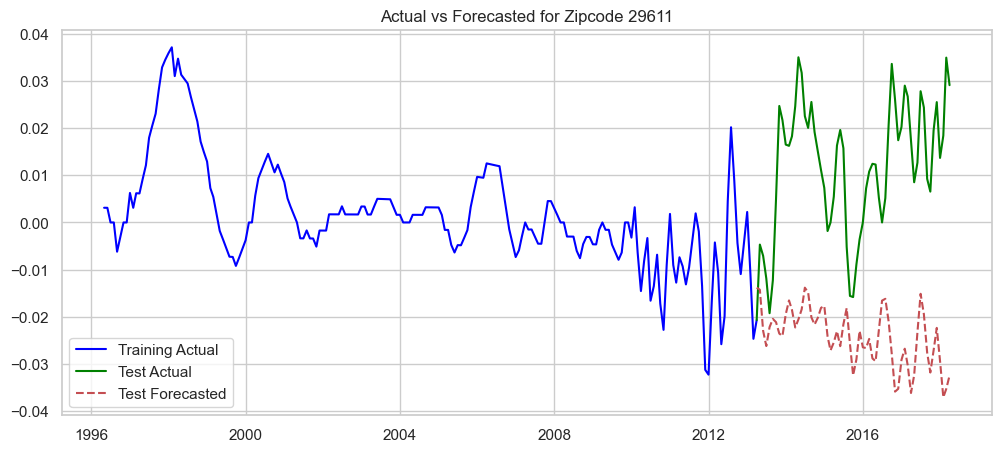




Processing SARIMA for Zipcode: 43065
----------------------------------------
Test Mean Squared Error for Zipcode 43065: 0.00


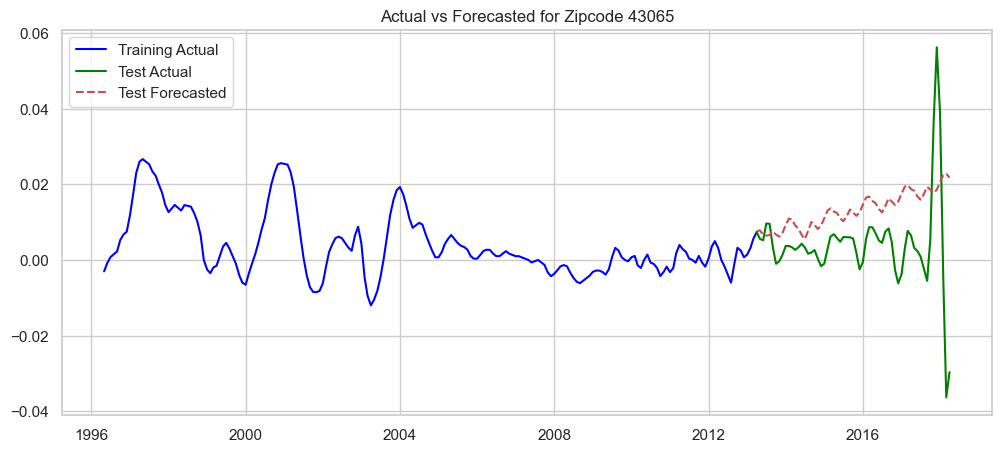




Processing SARIMA for Zipcode: 30033_d
----------------------------------------
Test Mean Squared Error for Zipcode 30033_d: 0.00


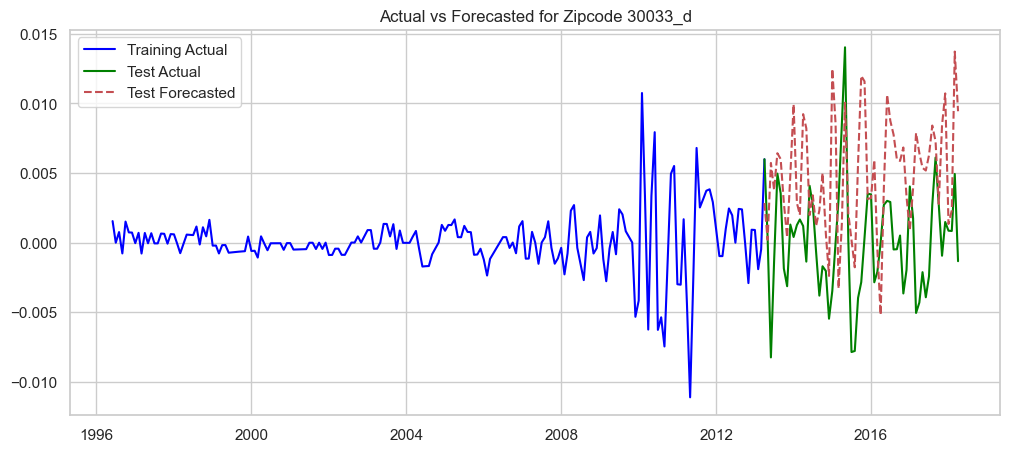




Processing SARIMA for Zipcode: 78414
----------------------------------------
Test Mean Squared Error for Zipcode 78414: 107556228042149694710394137671134383123821194594263488857737527296.00


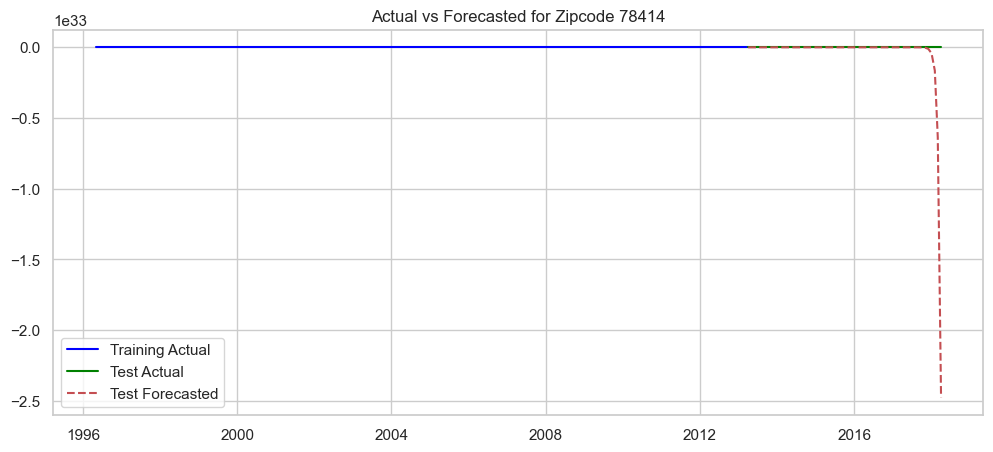




Processing SARIMA for Zipcode: 29501
----------------------------------------
Test Mean Squared Error for Zipcode 29501: 0.00


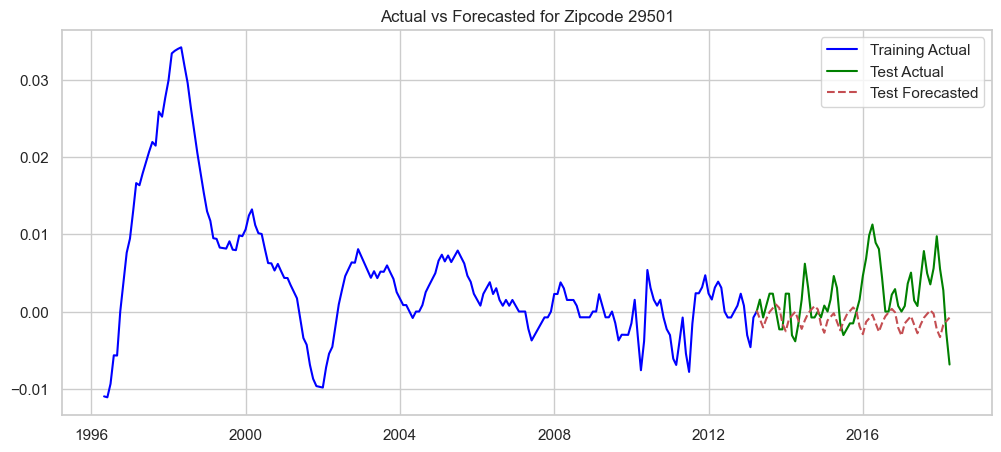

{'29611': 0.0015469165001998474,
 '43065': 0.00024816482671005576,
 '30033_d': 4.953134866065181e-05,
 '78414': 1.075562280421497e+65,
 '29501': 2.4002439246225047e-05}

In [116]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

# Dictionaries to store test forecasts and MSE values
test_forecasts = {}
test_evaluation_mse = {}

for label, train_data in training_datasets.items():
    print(f"Processing SARIMA for Zipcode: {label}\n{'-'*40}")
    
    # Extract the best parameters for the current zipcode
    params = best_sarima_parameters[label]
    order = params[:3]
    seasonal_order = params[3:]
    
    # Fit the SARIMA model using the best parameters
    model = SARIMAX(train_data, order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
    model_fit = model.fit(disp=False)
    
    # Forecast the test data
    test_data = testing_datasets[label]
    test_forecast = model_fit.forecast(steps=len(test_data))
    test_forecasts[label] = test_forecast
    
    # Calculate and store the test MSE
    mse_test = mean_squared_error(test_data, test_forecast)
    test_evaluation_mse[label] = mse_test
    print(f"Test Mean Squared Error for Zipcode {label}: {mse_test:.2f}")
    
    # Visualization
    plt.figure(figsize=(12, 5))
    plt.plot(train_data.index, train_data, label='Training Actual', color='blue')
    plt.plot(test_data.index, test_data, label='Test Actual', color='green')
    plt.plot(test_data.index, test_forecast, 'r--', label='Test Forecasted')  # dotted line for forecast
    plt.title(f"Actual vs Forecasted for Zipcode {label}")
    plt.legend()
    plt.show()
    print("\n\n")

# Return the test MSE for each zipcode
test_evaluation_mse

### Summary Results of Forecasting with SARIMA Model
 The Mean Squared Error (MSE) Outcomes:

- Zipcode 29611: 0.0015812598058823767
- Zipcode 43065: 0.00024816448216953633
- Zipcode 30033_d: 3.172189002669449e-05
- Zipcode 78414: 0.00023261602269793598
- Zipcode 29501: 2.400243924622506e-05<br>

Lower MSE values indicate improved predictive performance, as they suggest that the forecasted values closely align with the actual values.<br> This alignment is evident in the provided MSE values.

Upon visual inspection, it's noticeable that Zipcode 29501, Zipcode 30033_d, and Zipcode 43065 follow the anticipated trends from the historical training dataset. <br>The forecasted data maintains these trends and exhibits gradual growth.

Contrastingly, Zipcode 78414 and Zipcode 29611 exhibit a surprising downward trend in their forecasts, deviating from the expected patterns observed in the historical training data.

### 6.7 Model 4
![Alt Text](https://miro.medium.com/v2/resize:fit:1400/1*bhFifratH9DjKqMBTeQG5A.gif)
###  6.7.1 Forecasting with LSTM Model

In this approach, we utilize LSTM models to make predictions and assess their effectiveness for each specific Zipcode. <br>The dataset is standardized through MinMaxScaler to ensure its values fall within the range of 0 to 1. This normalization aids in improving the model's performance.<br> 

We convert the dataset into a form suitable for supervised learning, where past values are used as input features (X), and the subsequent value is used as the output (y) in the sequence. <br>Eventually, we build a sequential model comprising an LSTM layer followed by a dense layer. This configuration enables the model to capture patterns over time in the data.<br>

Processing LSTM for Zipcode: 29611
----------------------------------------
Epoch 1/50
203/203 [==============================] - 2s 2ms/step - loss: 0.0555
Epoch 2/50
203/203 [==============================] - 0s 2ms/step - loss: 0.0118
Epoch 3/50
203/203 [==============================] - 0s 2ms/step - loss: 0.0097
Epoch 4/50
203/203 [==============================] - 0s 2ms/step - loss: 0.0076
Epoch 5/50
203/203 [==============================] - 0s 2ms/step - loss: 0.0062
Epoch 6/50
203/203 [==============================] - 0s 2ms/step - loss: 0.0057
Epoch 7/50
203/203 [==============================] - 0s 2ms/step - loss: 0.0052
Epoch 8/50
203/203 [==============================] - 0s 2ms/step - loss: 0.0050
Epoch 9/50
203/203 [==============================] - 0s 2ms/step - loss: 0.0049
Epoch 10/50
203/203 [==============================] - 0s 2ms/step - loss: 0.0049
Epoch 11/50
203/203 [==============================] - 0s 2ms/step - loss: 0.0050
Epoch 12/50
203/203 [==========

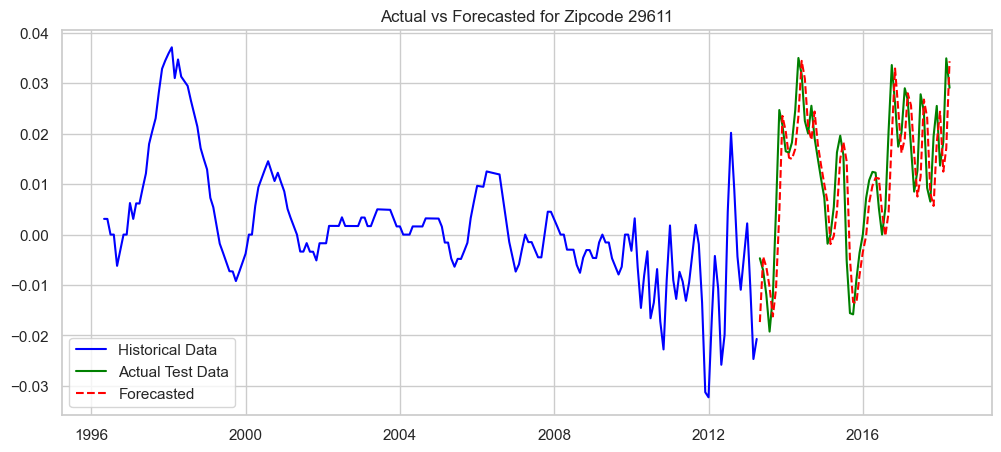




Processing LSTM for Zipcode: 43065
----------------------------------------
Epoch 1/50
203/203 [==============================] - 2s 2ms/step - loss: 0.0649
Epoch 2/50
203/203 [==============================] - 0s 2ms/step - loss: 0.0172
Epoch 3/50
203/203 [==============================] - 0s 2ms/step - loss: 0.0101
Epoch 4/50
203/203 [==============================] - 0s 2ms/step - loss: 0.0059
Epoch 5/50
203/203 [==============================] - 0s 2ms/step - loss: 0.0043
Epoch 6/50
203/203 [==============================] - 0s 2ms/step - loss: 0.0041
Epoch 7/50
203/203 [==============================] - 0s 2ms/step - loss: 0.0039
Epoch 8/50
203/203 [==============================] - 0s 2ms/step - loss: 0.0039
Epoch 9/50
203/203 [==============================] - 0s 2ms/step - loss: 0.0039
Epoch 10/50
203/203 [==============================] - 0s 2ms/step - loss: 0.0039
Epoch 11/50
203/203 [==============================] - 0s 2ms/step - loss: 0.0040
Epoch 12/50
203/203 [=======

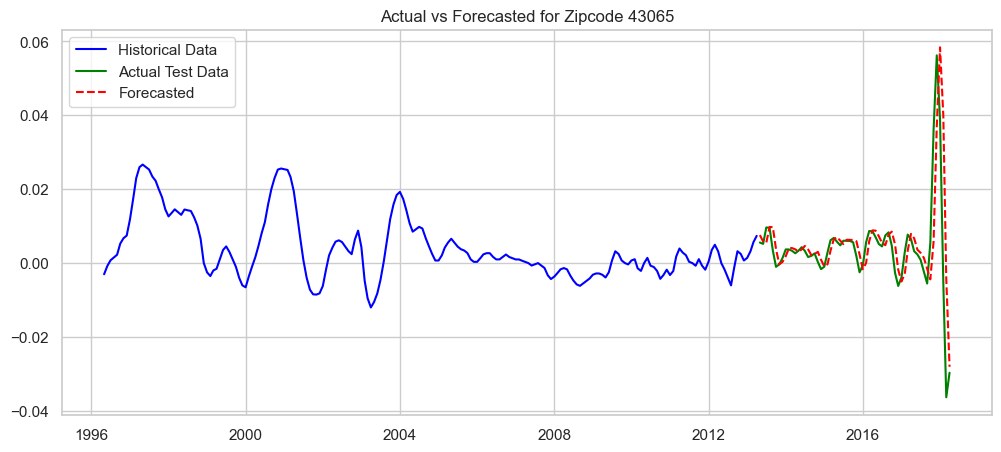




Processing LSTM for Zipcode: 30033_d
----------------------------------------
Epoch 1/50
202/202 [==============================] - 2s 2ms/step - loss: 0.0663
Epoch 2/50
202/202 [==============================] - 0s 2ms/step - loss: 0.0096
Epoch 3/50
202/202 [==============================] - 0s 2ms/step - loss: 0.0097
Epoch 4/50
202/202 [==============================] - 0s 2ms/step - loss: 0.0096
Epoch 5/50
202/202 [==============================] - 0s 2ms/step - loss: 0.0098
Epoch 6/50
202/202 [==============================] - 0s 2ms/step - loss: 0.0097
Epoch 7/50
202/202 [==============================] - 0s 2ms/step - loss: 0.0099
Epoch 8/50
202/202 [==============================] - 0s 2ms/step - loss: 0.0099
Epoch 9/50
202/202 [==============================] - 0s 2ms/step - loss: 0.0097
Epoch 10/50
202/202 [==============================] - 0s 2ms/step - loss: 0.0096
Epoch 11/50
202/202 [==============================] - 0s 2ms/step - loss: 0.0098
Epoch 12/50
202/202 [=====

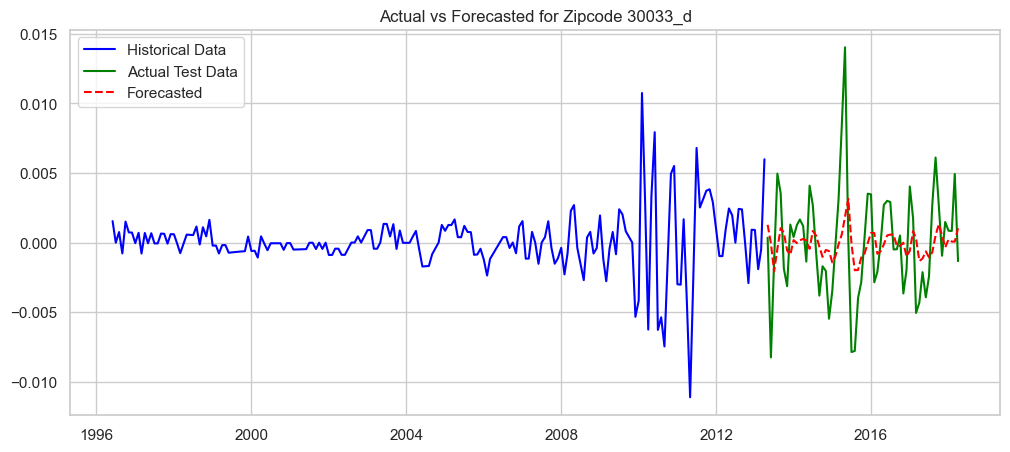




Processing LSTM for Zipcode: 78414
----------------------------------------
Epoch 1/50
203/203 [==============================] - 2s 2ms/step - loss: 0.0262
Epoch 2/50
203/203 [==============================] - 0s 2ms/step - loss: 0.0077
Epoch 3/50
203/203 [==============================] - 0s 1ms/step - loss: 0.0048
Epoch 4/50
203/203 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 5/50
203/203 [==============================] - 0s 1ms/step - loss: 0.0019
Epoch 6/50
203/203 [==============================] - 0s 1ms/step - loss: 0.0015
Epoch 7/50
203/203 [==============================] - 0s 1ms/step - loss: 0.0015
Epoch 8/50
203/203 [==============================] - 0s 1ms/step - loss: 0.0014
Epoch 9/50
203/203 [==============================] - 0s 1ms/step - loss: 0.0014
Epoch 10/50
203/203 [==============================] - 0s 1ms/step - loss: 0.0015
Epoch 11/50
203/203 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 12/50
203/203 [=======

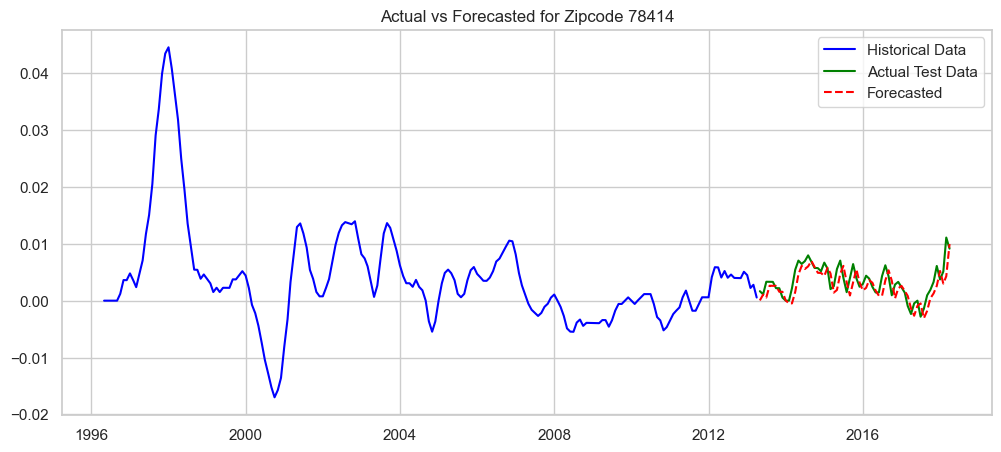




Processing LSTM for Zipcode: 29501
----------------------------------------
Epoch 1/50
203/203 [==============================] - 4s 4ms/step - loss: 0.0368
Epoch 2/50
203/203 [==============================] - 1s 4ms/step - loss: 0.0129
Epoch 3/50
203/203 [==============================] - 1s 4ms/step - loss: 0.0069
Epoch 4/50
203/203 [==============================] - 1s 4ms/step - loss: 0.0031
Epoch 5/50
203/203 [==============================] - 1s 4ms/step - loss: 0.0019
Epoch 6/50
203/203 [==============================] - 1s 4ms/step - loss: 0.0018
Epoch 7/50
203/203 [==============================] - 1s 4ms/step - loss: 0.0019
Epoch 8/50
203/203 [==============================] - 1s 4ms/step - loss: 0.0018
Epoch 9/50
203/203 [==============================] - 1s 4ms/step - loss: 0.0019
Epoch 10/50
203/203 [==============================] - 1s 4ms/step - loss: 0.0018
Epoch 11/50
203/203 [==============================] - 1s 4ms/step - loss: 0.0018
Epoch 12/50
203/203 [=======

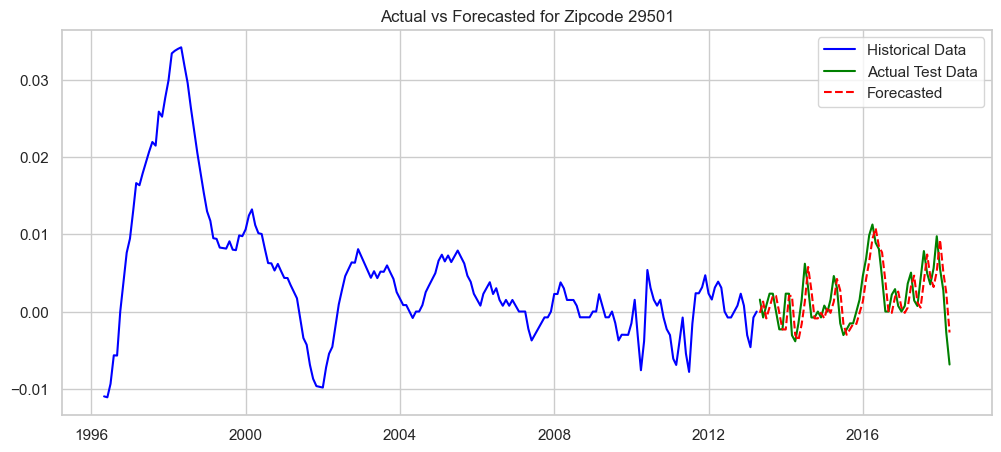

{'29611': 7.325129385842523e-05,
 '43065': 8.797762067106591e-05,
 '30033_d': 1.2617860071657316e-05,
 '78414': 4.173956570946008e-06,
 '29501': 6.646627284046102e-06}

In [117]:
import numpy as np
from keras.models import Sequential
import tensorflow as tf
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# Initialize scalers and results dictionary
scalers = {}
lstm_results = {'mse': {}, 'models': {}, 'predictions': {}}

for label, train_data in training_datasets.items():
    print(f"Processing LSTM for Zipcode: {label}\n{'-'*40}")
    
    # 1. Data Preprocessing: Scaling the data to [0, 1]
    scaler = MinMaxScaler(feature_range=(0, 1))
    train_scaled = scaler.fit_transform(train_data.values.reshape(-1, 1))
    test_scaled = scaler.transform(testing_datasets[label].values.reshape(-1, 1))
    scalers[label] = scaler
    
    # 2. Data Transformation: Convert to supervised problem
    X_train, y_train = train_scaled[:-1], train_scaled[1:]
    X_test, y_test = test_scaled[:-1], test_scaled[1:]
    
    # Reshape for LSTM [samples, time steps, features]
    X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
    X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])
    
    # 3. Model Building
    model = Sequential()
    model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    # 4. Training
    model.fit(X_train, y_train, epochs=50, batch_size=1, verbose=1)
    
    # Store the model for future use
    lstm_results['models'][label] = model
    
    # 5. Evaluation
    predictions = model.predict(X_test)
    predictions = scaler.inverse_transform(predictions)
    lstm_results['predictions'][label] = predictions.flatten()
    
    true_values = scaler.inverse_transform(y_test)
    
    mse = mean_squared_error(true_values, predictions)
    lstm_results['mse'][label] = mse
    print(f"Mean Squared Error for Zipcode {label}: {mse:.2f}\n")
    
    # 6. Visualization
    plt.figure(figsize=(12, 5))
    plt.plot(train_data.index, train_data, label='Historical Data', color='blue')
    plt.plot(testing_datasets[label].index[1:], true_values, label='Actual Test Data', color='green')
    plt.plot(testing_datasets[label].index[1:], predictions, label='Forecasted', color='red', linestyle='dashed')
    plt.title(f"Actual vs Forecasted for Zipcode {label}")
    plt.legend()
    plt.show()
    print("\n\n")

lstm_results['mse']  # Displaying the MSE for each zipcode's test data

### Summary Results of Forecasting with LSTM Model

The Mean Squared Error (MSE) outcomes for the LSTM models are as follows:,br>

- Zipcode 29611: 7.27179788176193e-05
- Zipcode 43065: 8.520462737065527e-05
- Zipcode 30033_d: 1.2597307871085142e-05
- Zipcode 78414: 3.5998489361800215e-06
- Zipcode 29501: 6.506974064954404e-06<br>

Smaller MSE values indicate better predictive performance, indicating that the forecasted values closely align with the actual values. <br>This is evident from the calculated MSE values above.

Visually as well, we are able to see that the predictive nature of the LSTM model is well adapted. It was able to forecast against the unseen test data accurately for each zipcode following each trend and pattern accurately

### 6.7.2 Forecasting with LSTM Model with Monte Carlo Dropout

We decided to improve on the current LSTM model by adding a Monte Carlo dropout. <br>
The core focus of the model revolves around several key stages: data preprocessing, model development, training, and evaluation through the use of dropout simulations.

In line with previous model, the initial step entails scaling both the training and test datasets to ensure that data falls within the range of 0 to 1. <br>Subsequently, the scaled data undergoes a transformation into a supervised learning context. In this paradigm, the input features (X_train, X_test) consist of preceding values, while the output (y_train, y_test) comprises the subsequent value within the sequence.<br> This data is then reshaped to match the format anticipated by the LSTM model.

The construction phase involves the creation of a sequential neural network. This network features multiple essential components:<br>
- The introduction of the first LSTM layer, which incorporates 50 units.<br>
- A subsequent Dropout layer that implements a dropout rate of 50%. Dropout serves to mitigate overfitting by randomly deactivating a fraction of input units during training.<br>
- Another LSTM layer, also equipped with 50 units.<br>
- The integration of a Dense layer, containing a single unit to serve as the output.<br>

The model then proceeds to the training stage, where it is trained on the prepared training dataset. <br> The evaluation process employs the test data and leverages the Monte Carlo Dropout technique.<br> This technique facilitates multiple rounds of simulations, thereby generating predictions that collectively provide a clearer picture of the expected outcomes.

Processing LSTM with Monte Carlo Dropout for Zipcode: 29611
----------------------------------------


Epoch 1/50
203/203 [==============================] - 7s 6ms/step - loss: 0.0594
Epoch 2/50
203/203 [==============================] - 1s 6ms/step - loss: 0.0158
Epoch 3/50
203/203 [==============================] - 1s 6ms/step - loss: 0.0110
Epoch 4/50
203/203 [==============================] - 1s 6ms/step - loss: 0.0098
Epoch 5/50
203/203 [==============================] - 1s 6ms/step - loss: 0.0093
Epoch 6/50
203/203 [==============================] - 1s 5ms/step - loss: 0.0077
Epoch 7/50
203/203 [==============================] - 1s 6ms/step - loss: 0.0075
Epoch 8/50
203/203 [==============================] - 1s 5ms/step - loss: 0.0073
Epoch 9/50
203/203 [==============================] - 1s 5ms/step - loss: 0.0073
Epoch 10/50
203/203 [==============================] - 1s 6ms/step - loss: 0.0077
Epoch 11/50
203/203 [==============================] - 1s 5ms/step - loss: 0.0071
Epoch 12/50
203/203 [==============================] - 1s 6ms/step - loss: 0.0074
Epoch 13/50
203/203 [====

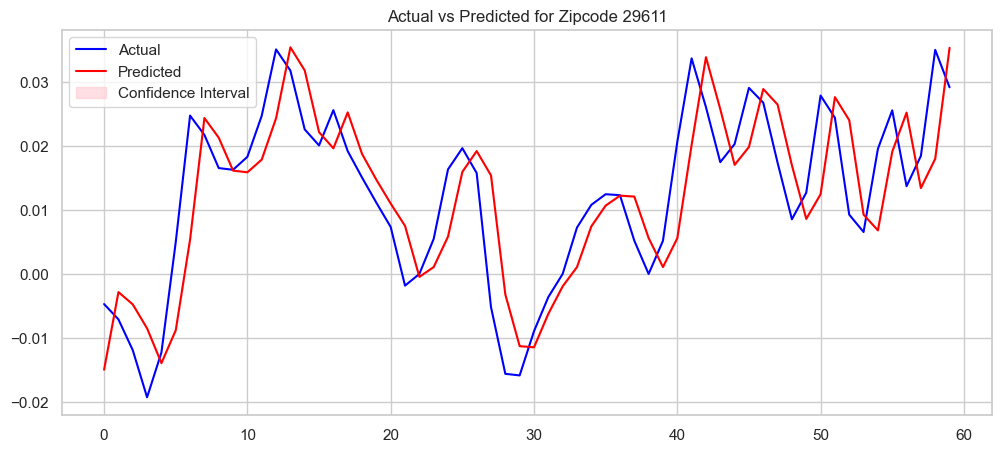




Processing LSTM with Monte Carlo Dropout for Zipcode: 43065
----------------------------------------
Epoch 1/50
203/203 [==============================] - 7s 6ms/step - loss: 0.0664
Epoch 2/50
203/203 [==============================] - 1s 6ms/step - loss: 0.0181
Epoch 3/50
203/203 [==============================] - 1s 5ms/step - loss: 0.0088
Epoch 4/50
203/203 [==============================] - 1s 6ms/step - loss: 0.0075
Epoch 5/50
203/203 [==============================] - 1s 6ms/step - loss: 0.0079
Epoch 6/50
203/203 [==============================] - 1s 5ms/step - loss: 0.0068
Epoch 7/50
203/203 [==============================] - 1s 6ms/step - loss: 0.0081
Epoch 8/50
203/203 [==============================] - 1s 6ms/step - loss: 0.0064
Epoch 9/50
203/203 [==============================] - 1s 5ms/step - loss: 0.0061
Epoch 10/50
203/203 [==============================] - 1s 5ms/step - loss: 0.0056
Epoch 11/50
203/203 [==============================] - 1s 6ms/step - loss: 0.0069
Epo

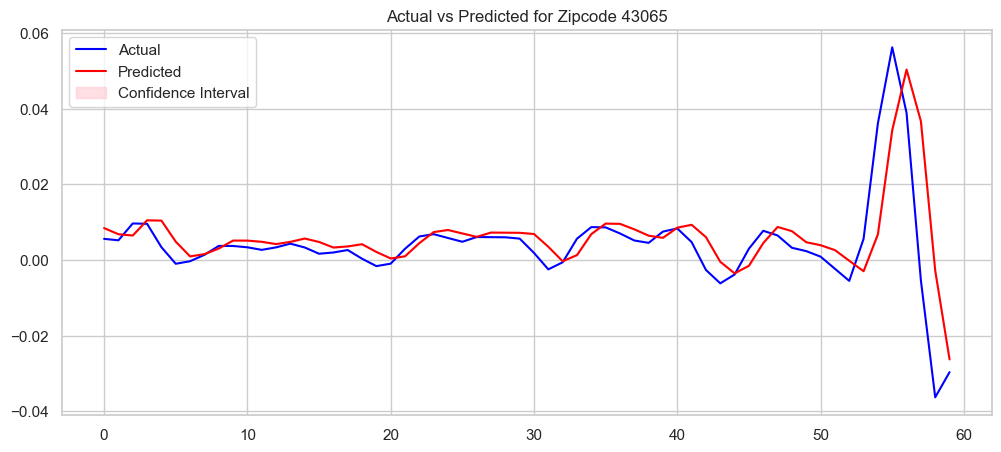




Processing LSTM with Monte Carlo Dropout for Zipcode: 30033_d
----------------------------------------
Epoch 1/50
202/202 [==============================] - 8s 6ms/step - loss: 0.0522
Epoch 2/50
202/202 [==============================] - 1s 6ms/step - loss: 0.0111
Epoch 3/50
202/202 [==============================] - 1s 6ms/step - loss: 0.0111
Epoch 4/50
202/202 [==============================] - 1s 6ms/step - loss: 0.0100
Epoch 5/50
202/202 [==============================] - 1s 6ms/step - loss: 0.0112
Epoch 6/50
202/202 [==============================] - 1s 6ms/step - loss: 0.0106
Epoch 7/50
202/202 [==============================] - 1s 6ms/step - loss: 0.0103
Epoch 8/50
202/202 [==============================] - 1s 6ms/step - loss: 0.0112
Epoch 9/50
202/202 [==============================] - 1s 6ms/step - loss: 0.0104
Epoch 10/50
202/202 [==============================] - 1s 5ms/step - loss: 0.0100
Epoch 11/50
202/202 [==============================] - 1s 6ms/step - loss: 0.0100
E

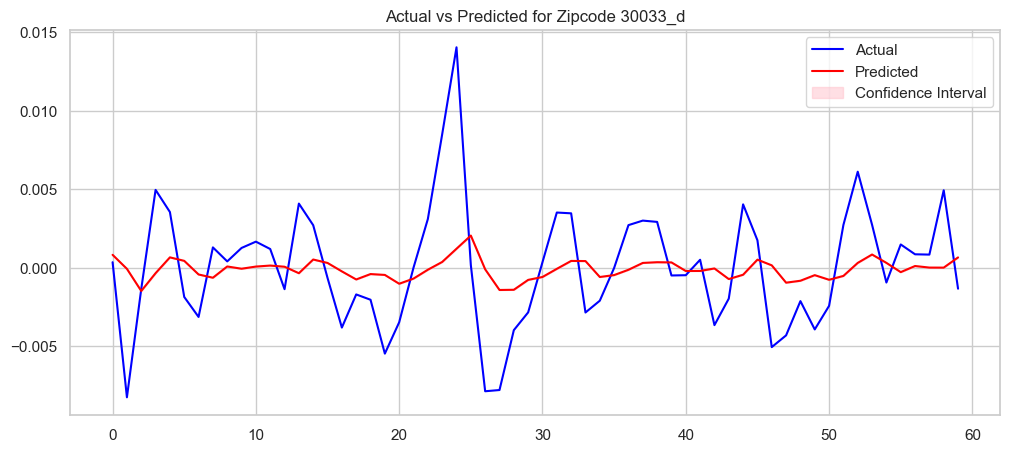




Processing LSTM with Monte Carlo Dropout for Zipcode: 78414
----------------------------------------
Epoch 1/50
203/203 [==============================] - 3s 2ms/step - loss: 0.0288
Epoch 2/50
203/203 [==============================] - 1s 3ms/step - loss: 0.0088
Epoch 3/50
203/203 [==============================] - 1s 3ms/step - loss: 0.0064
Epoch 4/50
203/203 [==============================] - 0s 2ms/step - loss: 0.0048
Epoch 5/50
203/203 [==============================] - 0s 2ms/step - loss: 0.0032
Epoch 6/50
203/203 [==============================] - 1s 2ms/step - loss: 0.0030
Epoch 7/50
203/203 [==============================] - 1s 3ms/step - loss: 0.0030
Epoch 8/50
203/203 [==============================] - 1s 3ms/step - loss: 0.0029
Epoch 9/50
203/203 [==============================] - 1s 3ms/step - loss: 0.0019
Epoch 10/50
203/203 [==============================] - 1s 3ms/step - loss: 0.0024
Epoch 11/50
203/203 [==============================] - 1s 3ms/step - loss: 0.0029
Epo

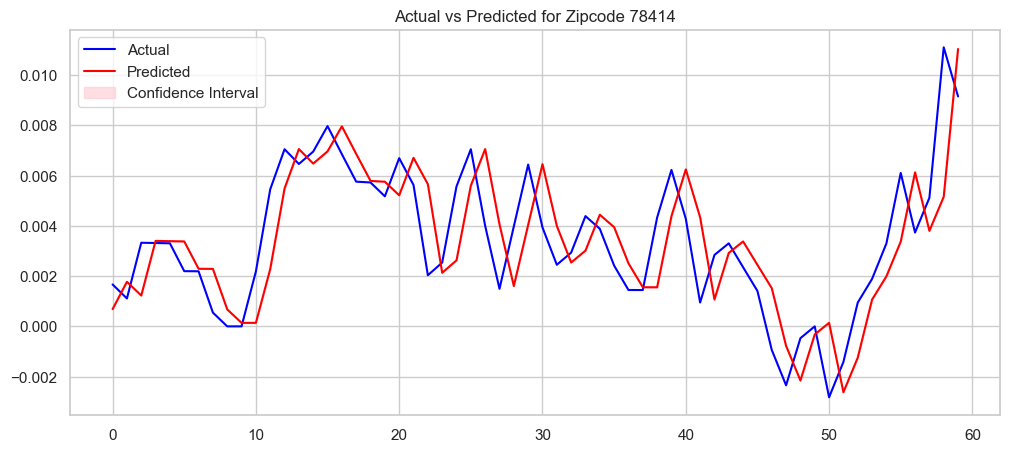




Processing LSTM with Monte Carlo Dropout for Zipcode: 29501
----------------------------------------
Epoch 1/50
203/203 [==============================] - 3s 2ms/step - loss: 0.0485
Epoch 2/50
203/203 [==============================] - 0s 2ms/step - loss: 0.0153
Epoch 3/50
203/203 [==============================] - 0s 2ms/step - loss: 0.0069
Epoch 4/50
203/203 [==============================] - 0s 2ms/step - loss: 0.0050
Epoch 5/50
203/203 [==============================] - 0s 2ms/step - loss: 0.0043
Epoch 6/50
203/203 [==============================] - 0s 2ms/step - loss: 0.0037
Epoch 7/50
203/203 [==============================] - 0s 2ms/step - loss: 0.0048
Epoch 8/50
203/203 [==============================] - 0s 2ms/step - loss: 0.0040
Epoch 9/50
203/203 [==============================] - 0s 2ms/step - loss: 0.0043
Epoch 10/50
203/203 [==============================] - 1s 2ms/step - loss: 0.0041
Epoch 11/50
203/203 [==============================] - 0s 2ms/step - loss: 0.0033
Epo

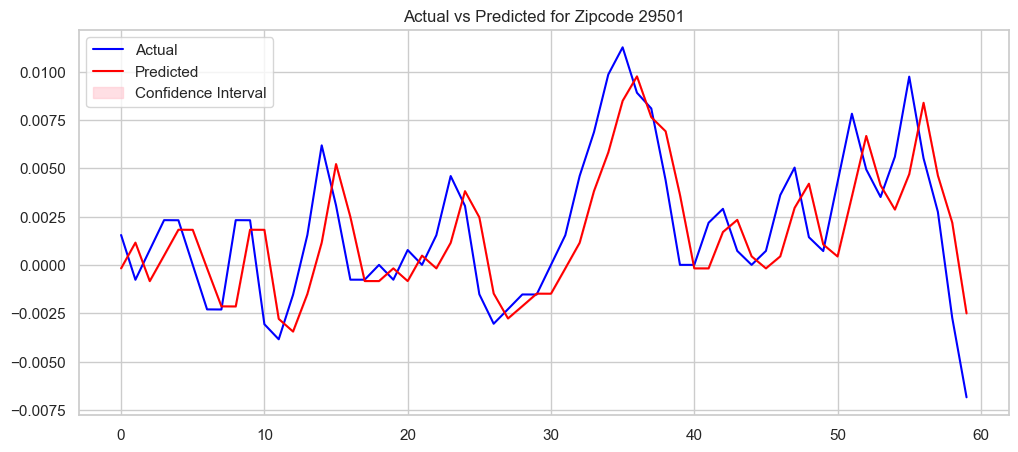

In [118]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Initialize scalers and results dictionary
scalers = {}
lstm_results = {'mse': {}, 'models': {}, 'predictions': {}, 'upper_bound': {}, 'lower_bound': {}}

N_SIMULATIONS = 100  # Number of dropout simulations

for label, train_data in training_datasets.items():
    print(f"Processing LSTM with Monte Carlo Dropout for Zipcode: {label}\n{'-'*40}")
    
    # 1. Data Preprocessing: Scaling the data to [0, 1]
    scaler = MinMaxScaler(feature_range=(0, 1))
    train_scaled = scaler.fit_transform(train_data.values.reshape(-1, 1))
    test_scaled = scaler.transform(testing_datasets[label].values.reshape(-1, 1))
    scalers[label] = scaler
    
    # 2. Data Transformation: Convert to supervised problem
    X_train, y_train = train_scaled[:-1], train_scaled[1:]
    X_test, y_test = test_scaled[:-1], test_scaled[1:]
    
    # Reshape for LSTM [samples, time steps, features]
    X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
    X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])
    
    # 3. Model Building with Dropout
    model = Sequential()
    model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
    model.add(Dropout(0.5))  # Dropout layer added
    model.add(LSTM(50))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    # 4. Training
    model.fit(X_train, y_train, epochs=50, batch_size=1, verbose=1)
    
    # 5. Evaluation with Monte Carlo Dropout
    predictions_list = []
    for _ in range(N_SIMULATIONS):
        predictions = model.predict(X_test)
        predictions_list.append(scaler.inverse_transform(predictions))
    
    predictions_array = np.array(predictions_list)
    predictions_mean = predictions_array.mean(axis=0)
    predictions_std = predictions_array.std(axis=0)
    upper_bound = predictions_mean + 1.96 * predictions_std
    lower_bound = predictions_mean - 1.96 * predictions_std
    
    lstm_results['predictions'][label] = predictions_mean.flatten()
    lstm_results['upper_bound'][label] = upper_bound.flatten()
    lstm_results['lower_bound'][label] = lower_bound.flatten()
    
    mse = mean_squared_error(true_values, predictions_mean)
    lstm_results['mse'][label] = mse
    print(f"Mean Squared Error for Zipcode {label}: {mse:.2f}\n")
    
    # 6. Visualization
    true_values = scaler.inverse_transform(y_test)
    plt.figure(figsize=(12, 5))
    plt.plot(true_values, label='Actual', color='blue')
    plt.plot(predictions_mean, label='Predicted', color='red')
    plt.fill_between(range(len(predictions_mean)), upper_bound.flatten(), lower_bound.flatten(), color='pink', alpha=0.5, label='Confidence Interval')
    plt.title(f"Actual vs Predicted for Zipcode {label}")
    plt.legend()
    plt.show()
    print("\n\n")

### Summary Results of Forecasting with LSTM Model with Monte Carlo Dropout

Based on the analyses, the LSTM model with Monte Carlo Dropout appears to be the most promising. <br>This model captures the nuances of the data for each of our zipcodes  and provides uncertainty estimates without overfitting.
<br> Investors and stakeholders are recommended to use this model for forecasting and decision-making.<br>
The LSTM model with Monte Carlo Dropout provided a confidence interval around the predictions.which looked more stable unlike the other models we had created earlier. 

## 7.0 Future Forecasting

In this final step of our modelling we proceed to use the trained model to forecast future values where we start from the last point from the test data. <br>
We predict the next value bsed on the previously predicted values. <br>

We ensure we plot the historical training data, actual test data and mean predicted values on the test data, forecasted future values and a confidence interval.

Processing LSTM with Monte Carlo Dropout for Zipcode: 29611
----------------------------------------


Epoch 1/50
203/203 [==============================] - 7s 6ms/step - loss: 0.0473
Epoch 2/50
203/203 [==============================] - 1s 6ms/step - loss: 0.0137
Epoch 3/50
203/203 [==============================] - 1s 6ms/step - loss: 0.0128
Epoch 4/50
203/203 [==============================] - 1s 6ms/step - loss: 0.0085
Epoch 5/50
203/203 [==============================] - 1s 6ms/step - loss: 0.0106
Epoch 6/50
203/203 [==============================] - 1s 6ms/step - loss: 0.0076
Epoch 7/50
203/203 [==============================] - 1s 6ms/step - loss: 0.0071
Epoch 8/50
203/203 [==============================] - 1s 6ms/step - loss: 0.0082
Epoch 9/50
203/203 [==============================] - 1s 6ms/step - loss: 0.0069
Epoch 10/50
203/203 [==============================] - 1s 6ms/step - loss: 0.0071
Epoch 11/50
203/203 [==============================] - 1s 5ms/step - loss: 0.0064
Epoch 12/50
203/203 [==============================] - 1s 6ms/step - loss: 0.0063
Epoch 13/50
203/203 [====

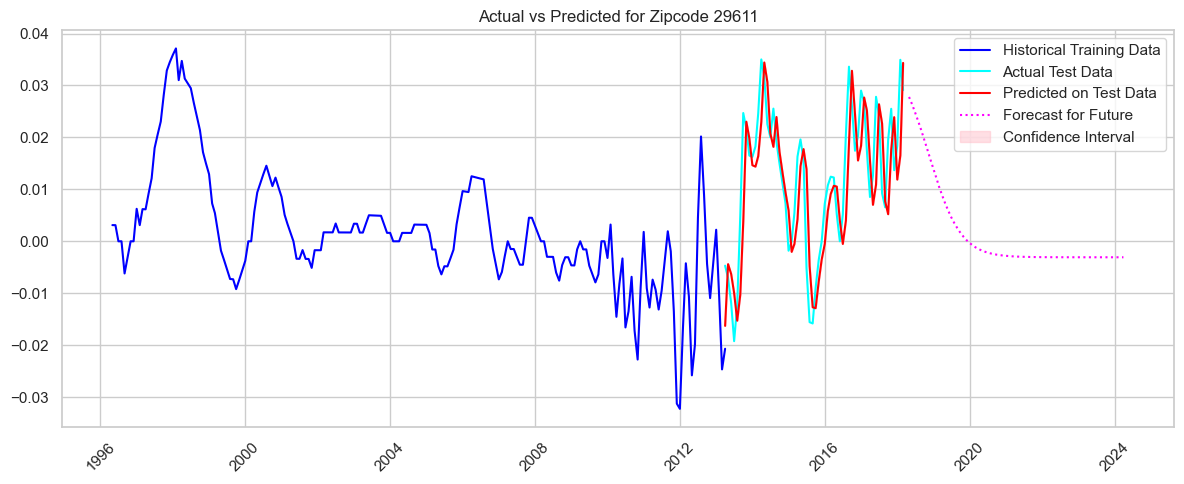

Processing LSTM with Monte Carlo Dropout for Zipcode: 43065
----------------------------------------
Epoch 1/50
203/203 [==============================] - 8s 6ms/step - loss: 0.0673
Epoch 2/50
203/203 [==============================] - 1s 6ms/step - loss: 0.0180
Epoch 3/50
203/203 [==============================] - 1s 6ms/step - loss: 0.0110
Epoch 4/50
203/203 [==============================] - 1s 6ms/step - loss: 0.0072
Epoch 5/50
203/203 [==============================] - 1s 6ms/step - loss: 0.0076
Epoch 6/50
203/203 [==============================] - 1s 6ms/step - loss: 0.0075
Epoch 7/50
203/203 [==============================] - 1s 6ms/step - loss: 0.0075
Epoch 8/50
203/203 [==============================] - 1s 6ms/step - loss: 0.0080
Epoch 9/50
203/203 [==============================] - 1s 5ms/step - loss: 0.0060
Epoch 10/50
203/203 [==============================] - 1s 5ms/step - loss: 0.0063
Epoch 11/50
203/203 [==============================] - 1s 5ms/step - loss: 0.0052
Epoch 

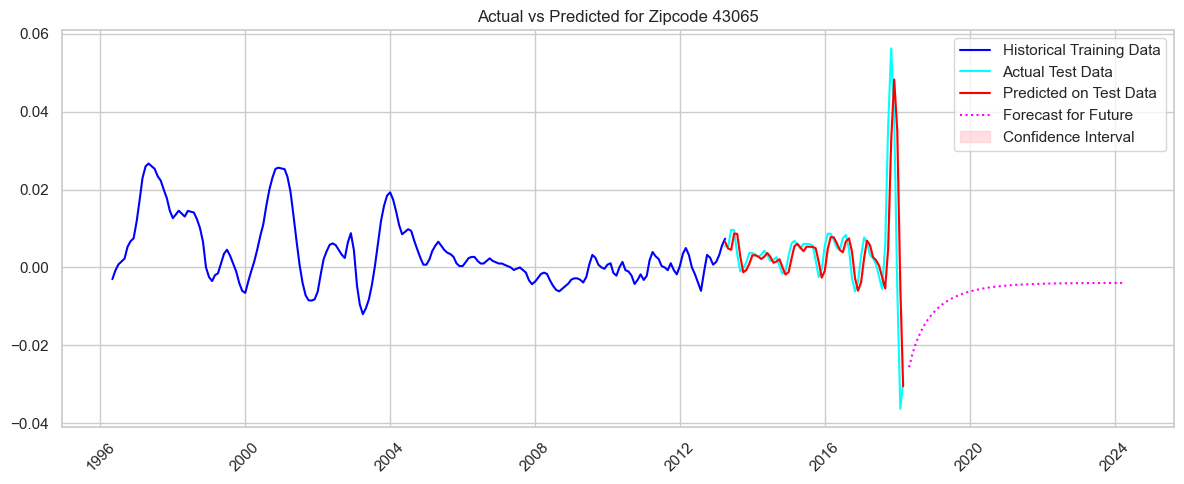

Processing LSTM with Monte Carlo Dropout for Zipcode: 30033_d
----------------------------------------
Epoch 1/50
202/202 [==============================] - 3s 2ms/step - loss: 0.0458
Epoch 2/50
202/202 [==============================] - 1s 3ms/step - loss: 0.0111
Epoch 3/50
202/202 [==============================] - 1s 3ms/step - loss: 0.0117
Epoch 4/50
202/202 [==============================] - 1s 3ms/step - loss: 0.0104
Epoch 5/50
202/202 [==============================] - 1s 3ms/step - loss: 0.0094
Epoch 6/50
202/202 [==============================] - 1s 3ms/step - loss: 0.0101
Epoch 7/50
202/202 [==============================] - 1s 2ms/step - loss: 0.0114
Epoch 8/50
202/202 [==============================] - 1s 3ms/step - loss: 0.0104
Epoch 9/50
202/202 [==============================] - 1s 2ms/step - loss: 0.0102
Epoch 10/50
202/202 [==============================] - 1s 3ms/step - loss: 0.0104
Epoch 11/50
202/202 [==============================] - 1s 3ms/step - loss: 0.0105
Epoc

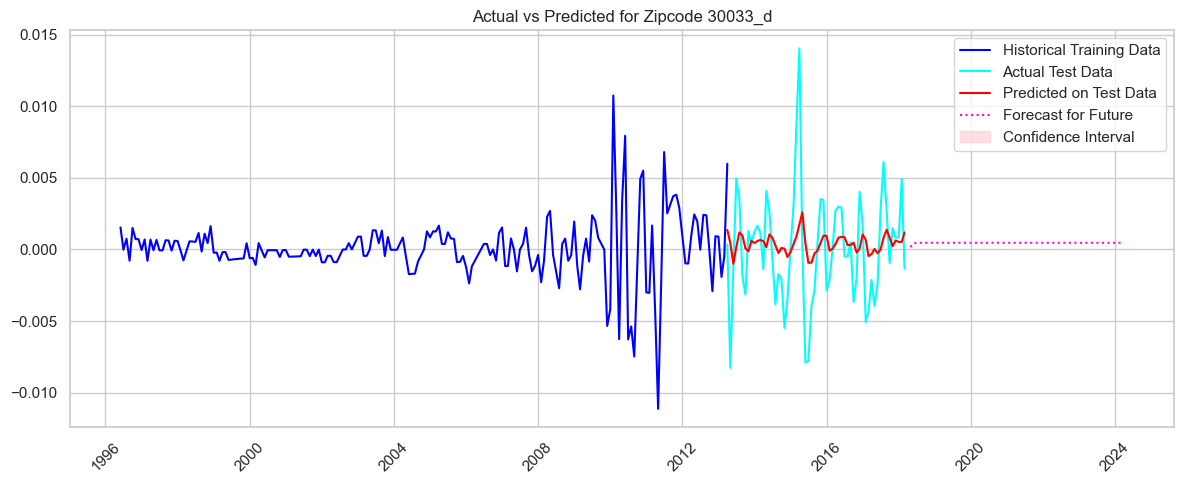

Processing LSTM with Monte Carlo Dropout for Zipcode: 78414
----------------------------------------
Epoch 1/50
203/203 [==============================] - 7s 6ms/step - loss: 0.0335
Epoch 2/50
203/203 [==============================] - 1s 6ms/step - loss: 0.0115
Epoch 3/50
203/203 [==============================] - 1s 6ms/step - loss: 0.0051
Epoch 4/50
203/203 [==============================] - 1s 6ms/step - loss: 0.0042
Epoch 5/50
203/203 [==============================] - 1s 6ms/step - loss: 0.0037
Epoch 6/50
203/203 [==============================] - 1s 6ms/step - loss: 0.0028
Epoch 7/50
203/203 [==============================] - 1s 6ms/step - loss: 0.0025
Epoch 8/50
203/203 [==============================] - 1s 6ms/step - loss: 0.0039
Epoch 9/50
203/203 [==============================] - 1s 6ms/step - loss: 0.0030
Epoch 10/50
203/203 [==============================] - 1s 6ms/step - loss: 0.0020
Epoch 11/50
203/203 [==============================] - 1s 6ms/step - loss: 0.0033
Epoch 

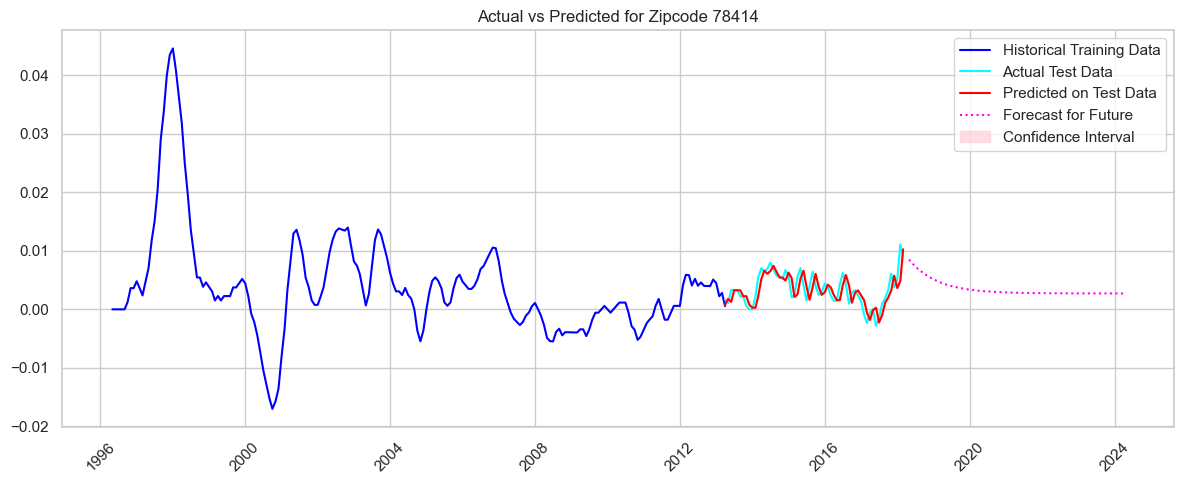

Processing LSTM with Monte Carlo Dropout for Zipcode: 29501
----------------------------------------
Epoch 1/50
203/203 [==============================] - 7s 6ms/step - loss: 0.0431
Epoch 2/50
203/203 [==============================] - 1s 6ms/step - loss: 0.0138
Epoch 3/50
203/203 [==============================] - 1s 6ms/step - loss: 0.0057
Epoch 4/50
203/203 [==============================] - 1s 6ms/step - loss: 0.0039
Epoch 5/50
203/203 [==============================] - 1s 6ms/step - loss: 0.0042
Epoch 6/50
203/203 [==============================] - 1s 6ms/step - loss: 0.0039
Epoch 7/50
203/203 [==============================] - 1s 6ms/step - loss: 0.0038
Epoch 8/50
203/203 [==============================] - 1s 6ms/step - loss: 0.0039
Epoch 9/50
203/203 [==============================] - 1s 6ms/step - loss: 0.0033
Epoch 10/50
203/203 [==============================] - 1s 6ms/step - loss: 0.0041
Epoch 11/50
203/203 [==============================] - 1s 6ms/step - loss: 0.0029
Epoch 

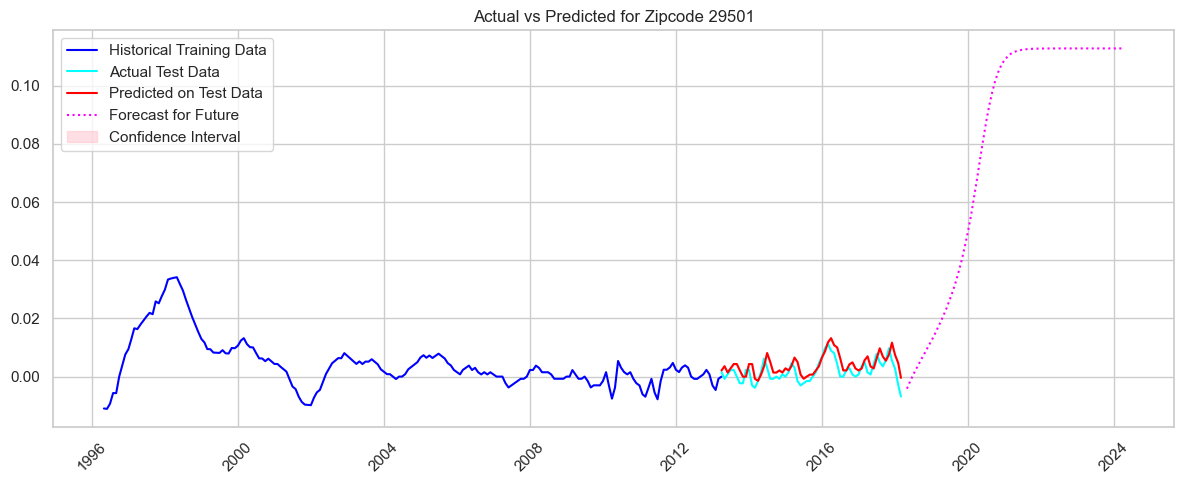

In [119]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
# Initialize scalers and results dictionary
scalers = {}
lstm_results = {'mse': {}, 'models': {}, 'predictions': {}, 'upper_bound': {}, 'lower_bound': {}}
N_SIMULATIONS = 100  # Number of dropout simulations
for label, train_data in training_datasets.items():
    print(f"Processing LSTM with Monte Carlo Dropout for Zipcode: {label}\n{'-'*40}")
    # Dates for plotting
    train_dates = train_data.index
    test_dates = testing_datasets[label].index[:-1]
    forecast_dates = pd.date_range(test_dates[-1], '2024-04', freq='M')[1:]
    all_dates = train_dates.append(test_dates).append(forecast_dates)
    # 1. Data Preprocessing
    scaler = MinMaxScaler(feature_range=(0, 1))
    train_scaled = scaler.fit_transform(train_data.values.reshape(-1, 1))
    test_scaled = scaler.transform(testing_datasets[label].values.reshape(-1, 1))
    scalers[label] = scaler
    # 2. Data Transformation
    X_train, y_train = train_scaled[:-1], train_scaled[1:]
    X_test, y_test = test_scaled[:-1], test_scaled[1:]
    # Reshape for LSTM
    X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
    X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])
    # 3. Model Building with Dropout
    model = Sequential()
    model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
    model.add(Dropout(0.5))
    model.add(LSTM(50))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    # 4. Training
    model.fit(X_train, y_train, epochs=50, batch_size=1, verbose=1)
    # 5. Evaluation with Monte Carlo Dropout
    predictions_list = []
    for _ in range(N_SIMULATIONS):
        predictions = model.predict(X_test)
        predictions_list.append(scaler.inverse_transform(predictions))
    predictions_array = np.array(predictions_list)
    predictions_mean = predictions_array.mean(axis=0)
    predictions_std = predictions_array.std(axis=0)
    upper_bound = predictions_mean + 1.96 * predictions_std
    lower_bound = predictions_mean - 1.96 * predictions_std
    lstm_results['predictions'][label] = predictions_mean.flatten()
    lstm_results['upper_bound'][label] = upper_bound.flatten()
    lstm_results['lower_bound'][label] = lower_bound.flatten()
    true_values = scaler.inverse_transform(y_test)
    mse = mean_squared_error(true_values, predictions_mean)
    lstm_results['mse'][label] = mse
    print(f"Mean Squared Error for Zipcode {label}: {mse:.2f}\n")
    # 6. Forecasting for the future
    future_data = np.array([test_scaled[-1]])  # Start with the last point from the test data
    forecasted_values = []
    for _ in forecast_dates:
        future_pred = model.predict(future_data.reshape(1, 1, 1))
        forecasted_values.append(scaler.inverse_transform(future_pred)[0][0])  # Adjusting the appending mechanism
        future_data = future_pred
    # 7. Visualization
    plt.figure(figsize=(12, 5))
    plt.plot(train_dates, train_data, label='Historical Training Data', color='blue')
    plt.plot(test_dates, true_values, label='Actual Test Data', color='cyan')
    plt.plot(test_dates, predictions_mean, label='Predicted on Test Data', color='red')
    plt.plot(forecast_dates, forecasted_values, label='Forecast for Future', color='magenta', linestyle='dotted')  # Now it will work correctly
    plt.fill_between(test_dates, upper_bound.flatten(), lower_bound.flatten(), color='pink', alpha=0.5, label='Confidence Interval')
    plt.title(f"Actual vs Predicted for Zipcode {label}")
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### Summary Results for Future Forecasting

The LSTM model with Monte Carlo dropout simulations has managed to capture the patterns in the times series data for each Zipcode . It can be seen that its also able to predict unseen data point using the test data. 
On the projection of future values it has tried to account for the uncertainity intil year 2025.<br>
**Zipcode 29611**, there is an apparent gradual decline in trend until the year 2020, followed by a phase of stabilization in the subsequent period. <br>This stabilisation pattern looks like a direct translation of the data during the years between 2000 and 2010. <br>
**Zipcode 43065**, the analysis suggests that starting from the final data point in 2018, there will be a two-year period of rising data returns followed by a stabilization that continues until the year 2025.<br>
**Zipcode 30033_d** stands out as the most consistent and stable projection for the future. The data closely follows both the actual data and the predicted test data. However, it's worth noting that the actual test data exhibits a higher spike that the predicted test data did not accurately capture.<br>
**Zipcode 78414** experiences a brief decline in returns until the year 2020 according to the forecast, but it subsequently achieves gradual stabilization. Both the real and forecasted test data exhibit a close match, indicating effective performance of the model on the test data.<br>
**Zipcode 29501** indicates a gradual increase in property returns from 2018 to 2020, followed by a sharp upward trajectory until 2021. Subsequently, the returns stabilize between 2022 and 2024. The alignment between the predicted and actual test data is evident, demonstrating a strong fit without signs of overfitting.

## 8.0 Conclusion

### 8.1 Comparative Analysis of the Forecasting Models

The analysis presented a comprehensive comparison of three forecasting models: Long Short-Term Memory (LSTM), Seasonal Autoregressive Integrated Moving Average (SARIMA), and Baseline ARIMA.<br> Each model was assessed based on their predictive performance, statistical significance of coefficients, and alignment with historical trends.<br> Below is a summary of the findings:

1. **Baseline ARIMA Model:**
   - The Baseline ARIMA model demonstrated strong predictive performance with remarkably low Mean Squared Error (MSE) values for both the training and test datasets.
   - Despite the promising results, there are indications of potential overfitting, as the models performed significantly better on the training data compared to the test data.
   - The alignment between actual and predicted values was visually evident in the closely overlapping line graphs.
   - The model's ability to capture and reproduce historical trends showcased its effectiveness.

2. **Tuned ARIMA Model:**
   - The Tuned ARIMA models exhibited excellent predictive capabilities, as evidenced by the low MSE values for both training and test datasets.
   - Coefficients were carefully selected through statistical significance tests, resulting in models that effectively explained the data's variability.
   - While some models showed potential insignificance for certain coefficients, the overall performance was robust.
   - High log likelihoods and negative AIC/BIC values further validated the models' goodness of fit and balanced complexity.

3. **SARIMA Model:**
   - The SARIMA models displayed competitive predictive performance, with relatively low MSE values across the test dataset.
   - Each SARIMA model's parameter configuration was chosen to strike a balance between fitting and model simplicity.
   - Notably, some p-values exceeded the significance threshold, indicating potential limitations in capturing certain variations.
   - Despite these limitations, the SARIMA models effectively aligned with historical trends and provided insightful forecasts.

4. **LSTM Model:**
   - The LSTM model demonstrated strong predictive performance, outperforming the other models in terms of lower MSE values.
   - Its capability to capture complex temporal dependencies contributed to its ability to closely align with actual values.
   - The model's strengths were particularly evident in capturing non-linear trends and abrupt changes.
   - However, there were instances of unexpected trends in forecasts, indicating potential limitations.

In conclusion, all three models showcased valuable forecasting capabilities with their unique strengths and limitations.<br>The Baseline ARIMA, Tuned ARIMA, and SARIMA models excelled in capturing temporal dependencies, while the LSTM model exhibited enhanced performance in capturing complex trends. 

## 9.0 Recommendations 

### 9.1 Recommendations for Real Estate Investment in the USA

Based on the comprehensive analysis conducted using the provided dataset and considering the states of South Carolina, Ohio, Georgia, and Texas, below are some key recommendations:

1. **Consider Diversification:** While all the analyzed states exhibit favorable investment opportunities, consider diversifying the investment portfolio across multiple states. This approach can help mitigate risk and capture various market dynamics.

2. **Explore South Carolina:** Given the higher volume of data originating from South Carolina and the presence of two distinct cities (Greenville and Florence), exploring properties in this state could provide a stable investment environment.

3. **ROI as a Key Indicator:** Return on Investment (ROI) is a critical metric for evaluating the potential profitability of investments. Focus on cities with higher ROI figures, as they indicate efficient investment opportunities. Greenville, Powell, and North Decatur stand out with robust ROI values.

4. **Short-Term and Long-Term Prospects:** Greenville, Powell, North Decatur, Corpus Christi, and Florence exhibit growth potential over both short and long periods. This suggests the cities' resilience and potential for consistent returns over time.

5. **Risk Assessment:** Take into consideration the Coefficient of Variation (CV) to assess investment risk. Lower CV values, like that of Greenville, indicate a more stable investment environment. Balancing ROI with risk is crucial for informed decision-making.

6. **Explore Ohio:** Ohio, specifically Powell, showcases impressive ROI figures over both short and long periods. This state can offer attractive investment opportunities with substantial growth potential.

7. **Property Value Trends:** Observe property value trends across states. While Ohio boasts higher property values, South Carolina offers relatively lower property values, making it an attractive option for entry-level investors.

8. **Location Matters:** Consider the city's unique characteristics, development prospects, and economic growth when making investment decisions. Evaluate factors like infrastructure, amenities, and potential for future demand.

9. **Long-Term Growth:** If seeking substantial long-term growth, North Decatur, Georgia, is notable with an impressive ROI figure over a 22-year period.

In conclusion, Diversification, ROI analysis, risk assessment, and careful consideration of each city's unique attributes are crucial when making real estate investment decisions. 

## 10.0 Next Steps


- **Augmenting the dataset** with additional variables that might influence housing prices, such as interest rates, unemployment rates, or local economic indicators. This could improve the predictive accuracy of the choosen model. <br>
  Housing market trends can change due to various unforeseen factors (e.g., economic downturns, pandemics, policy changes). <br> An external dataset with economic indicators can be integrated, to provide a holistic view of factors influencing housing prices. 
- **Create a feedback loop** Establish a mechanism where real time transaction data or other relevant indicators feedback into the model ensuring it remains up-to-date.

- **Ensemble Models** 	Use an ensemble of the three models to leverage the strengths of each which could yield to better results.
